# Realigning benders

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

from isn.startup import *

I Wed-13:51:50.885: **************************************** Bluesky Startup
I Wed-13:51:51.088: Starting Instrument with iconfig: /home/beams43/STAFF19ID/bluesky-mic/src/isn/configs/iconfig.yml



Below are the IPython logging settings for your session.
These settings have no impact on your experiment.

Activating auto-logging. Current session state plus future input saved.
Filename       : /home/beams43/STAFF19ID/bluesky-mic/notebooks/.logs/ipython_log.py
Mode           : rotate
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Exception reporting mode: Plain

End of IPython settings



I Wed-13:51:54.059: **************************************** Bluesky Startup
/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/IPython/core/magics/logging.py:130: UserWarning: Couldn't start log: Log file is already active: /home/beams43/STAFF19ID/bluesky-mic/notebooks/.logs/ipython_log.py
  warn("Couldn't start log: %s" % sys.exc_info()[1])
I Wed-13:51:54.066: Starting Instrument with iconfig: /home/beams43/STAFF19ID/bluesky-mic/src/isn/configs/iconfig.yml
I Wed-13:51:54.124: APS DM environment file: /home/dm_id/etc/dm.setup.sh
I Wed-13:51:54.128: APS DM workflow owner: 19id
I Wed-13:51:54.130: Registered Bluesky IPython magics
I Wed-13:51:54.211: Databroker catalog name: 19id_isn
I Wed-13:51:54.213: using ophyd control layer: 'pyepics'
I Wed-13:51:54.216: RunEngine metadata saved to: .re_md_dict.yml



Below are the IPython logging settings for your session.
These settings have no impact on your experiment.



I Wed-13:51:54.964: No custom path provided.

Using default configs path: /home/beams43/STAFF19ID/bluesky-mic/src/isn/configs
I Wed-13:51:54.968: Loading device file: /home/beams43/STAFF19ID/bluesky-mic/src/isn/configs/devices.yml
I Wed-13:51:55.263: /home/beams43/STAFF19ID/bluesky-mic/src/mic_common/utils/device_utils.py
I Wed-13:51:55.266: /home/beams43/STAFF19ID/bluesky-mic/src/mic_common/devices/scan_record.py
I Wed-13:51:55.269: /home/beams43/STAFF19ID/bluesky-mic/src/mic_common/devices/save_data.py
I Wed-13:51:55.274: /home/beams43/STAFF19ID/bluesky-mic/src/mic_common/utils/writeDetH5.py
I Wed-13:51:55.276: /home/beams43/STAFF19ID/bluesky-mic/src/mic_common/devices/xspress3.py
I Wed-13:51:55.282: /home/beams43/STAFF19ID/bluesky-mic/src/mic_common/devices/ad_fileplugin.py
I Wed-13:51:59.342: Devices loaded in 4.372 s.
I Wed-13:51:59.351: Adding ophyd device 'bda_hor' to main namespace
I Wed-13:51:59.353: Adding ophyd device 'bda_vert' to main namespace
I Wed-13:51:59.355: Adding o

In [2]:
detectors = [tetramm4.current_1, tetramm4.current_2, tetramm4.current_3, ring.current]
sd.baseline = [hhl_mirrors.bender_1, hhl_mirrors.bender_2, bda_vert.size, bda_vert.center,
               lateral_mirror.bender_1, lateral_mirror.bender_2, bda_hor.size, bda_hor.center]

bender_1_cen = 18351364
bender_2_cen = 16878841

('a988f011-7ec0-445d-b9e1-1af9bf8b6c89',)

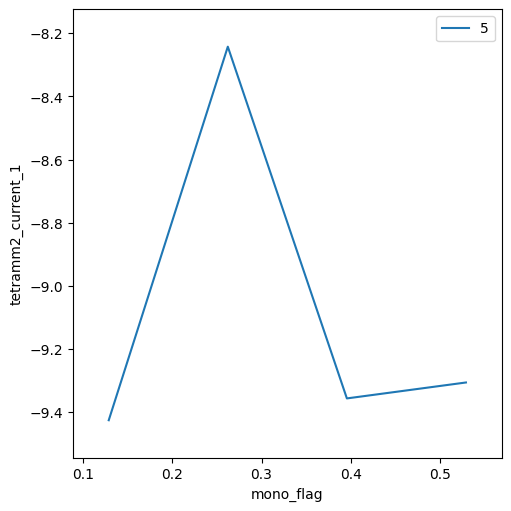

In [3]:
RE(bp.rel_scan(detectors, mono.flag, -0.2, 0.2, 4))

In [4]:
RE(bps.mov(bda_vert.size, 1.138))

()

In [ ]:
bda_vert.center.settle_time = 0.5

('43b41568-7b1e-40b0-996b-7f53bd442af5',)

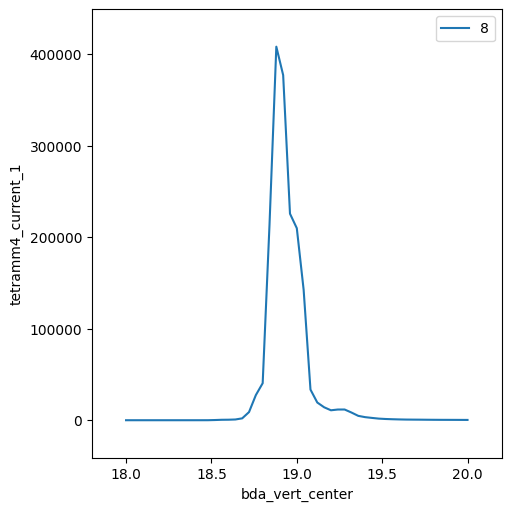

In [3]:
RE(bp.rel_scan(detectors, bda_vert.center, -1, 1, num=51))

('8d87107d-b5f9-4903-ab39-ec57528a4d87',)

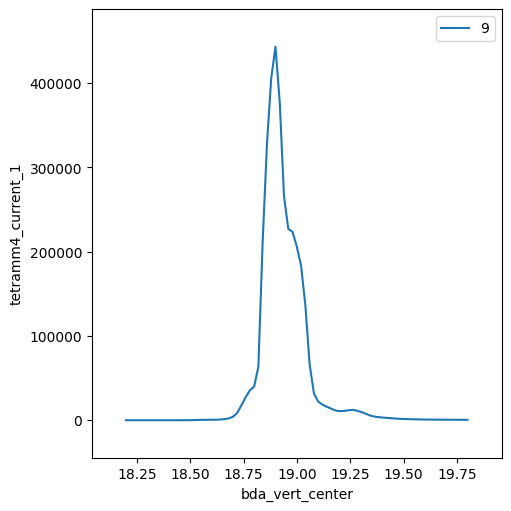

In [4]:
RE(bp.rel_scan(detectors, bda_vert.center, -0.8, 0.8, num=81))

In [6]:
RE(bps.mov(hhl_mirrors.bender_1, 17848164-3.4e4))

()

('115f200c-6836-4495-ad52-8593f99bdffd',)

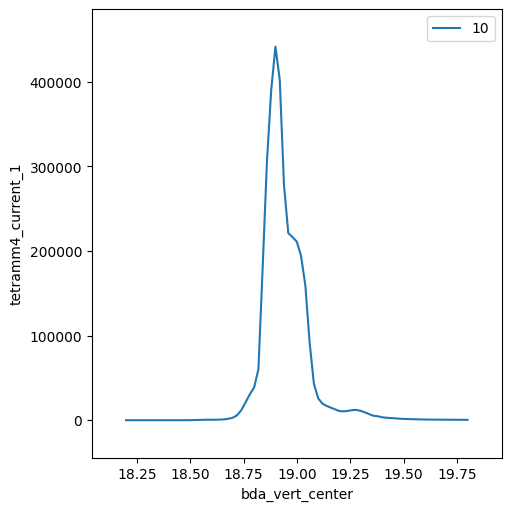

In [7]:
RE(bp.rel_scan(detectors, bda_vert.center, -0.8, 0.8, num=81))

In [8]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 18.94506987934296}
,
'cen':
    {'tetramm4_current_1': 18.903584432751686}
,
'max':
    {'tetramm4_current_1': (18.899520000000003,
                            441471.9737500858)}
,
'min':
    {'tetramm4_current_1': (18.31959,
                            2.9787759627881902)}
,
'fwhm':
    {'tetramm4_current_1': 0.1151553560426386}
,
}

In [14]:
RE(bps.mov(hhl_mirrors.bender_1, 17848164-2*3.4e4))

()

('e4004bd3-18a8-446e-a4b5-7f3f1c2832b0',)

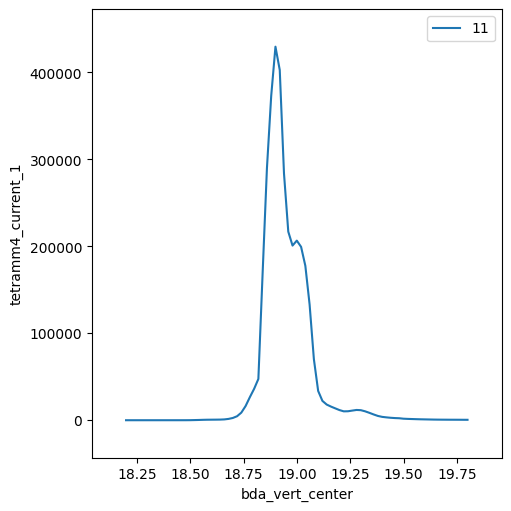

In [16]:
RE(bp.rel_scan(detectors, bda_vert.center, -0.8, 0.8, num=81))

/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<Axes: xlabel='bda_vert_center'>

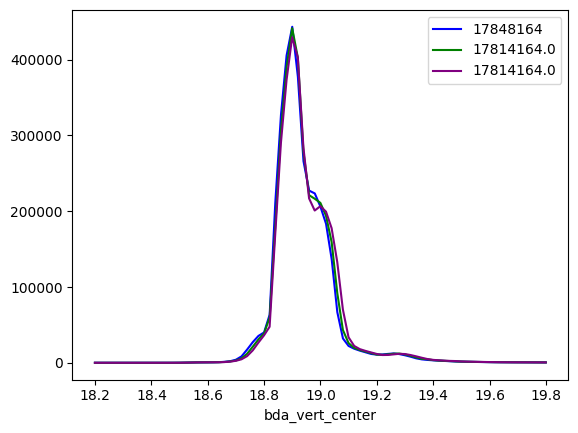

In [21]:
data1 = cat[9].primary.read().to_pandas()
data2 = cat[10].primary.read().to_pandas()
data3 = cat[11].primary.read().to_pandas()

fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164-1*3.4e4), c='green')
data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164-2*3.4e4), c='purple')

('ff8d5a27-40b5-4936-8268-3b6a9e359e83',)

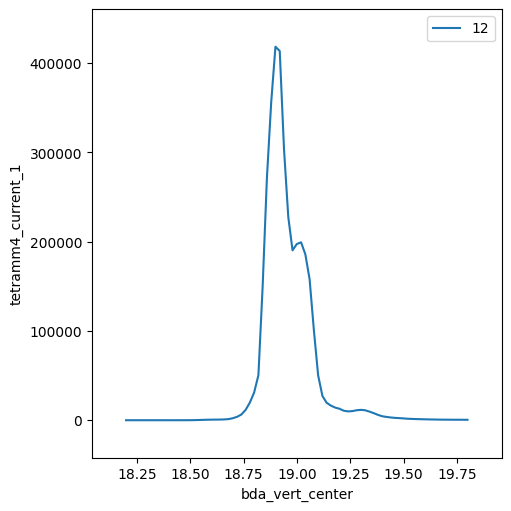

In [22]:
RE(bps.mov(hhl_mirrors.bender_1, 17848164-3*3.4e4))
RE(bp.rel_scan(detectors, bda_vert.center, -0.8, 0.8, num=81))

<Axes: xlabel='bda_vert_center'>

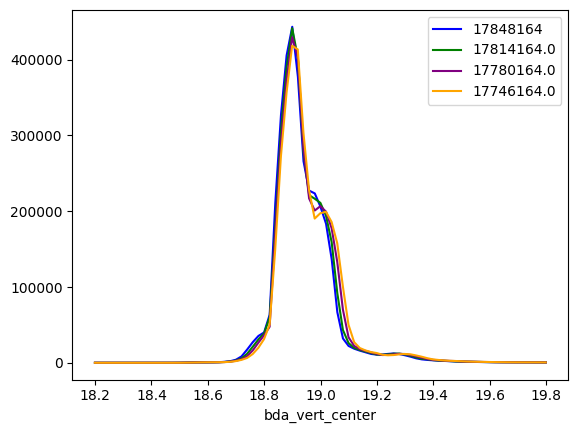

In [25]:
data1 = cat[9].primary.read().to_pandas()
data2 = cat[10].primary.read().to_pandas()
data3 = cat[11].primary.read().to_pandas()
data4 = cat[12].primary.read().to_pandas()

fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164-1*3.4e4), c='green')
data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164-2*3.4e4), c='purple')
data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164-3*3.4e4), c='orange')

('30faeaf8-0eff-4725-8256-33870d304eca',)

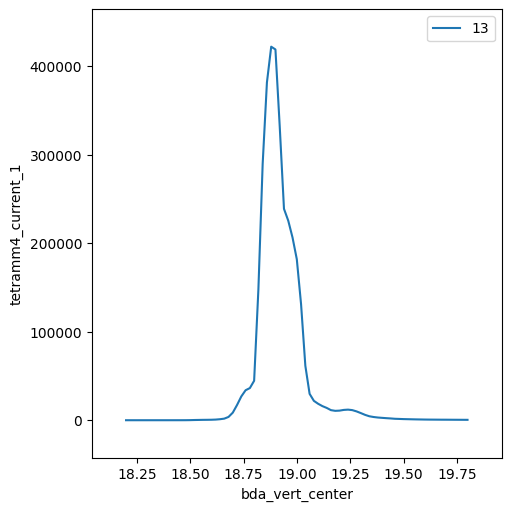

In [28]:
RE(bps.mov(hhl_mirrors.bender_1, 17848164+1*3.4e4))
RE(bp.rel_scan(detectors, bda_vert.center, -0.8, 0.8, num=81))

/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<Axes: xlabel='bda_vert_center'>

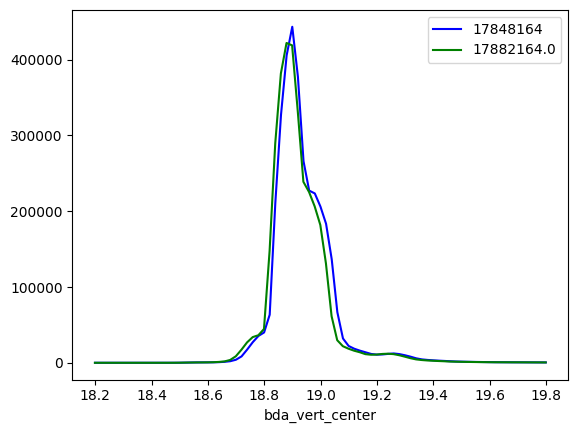

In [29]:
data1 = cat[9].primary.read().to_pandas()
data5 = cat[13].primary.read().to_pandas()

fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164), c='blue')
data5.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164+1*3.4e4), c='green')


('6fc78a73-9d99-424e-abb1-25fea0b8721c',)

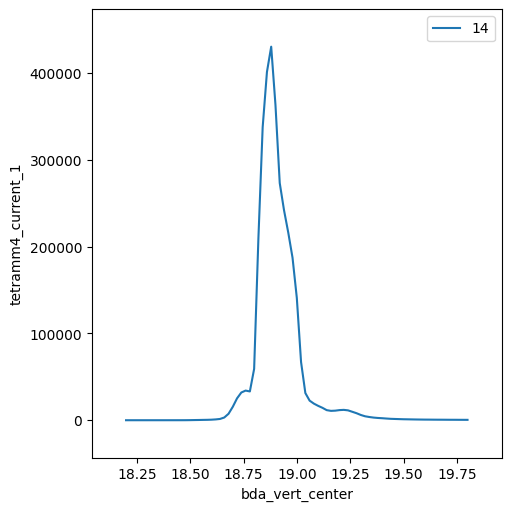

In [30]:
RE(bps.mov(hhl_mirrors.bender_1, 17848164+2*3.4e4))
RE(bp.rel_scan(detectors, bda_vert.center, -0.8, 0.8, num=81))

/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<Axes: xlabel='bda_vert_center'>

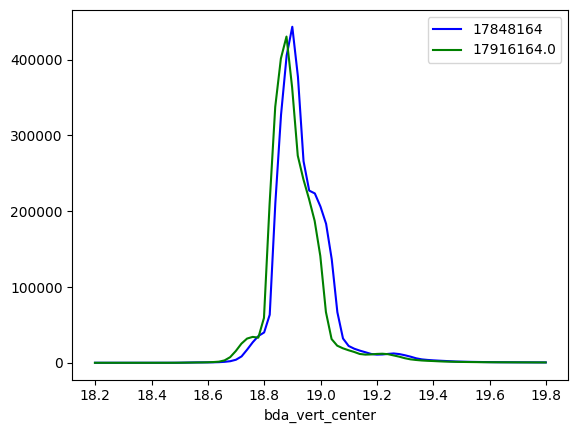

In [31]:
data1 = cat[9].primary.read().to_pandas()
data6 = cat[14].primary.read().to_pandas()

fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164), c='blue')
data6.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164+2*3.4e4), c='green')

('f5d73dbf-11a3-48f1-9382-b0d8efa430b9',)

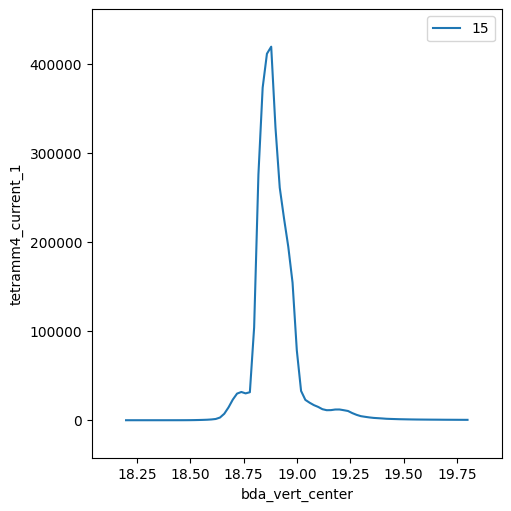

In [32]:
RE(bps.mov(hhl_mirrors.bender_1, 17848164+3*3.4e4))
RE(bp.rel_scan(detectors, bda_vert.center, -0.8, 0.8, num=81))

('e62aa3ad-4e79-489f-8bed-8e6231c5543f',)

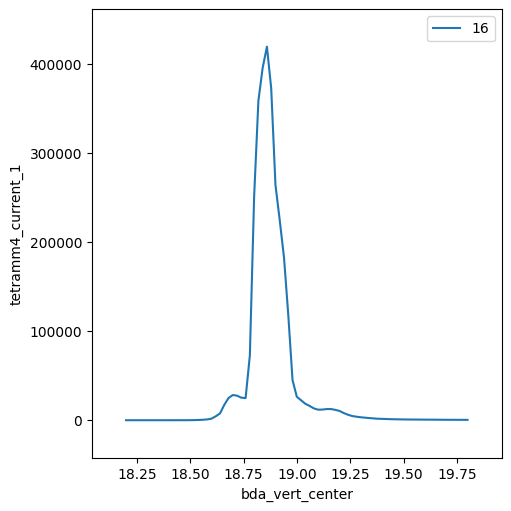

In [33]:
RE(bps.mov(hhl_mirrors.bender_1, 17848164+4*3.4e4))
RE(bp.rel_scan(detectors, bda_vert.center, -0.8, 0.8, num=81))

('79a96067-4588-47cb-b30f-452caba3b87a',)

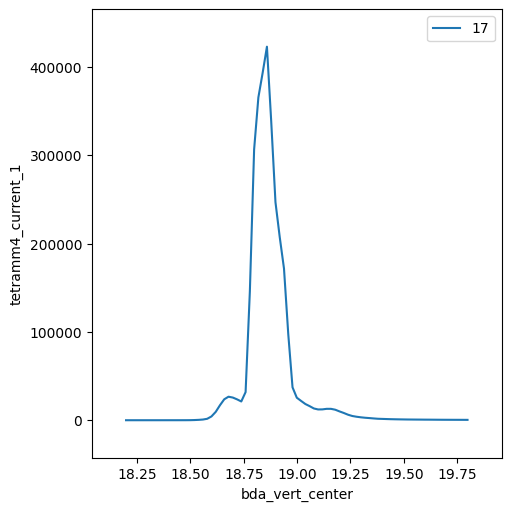

In [35]:
RE(bps.mov(hhl_mirrors.bender_1, 17848164+5*3.4e4))
RE(bp.rel_scan(detectors, bda_vert.center, -0.8, 0.8, num=81))

('e2c54525-9138-489a-b57d-6e7005395af8',)

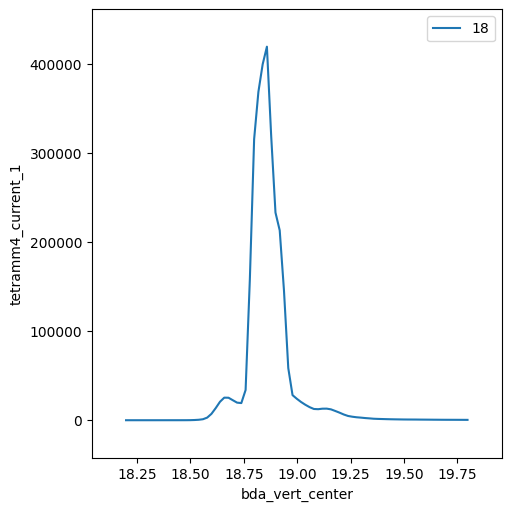

In [36]:
RE(bps.mov(hhl_mirrors.bender_1, 17848164+7*3.4e4))
RE(bp.rel_scan(detectors, bda_vert.center, -0.8, 0.8, num=81))

/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<Axes: xlabel='bda_vert_center'>

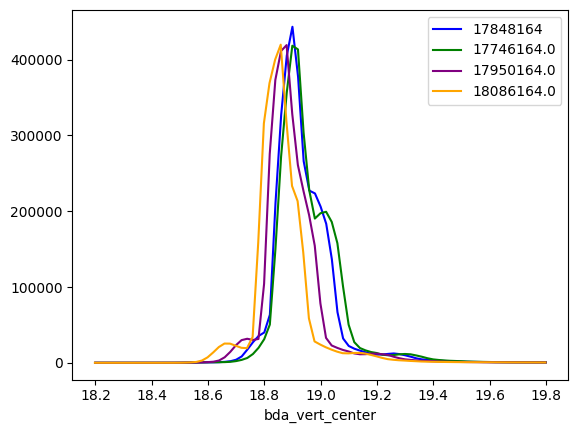

In [37]:
data1 = cat[9].primary.read().to_pandas()
data2 = cat[12].primary.read().to_pandas()
data3 = cat[15].primary.read().to_pandas()
data4 = cat[18].primary.read().to_pandas()

fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164-3*3.4e4), c='green')
data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164+3*3.4e4), c='purple')
data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164+7*3.4e4), c='orange')

('28f8af50-9632-4a90-bd3c-9d697c625459',)

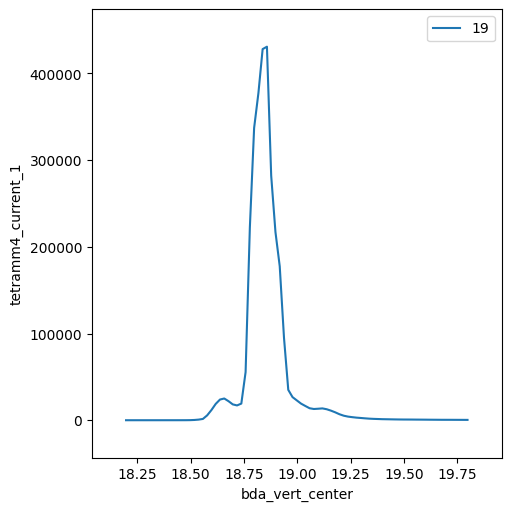

In [38]:
RE(bps.mov(hhl_mirrors.bender_1, 17848164+8*3.4e4))
RE(bp.rel_scan(detectors, bda_vert.center, -0.8, 0.8, num=81))

('41a1f069-9fdf-4518-8e8a-7a6cfc89fa0b',)

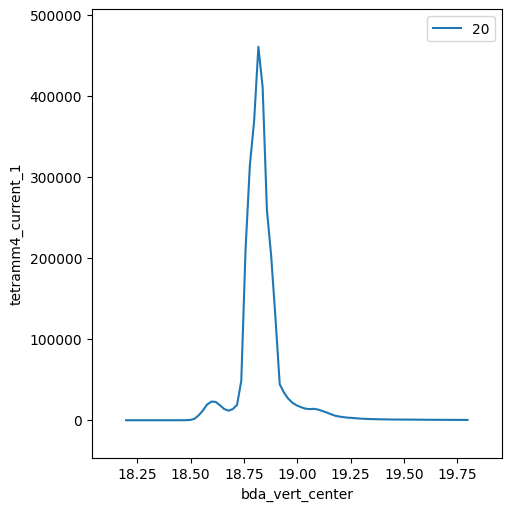

In [39]:
RE(bps.mov(hhl_mirrors.bender_1, 17848164+10*3.4e4))
RE(bp.rel_scan(detectors, bda_vert.center, -0.8, 0.8, num=81))

('ac5dca15-afe6-4858-b71b-53eb44ecb5d1',)

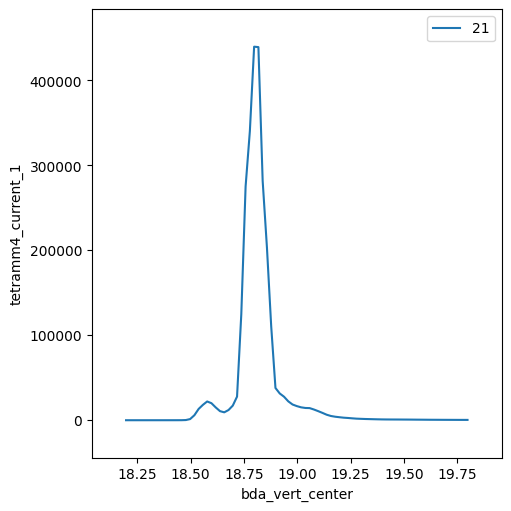

In [40]:
RE(bps.mov(hhl_mirrors.bender_1, 17848164+12*3.4e4))
RE(bp.rel_scan(detectors, bda_vert.center, -0.8, 0.8, num=81))

('7556217b-9644-49e1-b816-2d679a1e67db',)

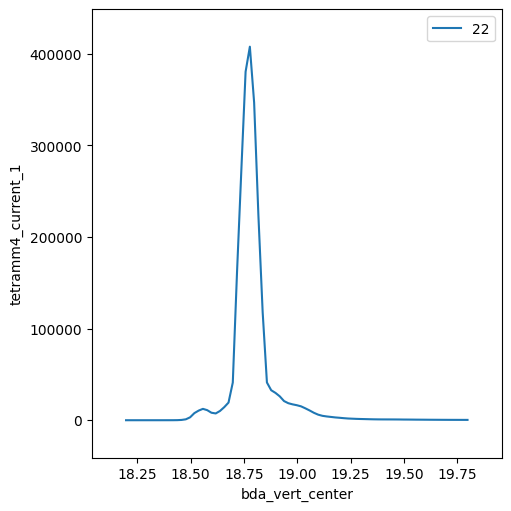

In [41]:
RE(bps.mov(hhl_mirrors.bender_1, 17848164+14*3.4e4))
RE(bp.rel_scan(detectors, bda_vert.center, -0.8, 0.8, num=81))

This looks like a good stopping point. To verify the scan is working well we will repeat the last scan with a 20 um bda size.

('fc03b044-39d2-48fa-9b3e-3e24fc472d2c',)

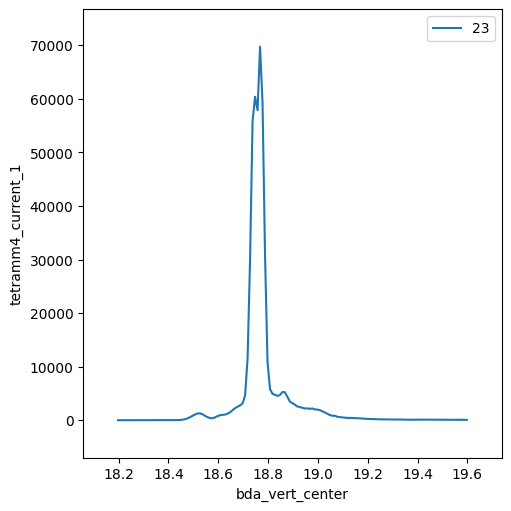

In [43]:
RE(bps.mov(bda_vert.size, 1.058))
RE(bp.rel_scan(detectors, bda_vert.center, -0.8, 0.6, num=141))

In [44]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 18.781022625272374}
,
'cen':
    {'tetramm4_current_1': 18.75793689150295}
,
'max':
    {'tetramm4_current_1': (18.76772,
                            69741.38810504436)}
,
'min':
    {'tetramm4_current_1': (18.197580000000002,
                            3.816654020364951)}
,
'fwhm':
    {'tetramm4_current_1': 0.056773998096449674}
,
}

('a1e609b7-899f-4903-8cc7-701a0193fc22',)

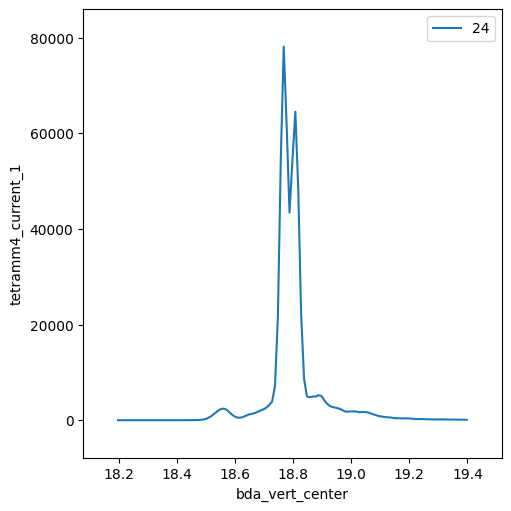

In [45]:
RE(bps.mov(hhl_mirrors.bender_1, 17848164+12*3.4e4))
RE(bp.rel_scan(detectors, bda_vert.center, -0.8, 0.4, num=121))

<Axes: xlabel='bda_vert_center'>

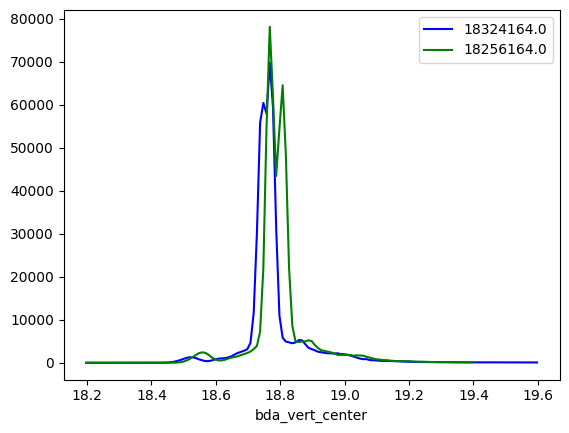

In [48]:
data1 = cat[23].primary.read().to_pandas()
data2 = cat[24].primary.read().to_pandas()

fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164+14*3.4e4), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164+12*3.4e4), c='green')

In [52]:
data1['tetramm4_current_1'].max()

439717.0601126828

<Axes: xlabel='bda_vert_center'>

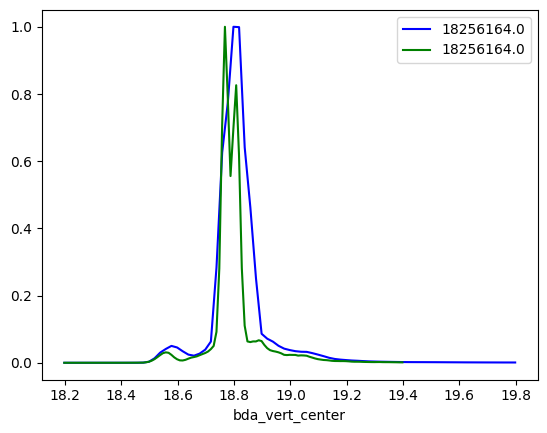

In [55]:
data1 = cat[21].primary.read().to_pandas()
data2 = cat[24].primary.read().to_pandas()

data1['tetramm4_current_1'] = data1['tetramm4_current_1']/data1['tetramm4_current_1'].max()
data2['tetramm4_current_1'] = data2['tetramm4_current_1']/data2['tetramm4_current_1'].max()

fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164+12*3.4e4), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164+12*3.4e4), c='green')

('cc1a8012-d216-475a-9551-a89131d70cec',)

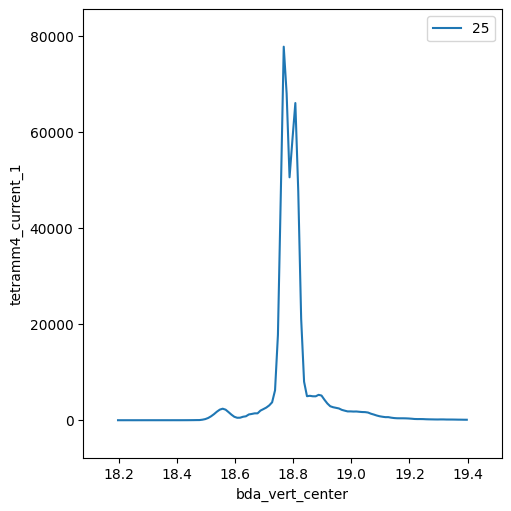

In [56]:
RE(bps.mov(hhl_mirrors.bender_1, 17848164+13*3.4e4))
RE(bp.rel_scan(detectors, bda_vert.center, -0.8, 0.4, num=121))

/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<Axes: xlabel='bda_vert_center'>

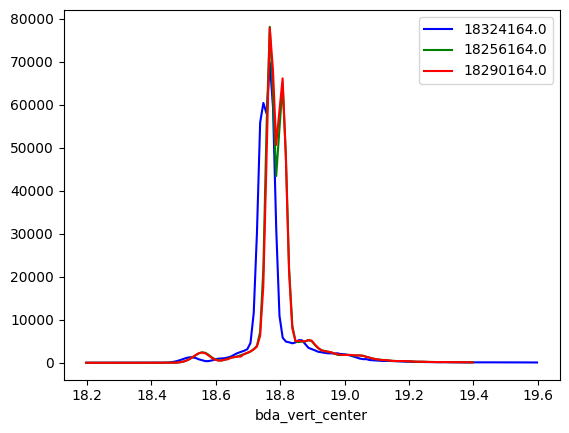

In [58]:
data1 = cat[23].primary.read().to_pandas()
data2 = cat[24].primary.read().to_pandas()
data3 = cat[25].primary.read().to_pandas()

fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164+14*3.4e4), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164+12*3.4e4), c='green')
data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164+13*3.4e4), c='red')

('c2d432f8-1f62-4d9f-a1dd-a8e78258d1ed',)

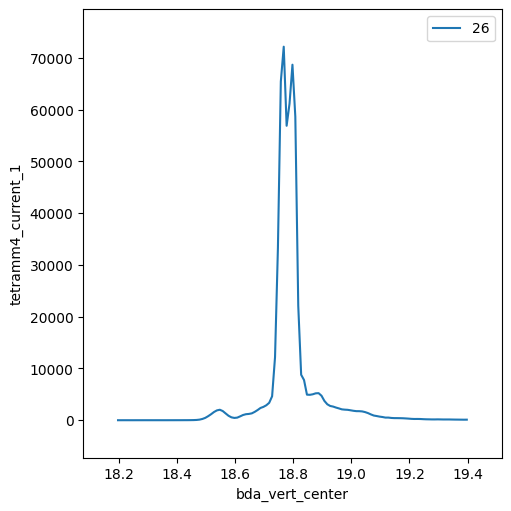

In [59]:
RE(bps.mov(hhl_mirrors.bender_1, 17848164+14*3.4e4))
RE(bp.rel_scan(detectors, bda_vert.center, -0.8, 0.4, num=121))

/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<Axes: xlabel='bda_vert_center'>

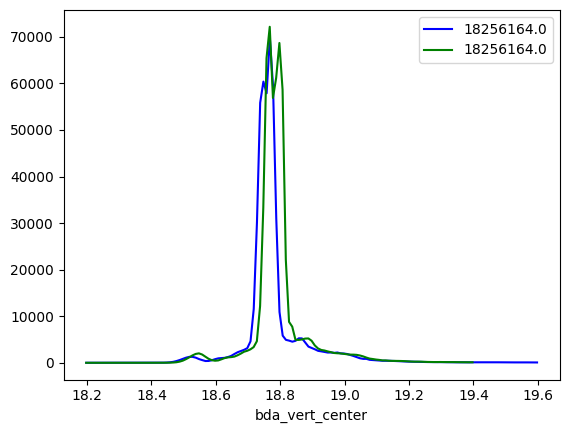

In [60]:
data1 = cat[23].primary.read().to_pandas()
data2 = cat[26].primary.read().to_pandas()

fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164+12*3.4e4), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164+12*3.4e4), c='green')

('c43979ae-0fe6-4235-9e3f-0f23feeb5215',)

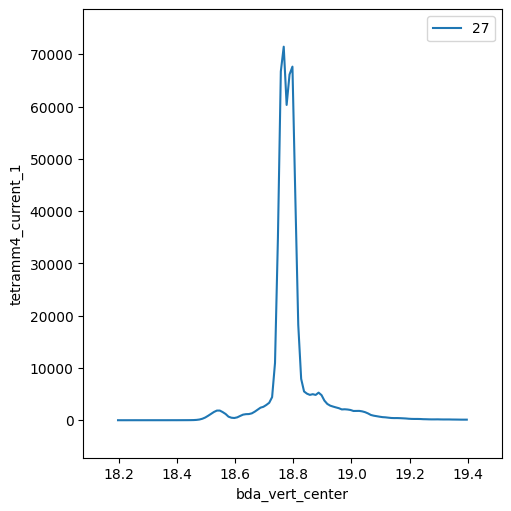

In [61]:
RE(bps.mov(hhl_mirrors.bender_1, 17848164+14.5*3.4e4))
RE(bp.rel_scan(detectors, bda_vert.center, -0.8, 0.4, num=121))

/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<Axes: xlabel='bda_vert_center'>

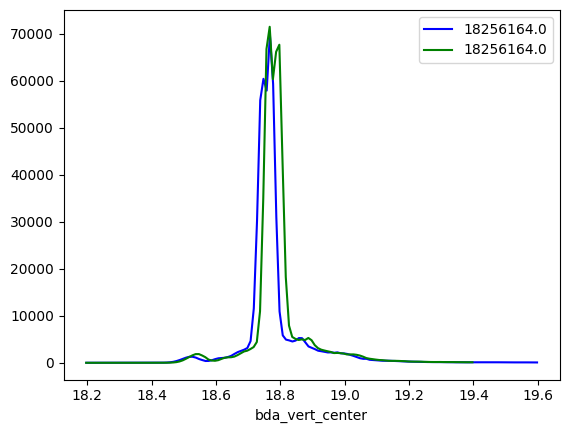

In [62]:
data1 = cat[23].primary.read().to_pandas()
data2 = cat[27].primary.read().to_pandas()

fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164+12*3.4e4), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164+12*3.4e4), c='green')

('5eb2b009-3f4c-4ac1-9828-99029f5bf9ec',)

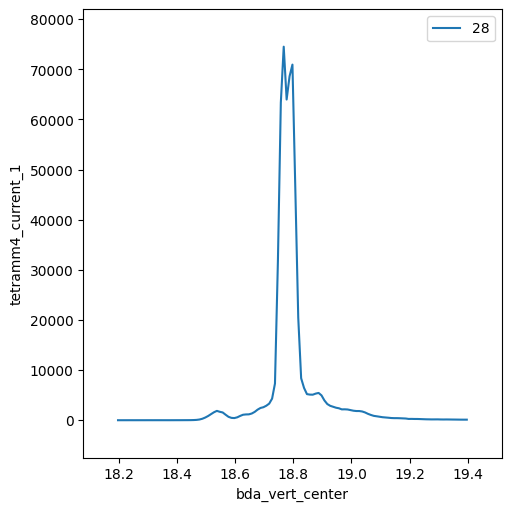

In [63]:
RE(bps.mov(hhl_mirrors.bender_1, 17848164+14.8*3.4e4))
RE(bp.rel_scan(detectors, bda_vert.center, -0.8, 0.4, num=121))

<Axes: xlabel='bda_vert_center'>

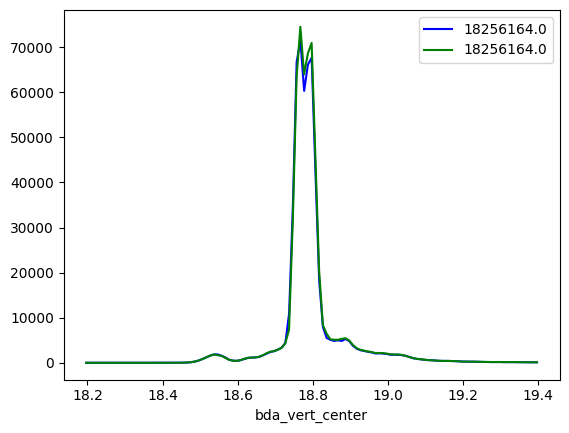

In [65]:
data1 = cat[27].primary.read().to_pandas()
data2 = cat[28].primary.read().to_pandas()

fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164+12*3.4e4), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164+12*3.4e4), c='green')

In [66]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 18.795626722028537}
,
'cen':
    {'tetramm4_current_1': 18.779500211614646}
,
'max':
    {'tetramm4_current_1': (18.76694,
                            74525.91418330985)}
,
'min':
    {'tetramm4_current_1': (18.1967,
                            2.0249446009974954)}
,
'fwhm':
    {'tetramm4_current_1': 0.06163715524253632}
,
}

In [67]:
bda_vert.size.get()

EpicsMotorTuple(user_readback=1.0580800000000001, user_setpoint=1.0579999999999998, user_offset=0.0, user_offset_dir=0, offset_freeze_switch=0, set_use_switch=0, velocity=0.0, acceleration=0.2, motor_egu='mm', motor_is_moving=0, motor_done_move=1, high_limit_switch=0, low_limit_switch=0, high_limit_travel=9.2687, low_limit_travel=-7.268699999999999, direction_of_travel=0, motor_stop=0, home_forward=0, home_reverse=0)

In [6]:
RE(bps.mv(bda_vert.size, 1.058))

()

## Bender 2

We are going to leave bender 1 in this configuration for now as it is giving good profile. The value is 18324164.

We will start by decreasing bender 2.

In [69]:
bda_vert.center.get()

EpicsMotorTuple(user_readback=18.996850000000002, user_setpoint=18.99681, user_offset=0.0, user_offset_dir=0, offset_freeze_switch=0, set_use_switch=0, velocity=0.0, acceleration=0.2, motor_egu='mm', motor_is_moving=0, motor_done_move=1, high_limit_switch=0, low_limit_switch=0, high_limit_travel=24.6187, low_limit_travel=16.35, direction_of_travel=0, motor_stop=0, home_forward=0, home_reverse=0)

('e33724be-aa36-48bf-a187-5ca7df08d6e3',)

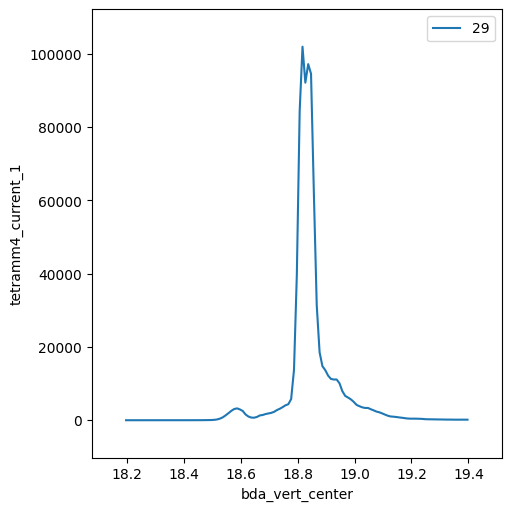

In [73]:
RE(bp.rel_scan(detectors, bda_vert.center, -0.8, 0.4, num=121))

In [76]:
def bender_2_scans():

    for i in np.arange(10, -11, -1):

        yield from bps.mov(hhl_mirrors.bender_2, 17218841+i*3.4e4)
        yield from bp.rel_scan(detectors, bda_vert.center, -1, 1, num=201)

('7fe82081-afe7-459b-9e79-8bdf002a7640',
 '24e3b7c2-f3a0-4c05-8ecd-05372ec48aed',
 'f229c3bd-392f-4f1a-82ca-68f3632c69ae',
 'cb3931d4-b301-4bb5-b0f4-f9c47c632db7',
 '27263f43-4ddd-443c-9387-58be09bcd766',
 '5b197215-061f-4df6-af64-6e1020ab6628',
 '17885eb1-e585-4bdf-87c4-310790d7dc9e',
 'd93a2a7f-ad81-4e77-8fc8-5c75e391ce88',
 '0039bf28-fc12-4fa5-8a24-3ed32fb73cf8',
 '770d78c2-48a9-4337-8e62-ac50d6f3178f',
 '38c2cc57-518c-4ae1-9a60-844fd1cf83e3',
 'ecb89763-7829-440a-9080-e9ce01550917',
 '97aea339-eba7-4f80-9626-79f2196c99fe',
 '8c3d0884-8e8e-4e62-b3c8-cebfa17f05fb',
 '32304b91-d0af-486f-be29-daabd03fb0de',
 '6cdf2aca-e737-4c0a-9fcc-301341c6ff58',
 '14b26579-4b05-462a-a771-0b4ca172b841',
 'b4a72de1-7860-499a-b22f-cb61d4f523da',
 'd80d5065-e37b-4782-a6b4-901c047bc078',
 'cbacad00-30c3-4f37-a0b3-3524aad1e4ce',
 '695ae43a-7e1e-4981-a6a4-3d5f195af65d')

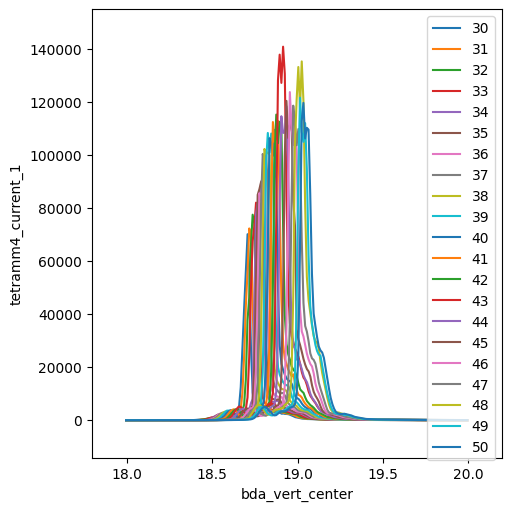

In [77]:
RE(bender_2_scans())

<Axes: xlabel='bda_vert_center'>

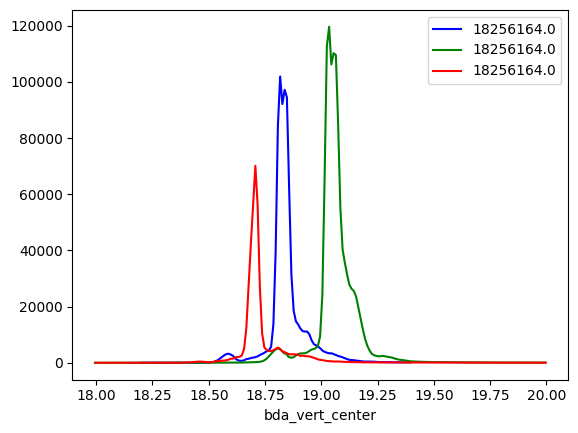

In [93]:
data1 = cat[29].primary.read().to_pandas()
data2 = cat[50].primary.read().to_pandas()
data3 = cat[30].primary.read().to_pandas()

fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164+12*3.4e4), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164+12*3.4e4), c='green')
data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164+12*3.4e4), c='red')

In [94]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 19.06406681834315}
,
'cen':
    {'tetramm4_current_1': 19.047975768571597}
,
'max':
    {'tetramm4_current_1': (19.03444,
                            119652.46891647801)}
,
'min':
    {'tetramm4_current_1': (18.034470000000002,
                            1.0838416026349833)}
,
'fwhm':
    {'tetramm4_current_1': 0.06988863811695367}
,
}

In [95]:
RE(bps.mv(bda_vert.center, 19.048))

()

We will now test moving to a different lateral position to make sure the trash (unappealing stellite peaks contributing to the poor background signal experienced.) we are seeing is not coming from a bad region in the mirrors.

First, we will redo the same scan to ensure things are still stable.

In [97]:
RE(bps.mv(bda_vert.size, 1.058))

()

('5aa1e5b6-8fdf-429e-b726-e01ced732e9b',)

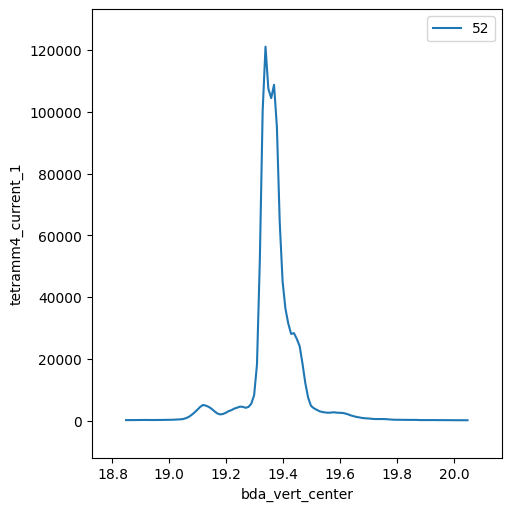

In [99]:
RE(bp.rel_scan(detectors, bda_vert.center, -0.2, 1, num=121))

Now we will move -1 mm in the MR1-2 lateral mirror. Current position: 20.279. Target position: 19.279.

It actually moved to 19.213. **Note** we are using Kevin's laptop to read the encoder counts, we are not reading it directly from the controller.

('31c0efbb-e423-49d4-8766-9c0e1c3fd1e8',)

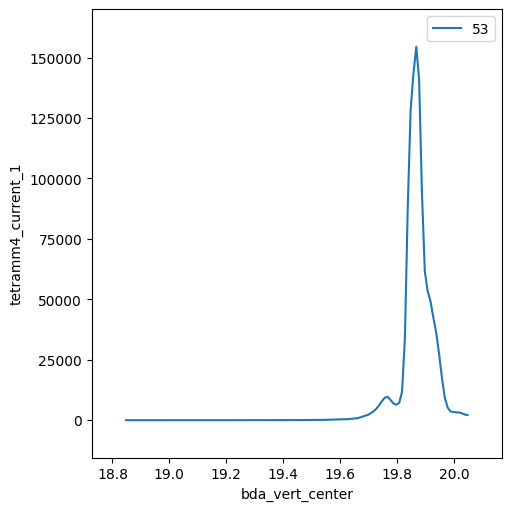

In [100]:
RE(bp.rel_scan(detectors, bda_vert.center, -0.2, 1, num=121))

('dbb19f4a-f124-4196-b1c4-0fdcd2112ed9',)

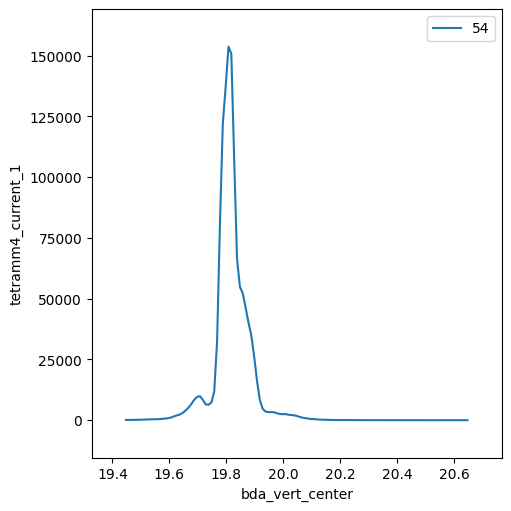

In [101]:
RE(bp.rel_scan(detectors, bda_vert.center, 0.4, 1.6, num=121))

/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<Axes: xlabel='bda_vert_center'>

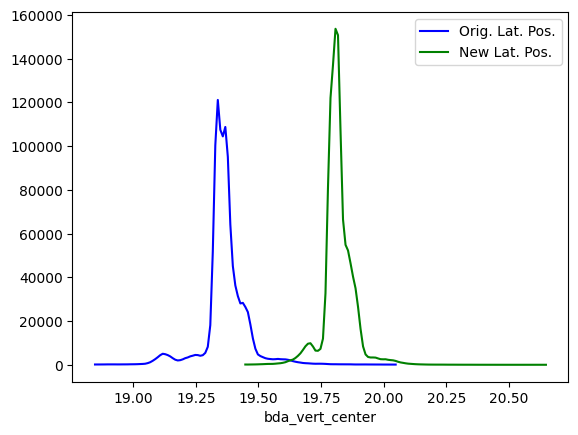

In [102]:
data1 = cat[52].primary.read().to_pandas()
data2 = cat[54].primary.read().to_pandas()


fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='Orig. Lat. Pos.', c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='New Lat. Pos.', c='green')
# data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(17848164+12*3.4e4), c='red')

## Bender 1 motion again

We will now stay in this position for bender 2 and try moving bender 1 again to try to optimize the peak further based on what we learned in the previous bender 1 scans.

Current positions:

Bender 1: 18351364

Bender 2: 16878841

After bringing the lateral position back, we want to make sure our scanning range is back to what we had previously.

('f439e582-a05c-43b8-a731-783b43012eea',)

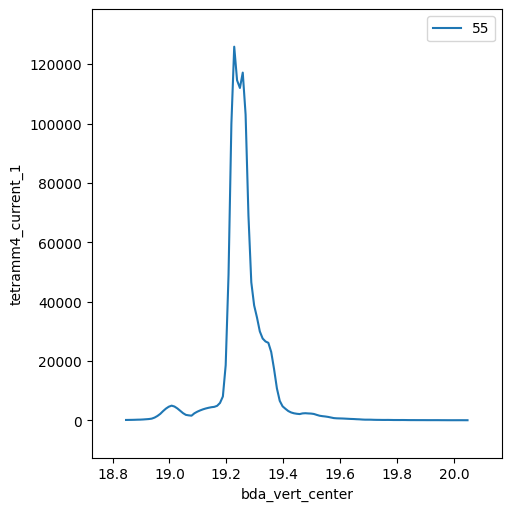

In [103]:
RE(bp.rel_scan(detectors, bda_vert.center, -0.2, 1, num=121))

In [104]:
def bender_1_scans():

    for i in np.arange(2, -13, -1):

        yield from bps.mov(hhl_mirrors.bender_1, 18351364+i*1.2e5) #notice we have a new step size
        yield from bp.rel_scan(detectors, bda_vert.center, -0.4, 0.8, num=201)

Deferred pause acknowledged. Continuing to checkpoint.
Deferred pause acknowledged. Continuing to checkpoint.
Deferred pause acknowledged. Continuing to checkpoint.
Deferred pause acknowledged. Continuing to checkpoint.


A 'deferred pause' has been requested. The RunEngine will pause at the next checkpoint. To pause immediately, hit Ctrl+C again in the next 10 seconds.
Pausing...


RunEngineInterrupted: 
Your RunEngine is entering a paused state. These are your options for changing
the state of the RunEngine:

RE.resume()    Resume the plan.
RE.abort()     Perform cleanup, then kill plan. Mark exit_stats='aborted'.
RE.stop()      Perform cleanup, then kill plan. Mark exit_status='success'.
RE.halt()      Emergency Stop: Do not perform cleanup --- just stop.


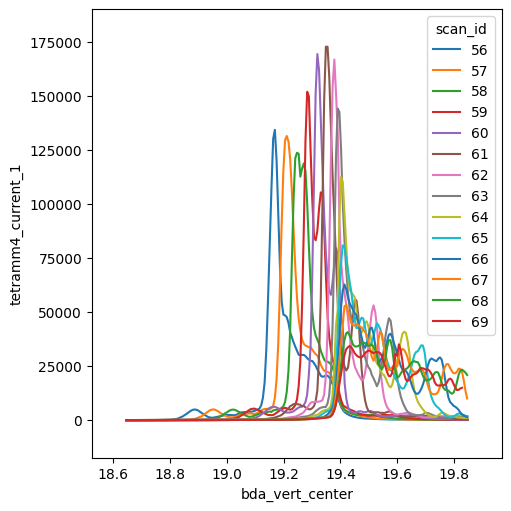

In [105]:
RE(bender_1_scans())

In [106]:
RE.stop()

Stopping: running cleanup and marking exit_status as 'success'...


('c127fafa-aa56-41e2-9f97-d95ec6716c76',
 '7f590c77-8f48-44fb-8162-5a97d2dcdece',
 'd85f28cb-d163-4d1f-816e-8900f1976e35',
 '86c907ad-3e71-40b6-ae43-9bcba2bed229',
 'fd775339-74c3-4a05-a1ca-edd156861b7d',
 'e21fc441-c870-4368-b47d-5cfbc4077a75',
 'cb8bf534-beca-4f16-af10-d643953393d2',
 '1a11ea3a-81ed-4dc1-9493-0863ebfacacb',
 'faea22a0-fdac-4320-bc5c-580a81720899',
 '3f4a98ac-361d-4a8b-bb65-458df9c277cc',
 '94751673-4d2f-4632-a496-70759b1fb437',
 'd7502965-2e0a-408b-9da1-3ef9f8d42a57',
 '01af31dc-df17-4725-8984-d25be178f05c',
 '294337e0-3aa5-4f1c-b153-376da28d06ac')

<Axes: xlabel='bda_vert_center'>

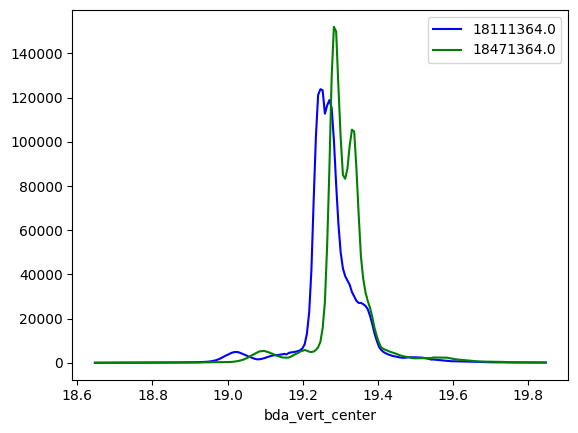

In [110]:
data1 = cat[58].primary.read().to_pandas()
data2 = cat[59].primary.read().to_pandas()
# data3 = cat[63].primary.read().to_pandas()
# data4 = cat[61].primary.read().to_pandas()

fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(18351364-2*1.2e5), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(18351364+1*1.2e5), c='green')
# data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(18351364+4*1.2e5), c='red')
# data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(18351364+7*1.2e5), c='orange')

## 2D scan map

It seems that we were very close to finding the ideal spot. We will then leave a fine pitched 2D map around that region to find an optimal position.

Bender 1: 18351364

Bender 2: 16878841

In [111]:
RE(bps.mv(
    hhl_mirrors.bender_1, 18351364,
    hhl_mirrors.bender_2, 16878841
))

()

We want to check intensity is still high

In [112]:
RE(bps.mv(bda_vert.size, 6))

()

In [113]:
RE(bps.mv(bda_vert.size, 1.058))

()

Now we verify the range is still good.

('8ab63262-f150-4cfe-936a-b38fec315f07',)

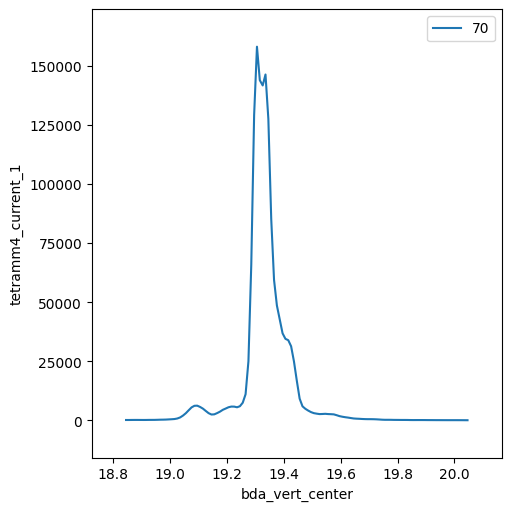

In [114]:
RE(bp.rel_scan(detectors, bda_vert.center, -0.2, 1, num=121))

With this, we can run the long 2D scan.

In [ ]:
from cycler import cycler
import numpy as np

bda_center_positions = np.arange(18.8, 20, 0.01)
bender_1_positions = np.arange(18351364-10*2.5e4, 18351364+11*2.5e4, 2.5e4)
bender_2_positions = np.arange(16878841-10*2.5e4, 16878841+11*2.5e4, 2.5e4)

cy = cycler(hhl_mirrors.bender_2, bender_2_positions) * cycler(hhl_mirrors.bender_1, bender_1_positions) * cycler(bda_vert.center, bda_center_positions) 

RE(bp.scan_nd(detectors, cy))

/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/bluesky/callbacks/best_effort.py:174: UserWarning: Plots are only made for 1 or 2 dimensions. Adjust the metadata hints field for BestEffortCallback to produce plots.
  warn(  # noqa: B028


A 'deferred pause' has been requested. The RunEngine will pause at the next checkpoint. To pause immediately, hit Ctrl+C again in the next 10 seconds.
A 'deferred pause' has been requested. The RunEngine will pause at the next checkpoint. To pause immediately, hit Ctrl+C again in the next 10 seconds.
A 'deferred pause' has been requested. The RunEngine will pause at the next checkpoint. To pause immediately, hit Ctrl+C again in the next 10 seconds.


The BDA controller crashed, so we had to interrupt the scan. Since we are running out of time, we will increase the step size of the scans.

In [7]:
bda_vert.center.settle_time = 0.01

('6758d3f8-7613-4483-a87a-2edfa4995858',)

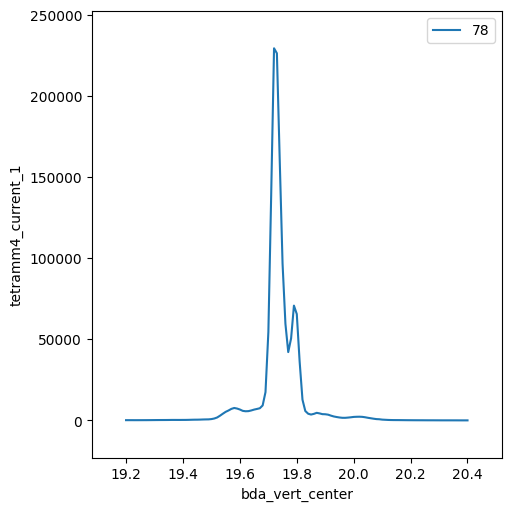

In [8]:
RE(bps.mv(bda_vert.center, 19.8))
RE(bp.rel_scan(detectors, bda_vert.center, -0.6, 0.6, num=121))

In [4]:
RE(bps.mv(bda_vert.center, 19.8))

()

In [11]:
from cycler import cycler
import numpy as np

bda_center_positions = np.arange(19.2, 20.4, 0.01)
bender_1_positions = np.arange(18351364-7*2.5e4, 18351364+8*2.5e4, 2.5e4)
bender_2_positions = np.arange(16878841-7*2.5e4, 16878841+8*2.5e4, 2.5e4)

cy = cycler(hhl_mirrors.bender_2, bender_2_positions) * cycler(hhl_mirrors.bender_1, bender_1_positions) * cycler(bda_vert.center, bda_center_positions) 

RE(bp.scan_nd(detectors, cy))

/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/bluesky/callbacks/best_effort.py:174: UserWarning: Plots are only made for 1 or 2 dimensions. Adjust the metadata hints field for BestEffortCallback to produce plots.
  warn(  # noqa: B028


A 'deferred pause' has been requested. The RunEngine will pause at the next checkpoint. To pause immediately, hit Ctrl+C again in the next 10 seconds.
A 'deferred pause' has been requested. The RunEngine will pause at the next checkpoint. To pause immediately, hit Ctrl+C again in the next 10 seconds.
Pausing...


RunEngineInterrupted: 
Your RunEngine is entering a paused state. These are your options for changing
the state of the RunEngine:

RE.resume()    Resume the plan.
RE.abort()     Perform cleanup, then kill plan. Mark exit_stats='aborted'.
RE.stop()      Perform cleanup, then kill plan. Mark exit_status='success'.
RE.halt()      Emergency Stop: Do not perform cleanup --- just stop.


In [12]:
RE.stop()

Stopping: running cleanup and marking exit_status as 'success'...


('d7be6454-b313-4ed2-98b3-06e896c1af71',)

It was still getting constantly stuck. We also had a beam dump that made the beamline unstable for 6 hours. We are now ready to start testing the benders again, although now we will just do a manual exploration around the "best" spot found so far. We will call this bender_1_cen and bender_2_cen.

In [3]:
RE(bps.mv(bda_vert.center, 19.8))
RE(bp.rel_scan(detectors, bda_vert.center, -0.6, 0.6, num=41))

('68d7eb15-067b-403e-b844-b93700671a52',)

In [11]:
bender_1_cen = 18351364
bender_2_cen = 16878841

In [5]:
def bender_1_scans():

    for i in np.arange(-5, 6, 1):

        yield from bps.mov(hhl_mirrors.bender_1, bender_1_cen+i*2.5e4) #notice we have a new step size
        yield from bp.rel_scan(detectors, bda_vert.center, -0.6, 0.6, num=121)

A 'deferred pause' has been requested. The RunEngine will pause at the next checkpoint. To pause immediately, hit Ctrl+C again in the next 10 seconds.
Pausing...


RunEngineInterrupted: 
Your RunEngine is entering a paused state. These are your options for changing
the state of the RunEngine:

RE.resume()    Resume the plan.
RE.abort()     Perform cleanup, then kill plan. Mark exit_stats='aborted'.
RE.stop()      Perform cleanup, then kill plan. Mark exit_status='success'.
RE.halt()      Emergency Stop: Do not perform cleanup --- just stop.


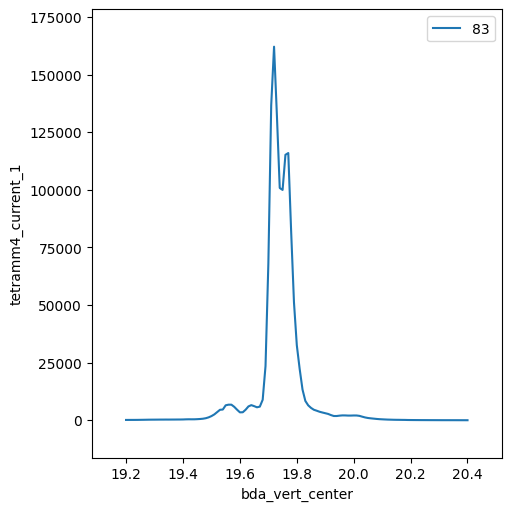

In [8]:
RE(bps.mv(hhl_mirrors.bender_1, bender_1_cen,
          hhl_mirrors.bender_2, bender_2_cen))

RE(bender_1_scans())

In [9]:
RE.stop()

Stopping: running cleanup and marking exit_status as 'success'...


('d48092d5-87f2-4f92-9fdb-8fe5c6215139',
 '20a13442-6ade-44e8-a09c-c6b46d51658b')

In [10]:
def bender_1_scans():

    for i in np.arange(-2, 3, 1):

        yield from bps.mov(hhl_mirrors.bender_1, bender_1_cen+i*2.5e4) #notice we have a new step size
        yield from bp.rel_scan(detectors, bda_vert.center, -0.6, 0.6, num=121)

('1c5de4fc-218f-4542-9d58-2d03ac7554ac',
 'ca7ef64a-1021-429b-aeb2-360c32a4f035',
 '3fe21bca-2314-4cfb-9761-974b2635187e',
 '7c36604c-b906-445a-8b73-a529391aa754',
 '0c48d099-c225-4c79-97b6-a683b1ccb305')

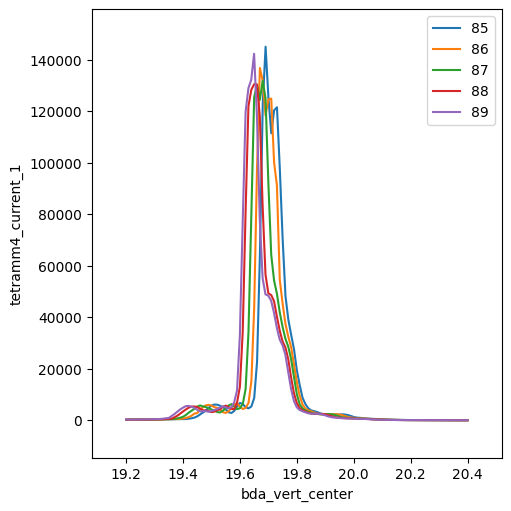

In [11]:
RE(bps.mv(hhl_mirrors.bender_1, bender_1_cen-2*2.5e4,
          hhl_mirrors.bender_2, bender_2_cen))

RE(bender_1_scans())

/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order

<Axes: xlabel='bda_vert_center'>

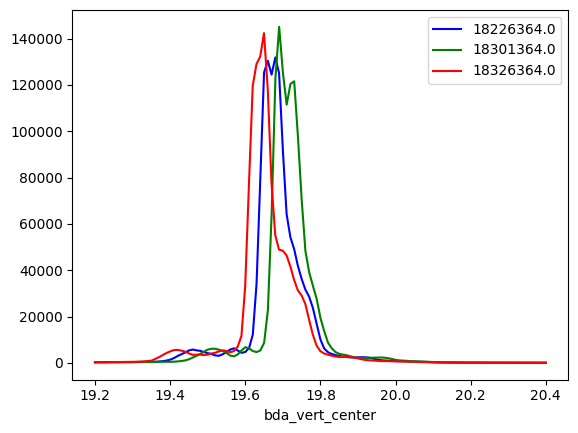

In [17]:
data1 = cat[87].primary.read().to_pandas()
data2 = cat[85].primary.read().to_pandas()
data3 = cat[89].primary.read().to_pandas()
# data4 = cat[87].primary.read().to_pandas()

fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-5*2.5e4), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-2*2.5e4), c='green')
data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-1*2.5e4), c='red')
# data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-0*2.5e4), c='orange')

In [12]:
def bender_2_scans():

    for i in np.arange(-4, 5, 1):

        yield from bps.mov(hhl_mirrors.bender_2, bender_2_cen+i*2.5e4) #notice we have a new step size
        yield from bp.rel_scan(detectors, bda_vert.center, -0.6, 0.6, num=121)

('05173a72-3bfa-47d2-9e25-a1f7a358c9ea',
 '8a19b6a9-a901-4cc5-9189-a5a221caa869',
 '1b924bb9-7946-4771-bd50-0c136bd7e69d',
 'c83433d8-df1d-4fd1-84a6-c7fd8eaf47ce',
 '33a8d104-cb95-4b49-9c47-aafb6ef6c368',
 'bea562cb-9634-4207-b533-0b0b7fa1be88',
 '0cd8d04b-8190-4ec4-a729-c91342bf5543',
 'ac1ef868-82cc-4fa4-b88a-95f446bf5300',
 '45e4677c-12a2-49d0-b6af-b7319a8a5aa5')

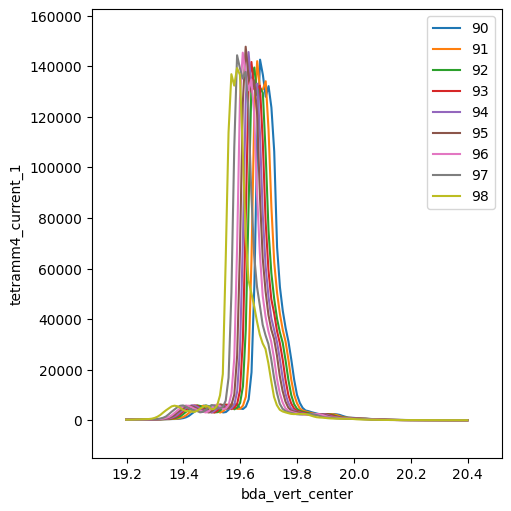

In [14]:
RE(bps.mv(hhl_mirrors.bender_1, bender_1_cen,
          hhl_mirrors.bender_2, bender_2_cen))

RE(bender_2_scans())

/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order

<Axes: xlabel='bda_vert_center'>

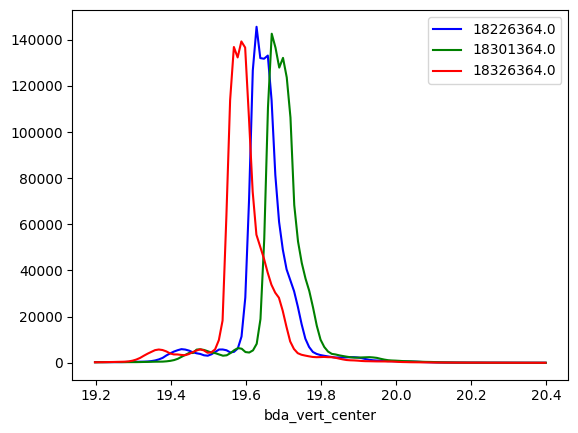

In [15]:
data1 = cat[94].primary.read().to_pandas()
data2 = cat[90].primary.read().to_pandas()
data3 = cat[98].primary.read().to_pandas()
# data4 = cat[87].primary.read().to_pandas()

fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-5*2.5e4), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-2*2.5e4), c='green')
data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-1*2.5e4), c='red')
# data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-0*2.5e4), c='orange')

In [ ]:
def bender_2_scans():

    for i in np.arange(5, 10, 1):

        yield from bps.mov(hhl_mirrors.bender_2, bender_2_cen+i*2.5e4)
        yield from bp.rel_scan(detectors, bda_vert.center, -0.6, 0.6, num=121)

In [18]:
RE(bps.mv(hhl_mirrors.bender_1, bender_1_cen,
          hhl_mirrors.bender_2, bender_2_cen+5*2.5e4))

RE(bender_2_scans())

('0274cd64-4cd5-41ab-a931-ae0f7ebd33d6',
 '08150bd9-e481-4239-8384-d84e7db9a35d',
 '990a9283-358d-43c6-976c-422745e2a0fa',
 '02cd7092-2f26-468b-a475-0c005f294e9e',
 '6c397cd6-a506-49a9-a541-8a9f5c5ac164')

In [4]:
from cycler import cycler
import numpy as np

bda_center_positions = np.arange(19, 20.2, 0.01)
bender_1_positions = np.arange(18351364-3*2.5e4, 18351364+4*2.5e4, 2.5e4)
bender_2_positions = np.arange(16878841-3*2.5e4, 16878841+4*2.5e4, 2.5e4)

cy = cycler(hhl_mirrors.bender_2, bender_2_positions) * cycler(hhl_mirrors.bender_1, bender_1_positions) * cycler(bda_vert.center, bda_center_positions) 

RE(bp.scan_nd(detectors, cy))

/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/bluesky/callbacks/best_effort.py:174: UserWarning: Plots are only made for 1 or 2 dimensions. Adjust the metadata hints field for BestEffortCallback to produce plots.
  warn(  # noqa: B028


A 'deferred pause' has been requested. The RunEngine will pause at the next checkpoint. To pause immediately, hit Ctrl+C again in the next 10 seconds.
Pausing...


Deferred pause acknowledged. Continuing to checkpoint.


RunEngineInterrupted: 
Your RunEngine is entering a paused state. These are your options for changing
the state of the RunEngine:

RE.resume()    Resume the plan.
RE.abort()     Perform cleanup, then kill plan. Mark exit_stats='aborted'.
RE.stop()      Perform cleanup, then kill plan. Mark exit_status='success'.
RE.halt()      Emergency Stop: Do not perform cleanup --- just stop.


In [5]:
RE.abort()

W Mon-08:04:13.131: No open traces left to close!
E Mon-08:04:13.132: Run aborted
Traceback (most recent call last):
  File "/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/bluesky/run_engine.py", line 1621, in _run
    msg = self._plan_stack[-1].send(resp)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/bluesky/preprocessors.py", line 1399, in __call__
    return (yield from plan)
            ^^^^^^^^^^^^^^^
  File "/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/bluesky/preprocessors.py", line 1250, in baseline_wrapper
    return (yield from plan)
            ^^^^^^^^^^^^^^^
  File "/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/bluesky/preprocessors.py", line 863, in monitor_during_wrapper
    return (yield from plan2)
            ^^^^^^^^^^^^^^^^
  File "/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/bluesky/preprocessors.py", line 188, 

Aborting: running cleanup and marking exit_status as 'abort'...


('b4d9c1db-d062-465e-a908-65ce26e842a0',)

## Retry of 2D scan

We will now retry doing the 2D bender scan mapping. We fixed the deadband and closed the slits, so we expect a better result than before.

In [4]:
RE(bps.mv(bda_vert.center, 19.8,
          bda_vert.size, 1.058))


()

In [7]:
RE(bps.mv(bda_vert.center, 19.8))
RE(bp.rel_scan(detectors, bda_vert.center, -0.6, 0.6, num=61))

('d9038427-80f7-4a00-b051-ef0340c5a26f',)

In [8]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 20.23589203750306}
,
'cen':
    {'tetramm4_current_1': 20.24190549099685}
,
'max':
    {'tetramm4_current_1': (20.220010000000002,
                            246203.51449109596)}
,
'min':
    {'tetramm4_current_1': (19.220110000000002,
                            71.67542565923944)}
,
'fwhm':
    {'tetramm4_current_1': 0.12245702387260238}
,
}

In [9]:
from cycler import cycler
import numpy as np

bda_center_positions = np.arange(19.6, 20.8, 0.01)
bender_1_positions = np.arange(18351364-5*5e4, 18351364+6*5e4, 5e4)
bender_2_positions = np.arange(16878841-5*5e4, 16878841+6*5e4, 5e4)

cy = cycler(hhl_mirrors.bender_2, bender_2_positions) * cycler(hhl_mirrors.bender_1, bender_1_positions) * cycler(bda_vert.center, bda_center_positions) 

RE(bp.scan_nd(detectors, cy))

/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/bluesky/callbacks/best_effort.py:174: UserWarning: Plots are only made for 1 or 2 dimensions. Adjust the metadata hints field for BestEffortCallback to produce plots.
  warn(  # noqa: B028
CA.Client.Exception...............................................
    Context: "isnpc05.xray.aps.anl.gov:41487"
    Source File: ../cac.cpp line 1238
    Current Time: Wed Jun 11 2025 09:21:15.651377250
..................................................................
CA.Client.Exception...............................................
    Context: "isnpc05.xray.aps.anl.gov:43105"
    Source File: ../cac.cpp line 1238
    Current Time: Wed Jun 11 2025 09:43:00.679530336
..................................................................


A 'deferred pause' has been requested. The RunEngine will pause at the next checkpoint. To pause immediately, hit Ctrl+C again in the next 10 seconds.
Pausing...


RunEngineInterrupted: 
Your RunEngine is entering a paused state. These are your options for changing
the state of the RunEngine:

RE.resume()    Resume the plan.
RE.abort()     Perform cleanup, then kill plan. Mark exit_stats='aborted'.
RE.stop()      Perform cleanup, then kill plan. Mark exit_status='success'.
RE.halt()      Emergency Stop: Do not perform cleanup --- just stop.


In [10]:
RE.abort()

W Wed-09:45:16.800: No open traces left to close!
E Wed-09:45:16.801: Run aborted
Traceback (most recent call last):
  File "/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/bluesky/run_engine.py", line 1621, in _run
    msg = self._plan_stack[-1].send(resp)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/bluesky/preprocessors.py", line 1399, in __call__
    return (yield from plan)
            ^^^^^^^^^^^^^^^
  File "/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/bluesky/preprocessors.py", line 1250, in baseline_wrapper
    return (yield from plan)
            ^^^^^^^^^^^^^^^
  File "/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/bluesky/preprocessors.py", line 863, in monitor_during_wrapper
    return (yield from plan2)
            ^^^^^^^^^^^^^^^^
  File "/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/bluesky/preprocessors.py", line 188, 

Aborting: running cleanup and marking exit_status as 'abort'...


('2aa95d89-4701-46b6-a7e6-4837752ce83b',)

('706f2280-f64d-4790-ad7f-4adfbb5b69b0',)

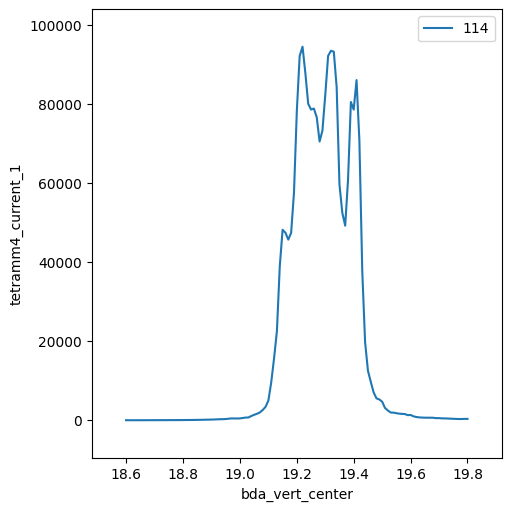

In [9]:
RE(bps.mv(bda_vert.center, 19.2))
RE(bp.rel_scan(detectors, bda_vert.center, -0.6, 0.6, num=121))

In [12]:
RE(bps.mv(hhl_mirrors.bender_1, bender_1_cen,
          hhl_mirrors.bender_2, bender_2_cen))

()

('f1553af0-00e0-4188-ba74-97b13f4d2573',)

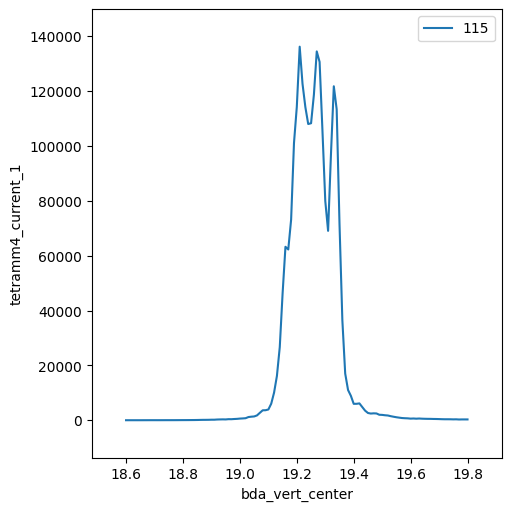

In [13]:
RE(bps.mv(bda_vert.center, 19.2))
RE(bp.rel_scan(detectors, bda_vert.center, -0.6, 0.6, num=121))

In [14]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 19.25880128879256}
,
'cen':
    {'tetramm4_current_1': 19.26319011605839}
,
'max':
    {'tetramm4_current_1': (19.210130000000003,
                            136187.52454833008)}
,
'min':
    {'tetramm4_current_1': (18.59975,
                            13.581225476513396)}
,
'fwhm':
    {'tetramm4_current_1': 0.17569437616795724}
,
}

In [15]:
bender_1_cen

18351364

In [16]:
RE(bps.mv(hhl_mirrors.bender_1, bender_1_cen-5e4))

RE(bps.mv(bda_vert.center, 19.2))
RE(bp.rel_scan(detectors, bda_vert.center, -0.6, 0.6, num=121))

('e5d22c71-df44-4546-8c7d-34c7149bdc15',)

In [17]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 19.251422447398454}
,
'cen':
    {'tetramm4_current_1': 19.209059282899958}
,
'max':
    {'tetramm4_current_1': (19.26013,
                            172607.85415501078)}
,
'min':
    {'tetramm4_current_1': (18.599860000000003,
                            14.135627678049167)}
,
'fwhm':
    {'tetramm4_current_1': 0.18285674478470426}
,
}

In [18]:
data1 = cat[115].primary.read().to_pandas()
data2 = cat[116].primary.read().to_pandas()


fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-5e4), c='green')


/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<Axes: xlabel='bda_vert_center'>

In [19]:
RE(bps.mv(hhl_mirrors.bender_1, bender_1_cen-1e5))

RE(bps.mv(bda_vert.center, 19.2))
RE(bp.rel_scan(detectors, bda_vert.center, -0.6, 0.6, num=121))

('72e4e786-2ea9-421a-95af-f7940fbd3fb2',)

In [20]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 19.23959013881267}
,
'cen':
    {'tetramm4_current_1': 19.240363157912856}
,
'max':
    {'tetramm4_current_1': (19.200090000000003,
                            173773.9566811089)}
,
'min':
    {'tetramm4_current_1': (18.59983,
                            13.837858495863358)}
,
'fwhm':
    {'tetramm4_current_1': 0.17742023022532294}
,
}

('3ce4b69a-eb0f-455f-9cdc-9ea5377ac60a',)

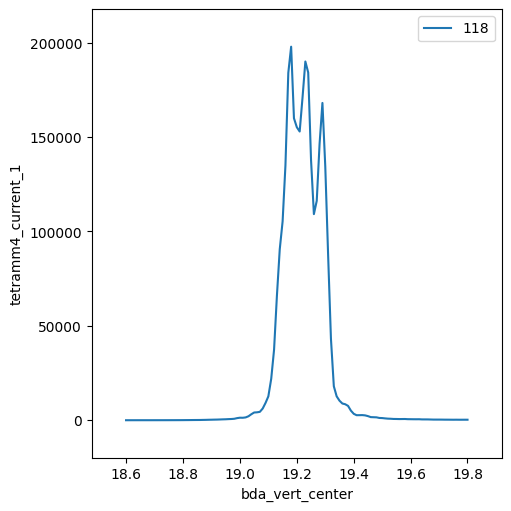

In [21]:
RE(bps.mv(hhl_mirrors.bender_1, bender_1_cen-2e5))

RE(bps.mv(bda_vert.center, 19.2))
RE(bp.rel_scan(detectors, bda_vert.center, -0.6, 0.6, num=121))

In [24]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 19.224398886022517}
,
'cen':
    {'tetramm4_current_1': 19.22670971062213}
,
'max':
    {'tetramm4_current_1': (19.180110000000003,
                            197859.24634910442)}
,
'min':
    {'tetramm4_current_1': (18.59981,
                            14.325122306416995)}
,
'fwhm':
    {'tetramm4_current_1': 0.16187161618385204}
,
}

<Axes: xlabel='bda_vert_center'>

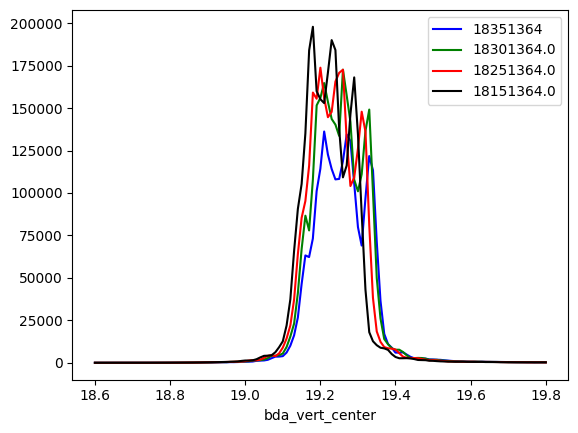

In [23]:
data1 = cat[115].primary.read().to_pandas()
data2 = cat[116].primary.read().to_pandas()
data3 = cat[117].primary.read().to_pandas()
data4 = cat[118].primary.read().to_pandas()


fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-5e4), c='green')
data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-1e5), c='red')
data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-2e5), c='black')

In [25]:
RE(bps.mv(hhl_mirrors.bender_1, bender_1_cen-3e5))

RE(bps.mv(bda_vert.center, 19.2))
RE(bp.rel_scan(detectors, bda_vert.center, -0.6, 0.6, num=121))

('f17f658a-c753-4c64-9b86-bd633aa43999',)

In [26]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 19.20375305599219}
,
'cen':
    {'tetramm4_current_1': 19.205022311699466}
,
'max':
    {'tetramm4_current_1': (19.160120000000003,
                            174475.99587949703)}
,
'min':
    {'tetramm4_current_1': (18.59983,
                            15.360510582351822)}
,
'fwhm':
    {'tetramm4_current_1': 0.147458713989856}
,
}

In [27]:
RE(bps.mv(hhl_mirrors.bender_1, bender_1_cen-5e5))

RE(bps.mv(bda_vert.center, 19.2))
RE(bp.rel_scan(detectors, bda_vert.center, -0.6, 0.6, num=121))

('361930de-1bf5-43ab-a136-9f5dfd5daad7',)

In [28]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 19.164621247313804}
,
'cen':
    {'tetramm4_current_1': 19.177780873911093}
,
'max':
    {'tetramm4_current_1': (19.120150000000002,
                            208636.0671267124)}
,
'min':
    {'tetramm4_current_1': (18.61016,
                            15.809696614350047)}
,
'fwhm':
    {'tetramm4_current_1': 0.1274327305676799}
,
}

In [29]:
RE(bps.mv(hhl_mirrors.bender_1, bender_1_cen-7e5))

RE(bps.mv(bda_vert.center, 19.2))
RE(bp.rel_scan(detectors, bda_vert.center, -0.6, 0.6, num=121))

('72e69102-81d5-41e9-afd4-33e80fe69816',)

In [31]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 19.120418643264507}
,
'cen':
    {'tetramm4_current_1': 19.098987908359796}
,
'max':
    {'tetramm4_current_1': (19.09008,
                            271728.16682232096)}
,
'min':
    {'tetramm4_current_1': (18.599800000000002,
                            16.173474433480653)}
,
'fwhm':
    {'tetramm4_current_1': 0.05997720186667266}
,
}

In [32]:
RE(bps.mv(hhl_mirrors.bender_1, bender_1_cen-7.5e5))

RE(bps.mv(bda_vert.center, 19.2))
RE(bp.rel_scan(detectors, bda_vert.center, -0.6, 0.6, num=121))

A 'deferred pause' has been requested. The RunEngine will pause at the next checkpoint. To pause immediately, hit Ctrl+C again in the next 10 seconds.
Pausing...


RunEngineInterrupted: 
Your RunEngine is entering a paused state. These are your options for changing
the state of the RunEngine:

RE.resume()    Resume the plan.
RE.abort()     Perform cleanup, then kill plan. Mark exit_stats='aborted'.
RE.stop()      Perform cleanup, then kill plan. Mark exit_status='success'.
RE.halt()      Emergency Stop: Do not perform cleanup --- just stop.


In [33]:
RE.resume()

('73a2e8ab-37a1-486a-9477-cc66079ccc09',)

In [36]:
data1 = cat[121].primary.read().to_pandas()
data2 = cat[122].primary.read().to_pandas()
# data3 = cat[117].primary.read().to_pandas()
# data4 = cat[118].primary.read().to_pandas()


fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-5e4), c='green')
# data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-1e5), c='red')
# data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-2e5), c='black')

/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<Axes: xlabel='bda_vert_center'>

In [35]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 19.10727263554427}
,
'cen':
    {'tetramm4_current_1': 19.0857311755253}
,
'max':
    {'tetramm4_current_1': (19.080150000000003,
                            322914.46361416753)}
,
'min':
    {'tetramm4_current_1': (18.599860000000003,
                            14.107148337488711)}
,
'fwhm':
    {'tetramm4_current_1': 0.04681355619092642}
,
}

('68b999b5-6b3c-4adf-96a7-8068dde18764',)

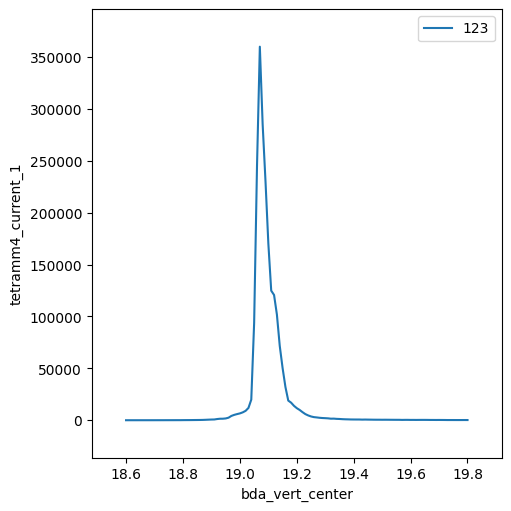

In [37]:
RE(bps.mv(hhl_mirrors.bender_1, bender_1_cen-8e5))

RE(bps.mv(bda_vert.center, 19.2))
RE(bp.rel_scan(detectors, bda_vert.center, -0.6, 0.6, num=121))

In [38]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 19.096892491430268}
,
'cen':
    {'tetramm4_current_1': 19.077127769732474}
,
'max':
    {'tetramm4_current_1': (19.070130000000002,
                            359956.5918593247)}
,
'min':
    {'tetramm4_current_1': (18.61016,
                            16.476996716700715)}
,
'fwhm':
    {'tetramm4_current_1': 0.042564327430064}
,
}

('2894dc60-ed92-4431-9572-8fa201fef6a1',)

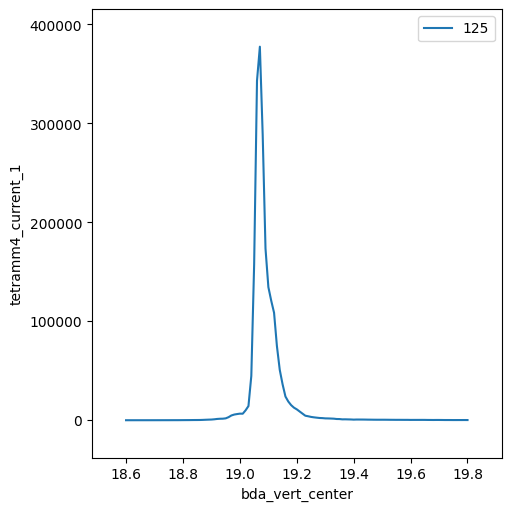

In [40]:
RE(bps.mv(hhl_mirrors.bender_1, bender_1_cen-8.5e5))

RE(bps.mv(bda_vert.center, 19.2))
RE(bp.rel_scan(detectors, bda_vert.center, -0.6, 0.6, num=121))

In [41]:
RE(bps.mv(hhl_mirrors.bender_1, bender_1_cen-9e5))

RE(bps.mv(bda_vert.center, 19.2))
RE(bp.rel_scan(detectors, bda_vert.center, -0.6, 0.6, num=121))

('14b521a8-22ea-4832-b8e5-bbb5b274ba1d',)

/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<Axes: xlabel='bda_vert_center'>

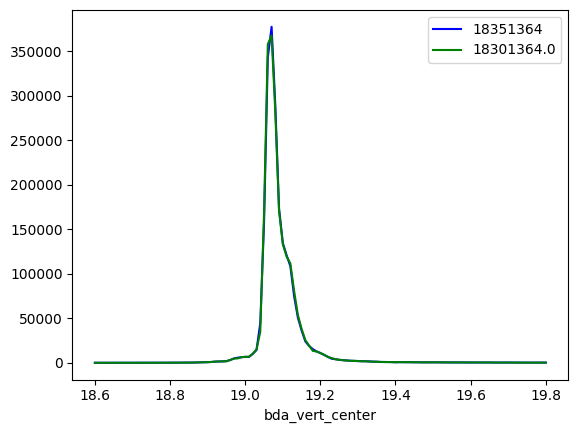

In [42]:
data1 = cat[125].primary.read().to_pandas()
data2 = cat[126].primary.read().to_pandas()
# data3 = cat[117].primary.read().to_pandas()
# data4 = cat[118].primary.read().to_pandas()


fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-5e4), c='green')
# data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-1e5), c='red')
# data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-2e5), c='black')

In [43]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 19.090958770225377}
,
'cen':
    {'tetramm4_current_1': 19.06988834298084}
,
'max':
    {'tetramm4_current_1': (19.070210000000003,
                            367656.58860652003)}
,
'min':
    {'tetramm4_current_1': (18.59985,
                            14.26636317295167)}
,
'fwhm':
    {'tetramm4_current_1': 0.03791890677876353}
,
}

This seems to be close to an optimum position for **bender 1: 17501364**

('f914d63b-dd06-41e8-ba88-5704d44b537d',)

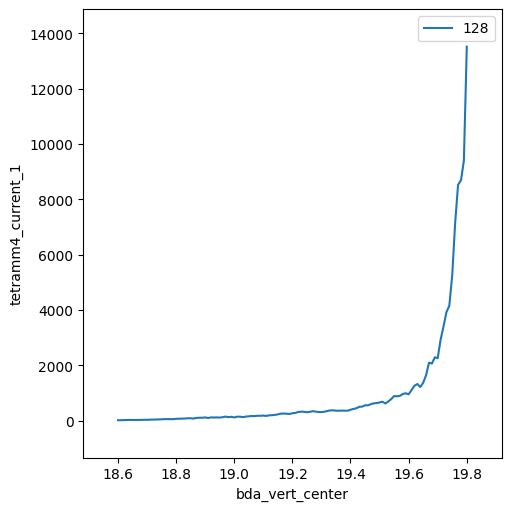

In [45]:
RE(bps.mv(hhl_mirrors.bender_1, bender_1_cen-8.5e5))
RE(bps.mv(hhl_mirrors.bender_2, bender_2_cen+1e5))

RE(bps.mv(bda_vert.center, 19.2))
RE(bp.rel_scan(detectors, bda_vert.center, -0.6, 0.6, num=121))

In [46]:
RE(bps.mv(hhl_mirrors.bender_1, bender_1_cen-8.5e5))
RE(bps.mv(hhl_mirrors.bender_2, bender_2_cen+1e5))

RE(bps.mv(bda_vert.center, 19.8))
RE(bp.rel_scan(detectors, bda_vert.center, -0.6, 0.6, num=121))

('6497c1a4-f9cb-477d-a486-e6dfc58e2147',)

In [47]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 19.89830418319553}
,
'cen':
    {'tetramm4_current_1': 19.91800556679827}
,
'max':
    {'tetramm4_current_1': (19.87017,
                            315859.12935438356)}
,
'min':
    {'tetramm4_current_1': (20.4002,
                            147.05495203915874)}
,
'fwhm':
    {'tetramm4_current_1': 0.10911810923616017}
,
}

In [49]:
RE(bps.mv(hhl_mirrors.bender_1, bender_1_cen-8.5e5))
RE(bps.mv(hhl_mirrors.bender_2, bender_2_cen))

RE(bps.mv(bda_vert.center, 19.8))
RE(bp.rel_scan(detectors, bda_vert.center, -0.6, 0.6, num=121))

('2058cdc7-7745-436f-9786-86cd31459304',)

In [50]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 19.89372446975561}
,
'cen':
    {'tetramm4_current_1': 19.90698764942572}
,
'max':
    {'tetramm4_current_1': (19.880180000000003,
                            403468.67464982945)}
,
'min':
    {'tetramm4_current_1': (20.400160000000003,
                            141.62825453344317)}
,
'fwhm':
    {'tetramm4_current_1': 0.07347537483117605}
,
}

('8c48e708-e55f-49b2-aa38-f2825530c57e',)

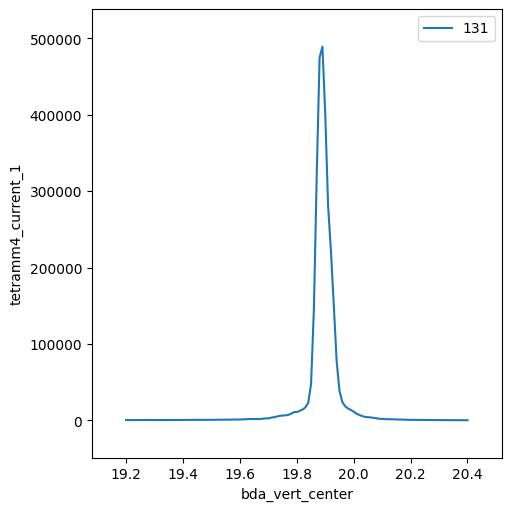

In [5]:
RE(bps.mv(hhl_mirrors.bender_1, bender_1_cen-8.5e5))
RE(bps.mv(hhl_mirrors.bender_2, bender_2_cen-1e5))

RE(bps.mv(bda_vert.center, 19.8))
RE(bp.rel_scan(detectors, bda_vert.center, -0.6, 0.6, num=121))

In [6]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 19.890945134918162}
,
'cen':
    {'tetramm4_current_1': 19.890928946288156}
,
'max':
    {'tetramm4_current_1': (19.89011,
                            489096.00022481644)}
,
'min':
    {'tetramm4_current_1': (20.40015,
                            143.78914014809334)}
,
'fwhm':
    {'tetramm4_current_1': 0.050386372934589474}
,
}

This seems like a great place to center a 2D map scan:

bender1: 17501364
bender2: 16778841

## Lateral mirror bending

We fully open the vertical and now we scan the horizontal.

First, we do an exploratory scan:

('c7b9ffb3-8e5c-406e-a589-25d97cb8fefe',)

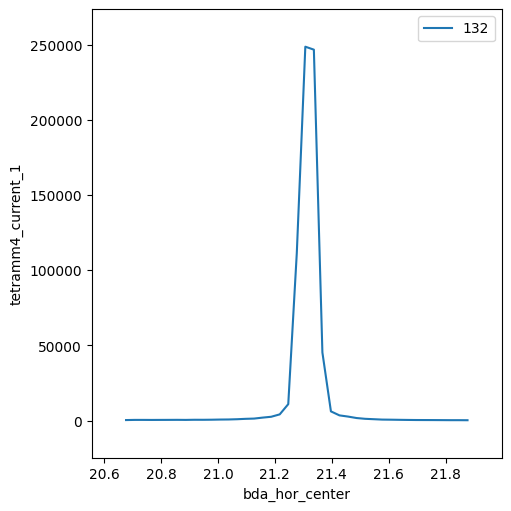

In [7]:
RE(bp.rel_scan(detectors, bda_hor.center, -0.6, 0.6, num=41))

In [8]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.314967850468488}
,
'cen':
    {'tetramm4_current_1': 21.31766350414929}
,
'max':
    {'tetramm4_current_1': (21.30711,
                            248851.24787468763)}
,
'min':
    {'tetramm4_current_1': (21.877180000000003,
                            188.2780522800424)}
,
'fwhm':
    {'tetramm4_current_1': 0.07535917603534159}
,
}

It seems we need to redo the size scan for this slit...

('3c49919c-43a4-4a07-b7b0-f38cef26be39',)

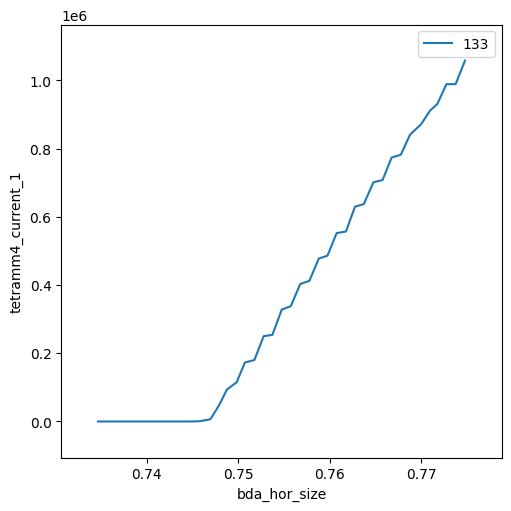

In [9]:
RE(bp.scan(detectors, bda_hor.size, 0.73466, 0.77466, num=41))

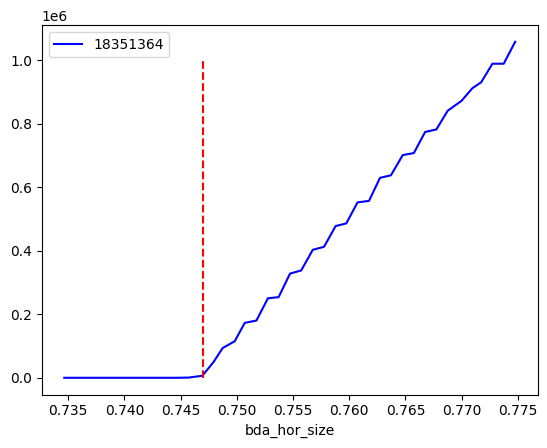

In [16]:
data1 = cat[133].primary.read().to_pandas()
# data2 = cat[126].primary.read().to_pandas()
# data3 = cat[117].primary.read().to_pandas()
# data4 = cat[118].primary.read().to_pandas()


fig, ax = plt.subplots()

data1.plot.line(x='bda_hor_size', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen), c='blue')
# data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-5e4), c='green')

cen = 0.747
ax.plot([cen, cen], [0, 1e6], 'r--')

('b78a6948-b67c-4fed-9c8d-4ffa443d80f0',)

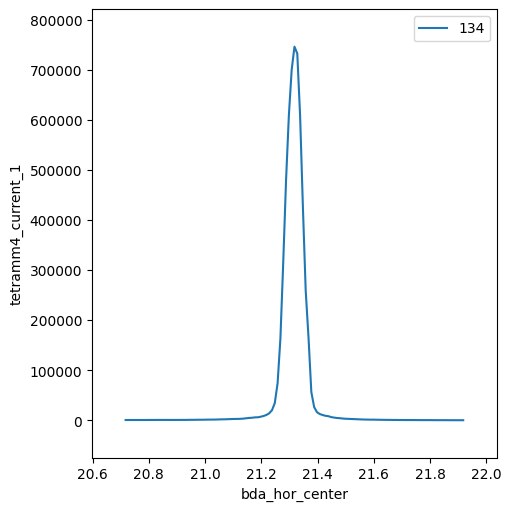

In [17]:
RE(bps.mv(bda_hor.size, 0.767)) #opening to 20 um

RE(bp.rel_scan(detectors, bda_hor.center, -0.6, 0.6, num=121))

In [18]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.315744511767384}
,
'cen':
    {'tetramm4_current_1': 21.316065522820413}
,
'max':
    {'tetramm4_current_1': (21.31772,
                            745992.9977242482)}
,
'min':
    {'tetramm4_current_1': (21.897660000000002,
                            505.6897164493967)}
,
'fwhm':
    {'tetramm4_current_1': 0.06953583356957438}
,
}

## 2D maps, again

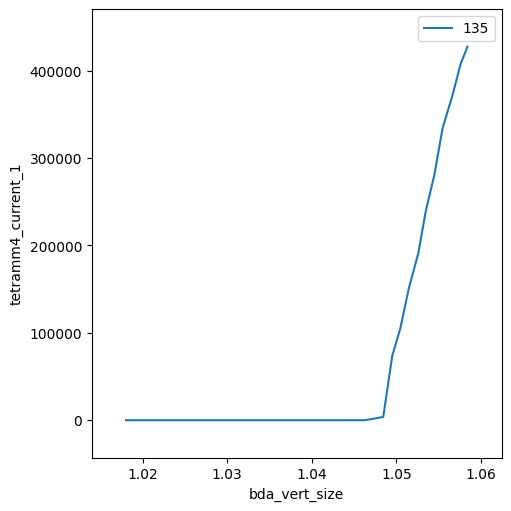

In [19]:
bda_vert.size.settle_time = 0.2
RE(bp.scan(detectors, bda_vert.size, 1.01826, 1.05826, num=41))
bda_vert.size.settle_time = 0

In [22]:
data1 = cat[135].primary.read().to_pandas()
# data2 = cat[126].primary.read().to_pandas()
# data3 = cat[117].primary.read().to_pandas()
# data4 = cat[118].primary.read().to_pandas()


fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_size', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen), c='blue')
# data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-5e4), c='green')

cen = 1.0485
ax.plot([cen, cen], [0, 0.5e6], 'r--')

In [3]:
from cycler import cycler
import numpy as np

bda_vert_center_positions = np.arange(19.4, 20.4, 0.01)
bender_1_positions = np.arange(17501364-4*5e4, 17501364+5*5e4, 5e4)
bender_2_positions = np.arange(16778841-4*5e4, 16778841+5*5e4, 5e4)

cy_vert = cycler(hhl_mirrors.bender_2, bender_2_positions) * cycler(hhl_mirrors.bender_1, bender_1_positions) * cycler(bda_vert.center, bda_vert_center_positions) 

bda_hor_center_positions = np.arange(20.8, 21.8, 0.01)
hor_bender_1_positions = np.arange(-30596015-4*5e4, -30596015+5*5e4, 5e4)
hor_bender_2_positions = np.arange(-29646008-4*5e4, -29646008+5*5e4, 5e4)

cy_hor = cycler(lateral_mirror.bender_2, hor_bender_2_positions) * cycler(lateral_mirror.bender_1, hor_bender_1_positions) * cycler(bda_hor.center, bda_hor_center_positions) 

RE(bps.mv(bda_vert.size, 1.0485+0.015,
          bda_hor.size, 0.747+4))

RE(bps.sleep(20))

RE(bp.scan_nd(detectors, cy_vert))

RE(bps.mv(bda_vert.size, 1.0485+4,
          bda_hor.size, 0.747+0.015))

RE(bps.sleep(20))

RE(bp.scan_nd(detectors, cy_hor))

/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/bluesky/callbacks/best_effort.py:174: UserWarning: Plots are only made for 1 or 2 dimensions. Adjust the metadata hints field for BestEffortCallback to produce plots.
  warn(  # noqa: B028


('032d692c-c26f-449d-b5e7-0482fc37b36a',)

In [4]:
cat[136]

BlueskyRun
  uid='c5dce71b-4255-40db-bcad-024eadb23a38'
  exit_status='success'
  2025-06-11 18:12:25.612 -- 2025-06-12 01:01:22.154
  Streams:
    * primary


In [5]:
cat[137]

BlueskyRun
  uid='032d692c-c26f-449d-b5e7-0482fc37b36a'
  exit_status='success'
  2025-06-12 01:02:00.001 -- 2025-06-12 06:30:18.121
  Streams:
    * primary


Now we just bring them back to their set point:

('22640ae7-77e6-4f5c-9dfa-5794b2000d88',)

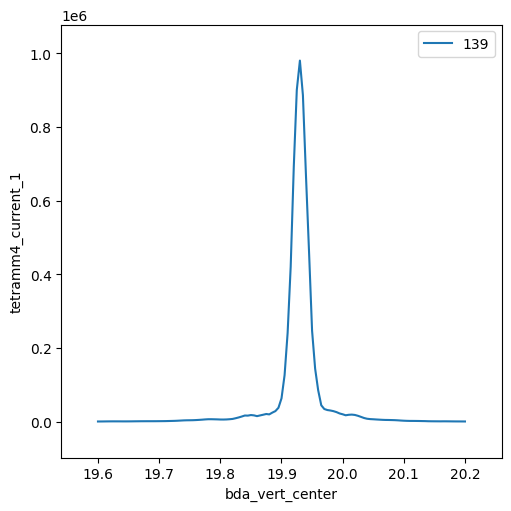

In [9]:
#Manually closed the slit to ~10um.

RE(bps.mv(bda_vert.center, 19.9))
RE(bp.rel_scan(detectors, bda_vert.center, -0.3, 0.3, num=121))

In [10]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 19.929454598426776}
,
'cen':
    {'tetramm4_current_1': 19.93043167692311}
,
'max':
    {'tetramm4_current_1': (19.930200000000003,
                            980332.6273098255)}
,
'min':
    {'tetramm4_current_1': (19.599890000000002,
                            1064.569487959842)}
,
'fwhm':
    {'tetramm4_current_1': 0.028010882603012988}
,
}

### Manual tuning of lateral bender

In [11]:
#Manually opened to 10 um

RE(bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=121))

('60125fd0-a84b-4cc3-996d-68b9c50b4e58',)

In [13]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.31531998979994}
,
'cen':
    {'tetramm4_current_1': 21.315201577415777}
,
'max':
    {'tetramm4_current_1': (21.335910000000002,
                            276382.95161606284)}
,
'min':
    {'tetramm4_current_1': (21.616010000000003,
                            479.7498423796056)}
,
'fwhm':
    {'tetramm4_current_1': 0.0691699869850595}
,
}

In [19]:
lat_bend_1_cen = -30596015
lat_bend_2_cen = -29646008

def bender_1_scans():

    for i in np.arange(-3, 4, 1):

        yield from bps.mv(lateral_mirror.bender_1, lat_bend_1_cen+i*2.5e4)
        yield from bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=121)

In [20]:
RE(bender_1_scans())

A 'deferred pause' has been requested. The RunEngine will pause at the next checkpoint. To pause immediately, hit Ctrl+C again in the next 10 seconds.
Pausing...


RunEngineInterrupted: 
Your RunEngine is entering a paused state. These are your options for changing
the state of the RunEngine:

RE.resume()    Resume the plan.
RE.abort()     Perform cleanup, then kill plan. Mark exit_stats='aborted'.
RE.stop()      Perform cleanup, then kill plan. Mark exit_status='success'.
RE.halt()      Emergency Stop: Do not perform cleanup --- just stop.


In [21]:
RE.stop()

Stopping: running cleanup and marking exit_status as 'success'...


('ace65ea1-87b6-4c6c-93eb-85d3326f6a77',)

In [23]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.30108317682002}
,
'cen':
    {'tetramm4_current_1': 21.302849239980826}
,
'max':
    {'tetramm4_current_1': (21.310440000000003,
                            276537.7525591406)}
,
'min':
    {'tetramm4_current_1': (21.01536,
                            630.9050512919594)}
,
'fwhm':
    {'tetramm4_current_1': 0.0720743678179474}
,
}

In [24]:
RE(bps.mv(lateral_mirror.bender_1, lat_bend_1_cen+5e4))

RE(bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=121))


('a31d7b3f-6ab1-4f85-b914-2b3dcb30049a',)

In [25]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.323640307896294}
,
'cen':
    {'tetramm4_current_1': 21.324270726209374}
,
'max':
    {'tetramm4_current_1': (21.34042,
                            297421.02629756695)}
,
'min':
    {'tetramm4_current_1': (21.61552,
                            524.3666432647498)}
,
'fwhm':
    {'tetramm4_current_1': 0.06780438012456358}
,
}

('29f81dad-d478-49cd-a531-913c0ce069d5',)

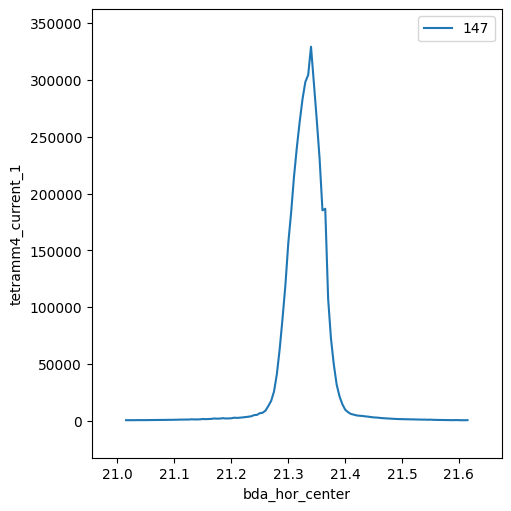

In [26]:
RE(bps.mv(lateral_mirror.bender_1, lat_bend_1_cen+2*5e4))

RE(bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=121))

In [27]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.332079427839158}
,
'cen':
    {'tetramm4_current_1': 21.334244106808303}
,
'max':
    {'tetramm4_current_1': (21.340220000000002,
                            329207.65428524365)}
,
'min':
    {'tetramm4_current_1': (21.61025,
                            548.6569750901145)}
,
'fwhm':
    {'tetramm4_current_1': 0.06478256649150183}
,
}

('de9c6ec7-4eba-4b13-94e4-7c99f6e766b3',)

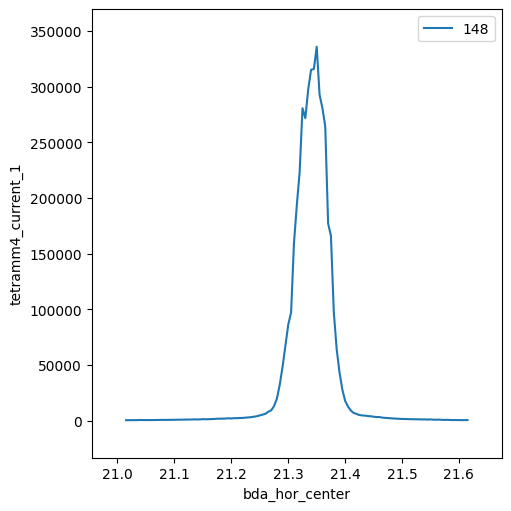

In [28]:
RE(bps.mv(lateral_mirror.bender_1, lat_bend_1_cen+3*5e4))

RE(bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=121))

In [29]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.341290081186624}
,
'cen':
    {'tetramm4_current_1': 21.342873366165872}
,
'max':
    {'tetramm4_current_1': (21.35021,
                            336011.31780186616)}
,
'min':
    {'tetramm4_current_1': (21.01518,
                            496.32240407186896)}
,
'fwhm':
    {'tetramm4_current_1': 0.06269577975285756}
,
}

('4d44b2bc-8f7a-4bec-8a2f-e0ab13281307',)

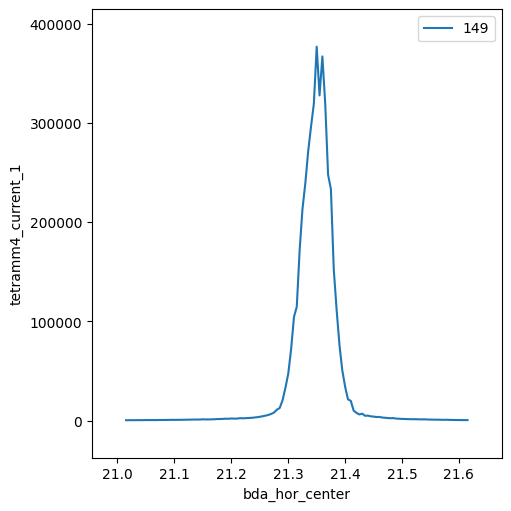

In [30]:
RE(bps.mv(lateral_mirror.bender_1, lat_bend_1_cen+4*5e4))

RE(bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=121))

In [31]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.34889204254106}
,
'cen':
    {'tetramm4_current_1': 21.350084290261513}
,
'max':
    {'tetramm4_current_1': (21.35019,
                            376862.3656844645)}
,
'min':
    {'tetramm4_current_1': (21.015130000000003,
                            486.8138128220523)}
,
'fwhm':
    {'tetramm4_current_1': 0.055705068476139985}
,
}

('687dccb3-283b-43da-819e-8996329f3aeb',)

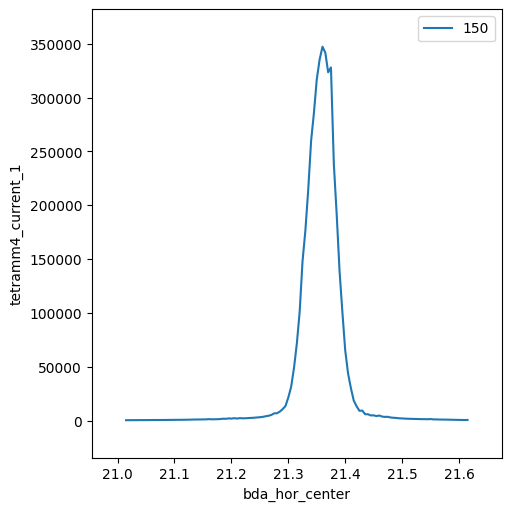

In [32]:
RE(bps.mv(lateral_mirror.bender_1, lat_bend_1_cen+5*5e4))

RE(bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=121))

In [33]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.357181146980075}
,
'cen':
    {'tetramm4_current_1': 21.358190622970632}
,
'max':
    {'tetramm4_current_1': (21.36015,
                            347211.75636388385)}
,
'min':
    {'tetramm4_current_1': (21.01488,
                            490.72133096806806)}
,
'fwhm':
    {'tetramm4_current_1': 0.05719944605680638}
,
}

('ac5b745e-83c5-415b-9be8-ce1dd321153c',)

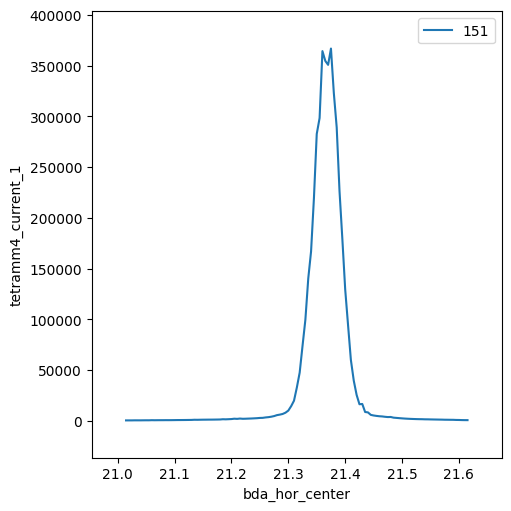

In [34]:
RE(bps.mv(lateral_mirror.bender_1, lat_bend_1_cen+6*5e4))

RE(bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=121))

In [35]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.3663123921093}
,
'cen':
    {'tetramm4_current_1': 21.36811530044686}
,
'max':
    {'tetramm4_current_1': (21.375020000000003,
                            366779.6369533126)}
,
'min':
    {'tetramm4_current_1': (21.01479,
                            474.19813267120674)}
,
'fwhm':
    {'tetramm4_current_1': 0.05292835164848597}
,
}

('8e383fe2-f0de-4a5f-a2fe-f4dbabe6f24e',)

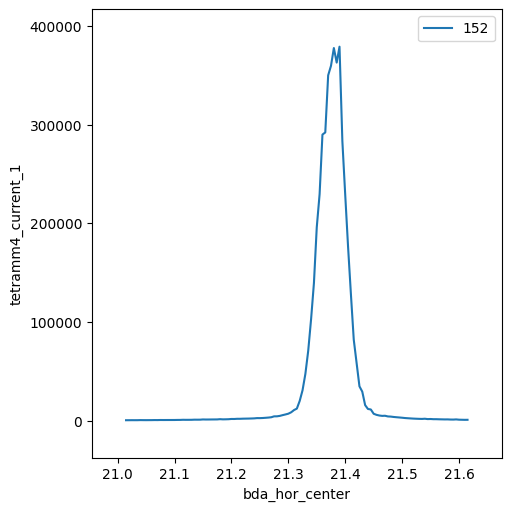

In [36]:
RE(bps.mv(lateral_mirror.bender_1, lat_bend_1_cen+7*5e4))

RE(bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=121))

In [37]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.375862767482666}
,
'cen':
    {'tetramm4_current_1': 21.376617776352248}
,
'max':
    {'tetramm4_current_1': (21.39,
                            378902.0781914303)}
,
'min':
    {'tetramm4_current_1': (21.014830000000003,
                            453.41419072922804)}
,
'fwhm':
    {'tetramm4_current_1': 0.054296391834608215}
,
}

('663ddda9-0c21-44ff-8ba3-358e7f9c576b',)

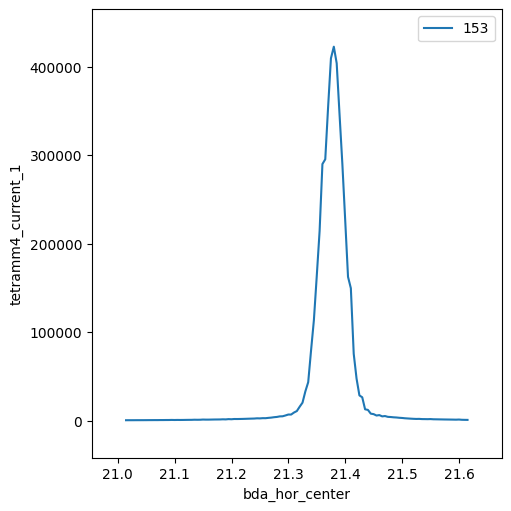

In [38]:
RE(bps.mv(lateral_mirror.bender_1, lat_bend_1_cen+6*5e4,
          lateral_mirror.bender_2, lat_bend_2_cen+1*5e4))

RE(bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=121))

In [39]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.37675698984797}
,
'cen':
    {'tetramm4_current_1': 21.37781316231166}
,
'max':
    {'tetramm4_current_1': (21.37987,
                            422507.3113574862)}
,
'min':
    {'tetramm4_current_1': (21.01461,
                            446.3054981236623)}
,
'fwhm':
    {'tetramm4_current_1': 0.046419831197528794}
,
}

('66972f7b-0392-43d3-b420-3bfc2cdb33ec',)

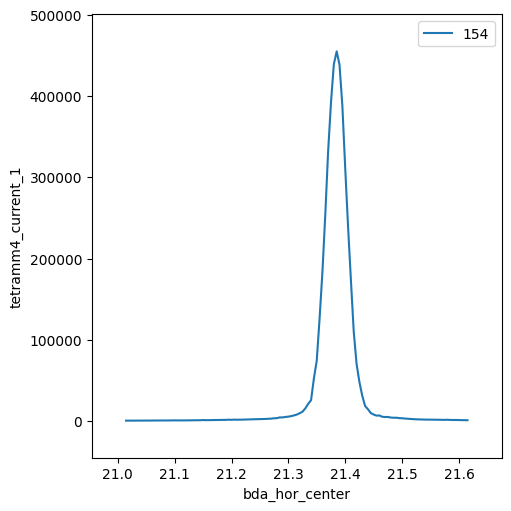

In [40]:
RE(bps.mv(lateral_mirror.bender_1, lat_bend_1_cen+6*5e4,
          lateral_mirror.bender_2, lat_bend_2_cen+2*5e4))

RE(bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=121))

In [41]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.383041832962693}
,
'cen':
    {'tetramm4_current_1': 21.384230303246355}
,
'max':
    {'tetramm4_current_1': (21.38476,
                            455102.7584387391)}
,
'min':
    {'tetramm4_current_1': (21.014490000000002,
                            431.0723209506876)}
,
'fwhm':
    {'tetramm4_current_1': 0.04277249868122013}
,
}

('8c9c8279-d3f6-4b29-995e-7f47ad7f0bf8',)

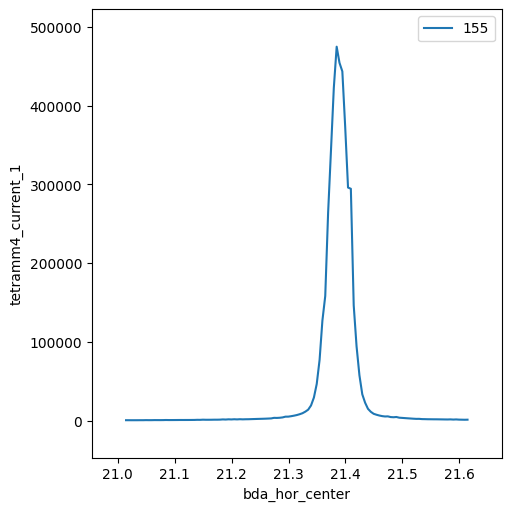

In [42]:
RE(bps.mv(lateral_mirror.bender_1, lat_bend_1_cen+6*5e4,
          lateral_mirror.bender_2, lat_bend_2_cen+3*5e4))

RE(bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=121))

In [43]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.387100540751273}
,
'cen':
    {'tetramm4_current_1': 21.389841168629978}
,
'max':
    {'tetramm4_current_1': (21.38456,
                            475000.44694980927)}
,
'min':
    {'tetramm4_current_1': (21.02457,
                            453.04413517394244)}
,
'fwhm':
    {'tetramm4_current_1': 0.04314624594637806}
,
}

('6ee40685-baad-42e5-b02d-266e9a097050',)

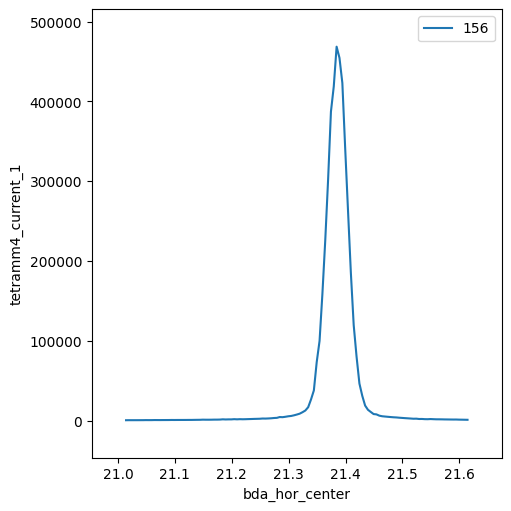

In [44]:
RE(bps.mv(lateral_mirror.bender_1, lat_bend_1_cen+6*5e4,
          lateral_mirror.bender_2, lat_bend_2_cen+2.5*5e4))

RE(bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=121))

In [45]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.384073357744143}
,
'cen':
    {'tetramm4_current_1': 21.385596999988906}
,
'max':
    {'tetramm4_current_1': (21.38435,
                            468704.4348208695)}
,
'min':
    {'tetramm4_current_1': (21.01435,
                            411.8449922765906)}
,
'fwhm':
    {'tetramm4_current_1': 0.041271739653840456}
,
}

('eca65ca4-61a1-438f-924d-62a25fc7915c',)

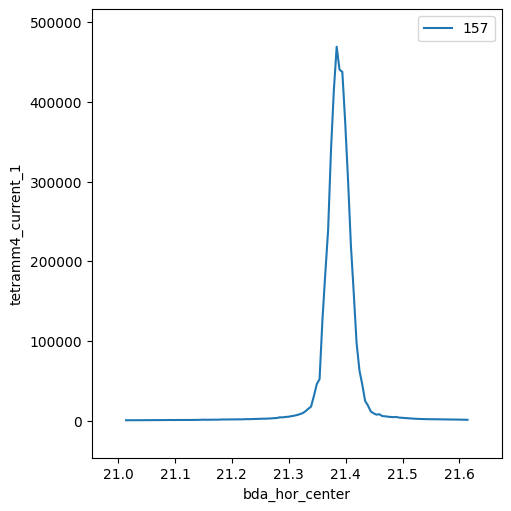

In [46]:
RE(bps.mv(lateral_mirror.bender_1, lat_bend_1_cen+6.5*5e4,
          lateral_mirror.bender_2, lat_bend_2_cen+2.5*5e4))

RE(bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=121))

In [47]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.38706804909136}
,
'cen':
    {'tetramm4_current_1': 21.38860982273863}
,
'max':
    {'tetramm4_current_1': (21.384300000000003,
                            469225.7531054534)}
,
'min':
    {'tetramm4_current_1': (21.01406,
                            444.0777096076601)}
,
'fwhm':
    {'tetramm4_current_1': 0.03950540962992832}
,
}

('0906f297-3313-4d65-8369-5be99eec704d',)

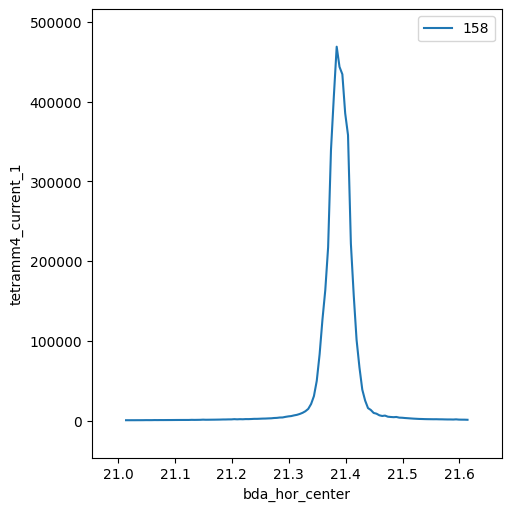

In [48]:
RE(bps.mv(lateral_mirror.bender_1, lat_bend_1_cen+6.5*5e4,
          lateral_mirror.bender_2, lat_bend_2_cen+2.5*5e4))

RE(bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=121))

In [49]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.387120718874293}
,
'cen':
    {'tetramm4_current_1': 21.389348834798028}
,
'max':
    {'tetramm4_current_1': (21.38429,
                            469138.9562907352)}
,
'min':
    {'tetramm4_current_1': (21.019280000000002,
                            430.58451461972686)}
,
'fwhm':
    {'tetramm4_current_1': 0.0388246230537348}
,
}

('8df59522-7893-4c36-89c3-37c1ca98d886',)

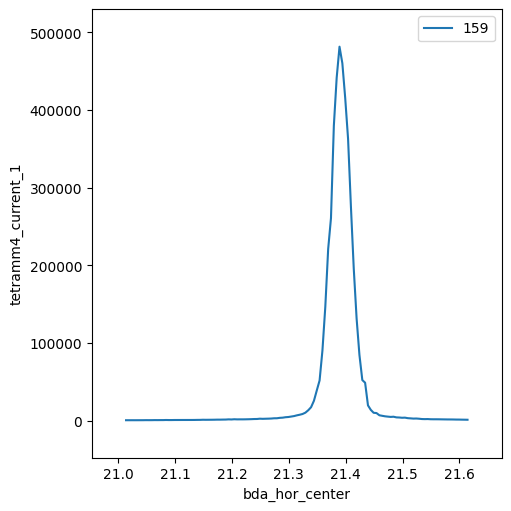

In [50]:
RE(bps.mv(lateral_mirror.bender_1, lat_bend_1_cen+7*5e4,
          lateral_mirror.bender_2, lat_bend_2_cen+2.5*5e4))

RE(bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=121))

In [51]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.38989325900056}
,
'cen':
    {'tetramm4_current_1': 21.391605130965825}
,
'max':
    {'tetramm4_current_1': (21.38922,
                            481701.2315702056)}
,
'min':
    {'tetramm4_current_1': (21.01929,
                            439.51164322697855)}
,
'fwhm':
    {'tetramm4_current_1': 0.039673989572868607}
,
}

('23febd76-ce73-4a52-a4ad-ba77eef632bd',)

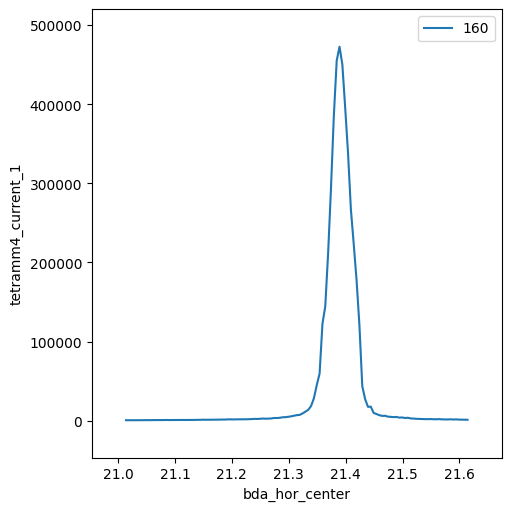

In [52]:
RE(bps.mv(lateral_mirror.bender_1, lat_bend_1_cen+6.5*5e4,
          lateral_mirror.bender_2, lat_bend_2_cen+2.5*5e4))

RE(bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=121))

In [53]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.389644245316763}
,
'cen':
    {'tetramm4_current_1': 21.39174611686528}
,
'max':
    {'tetramm4_current_1': (21.389270000000003,
                            472947.2637296663)}
,
'min':
    {'tetramm4_current_1': (21.019260000000003,
                            435.18299808525063)}
,
'fwhm':
    {'tetramm4_current_1': 0.04196491151469672}
,
}

('dd32e6cf-0e83-48c5-abcd-ab31c2791437',)

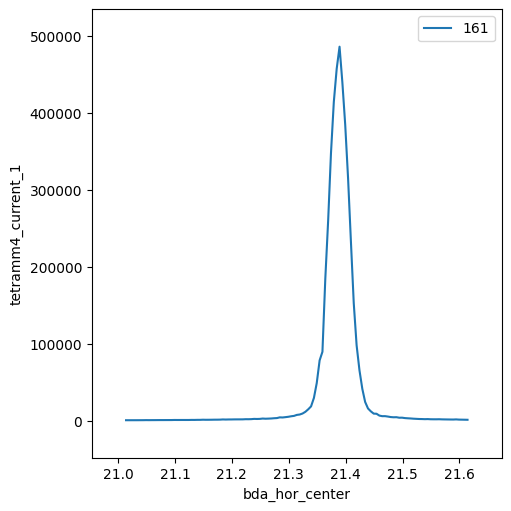

In [54]:
RE(bps.mv(lateral_mirror.bender_1, lat_bend_1_cen+6.5*5e4,
          lateral_mirror.bender_2, lat_bend_2_cen+2.5*5e4))

RE(bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=121))

In [55]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.387125004704743}
,
'cen':
    {'tetramm4_current_1': 21.388433965530282}
,
'max':
    {'tetramm4_current_1': (21.38933,
                            486356.5451335508)}
,
'min':
    {'tetramm4_current_1': (21.0193,
                            439.51516066698787)}
,
'fwhm':
    {'tetramm4_current_1': 0.040483172880890095}
,
}

In [56]:
lat_bend_1_cen+6.5*5e4

-30271015.0

In [57]:
lat_bend_2_cen+2.5*5e4

-29521008.0

## Bending verification

We will verify the benders after the ops day on monday. Today is 06/18/2025.

In [3]:
## Current configs.

vert_b1_cen = 17651364
vert_b2_cen = 16628840

hor_b1_cen = -30270953
hor_b2_cen = -29521006

('5d163bdb-bc58-47a7-8097-f3f9218327ba',)

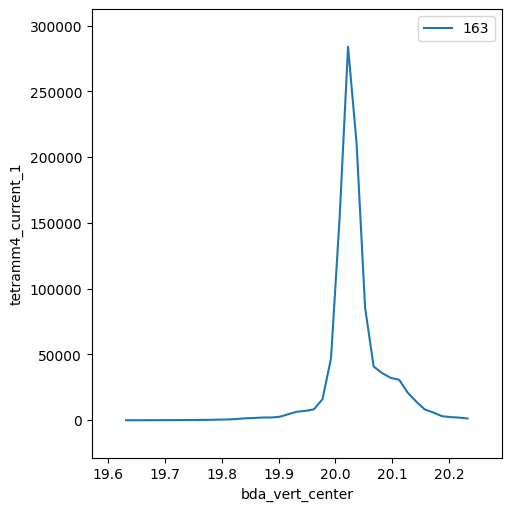

In [6]:
RE(bps.mv(bda_vert.size, 1.0485+0.015,
          bda_hor.size, 0.747+4))


RE(bp.rel_scan(detectors, bda_vert.center, -0.3, 0.3, num=41))

In [7]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 20.035204710969342}
,
'cen':
    {'tetramm4_current_1': 20.025453574231083}
,
'max':
    {'tetramm4_current_1': (20.02211,
                            283950.4546014437)}
,
'min':
    {'tetramm4_current_1': (19.63185,
                            22.961856431979033)}
,
'fwhm':
    {'tetramm4_current_1': 0.039716333852467756}
,
}

('00474eda-4741-4377-b24e-b853aee51b59',)

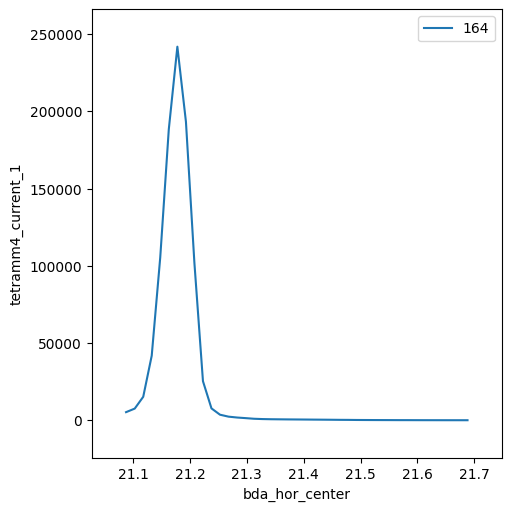

In [8]:
RE(bps.mv(bda_vert.size, 1.0485+4,
          bda_hor.size, 0.747+0.015))


RE(bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=41))

In [9]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.178325591759616}
,
'cen':
    {'tetramm4_current_1': 21.177694620964118}
,
'max':
    {'tetramm4_current_1': (21.17792,
                            241793.94338049888)}
,
'min':
    {'tetramm4_current_1': (21.687920000000002,
                            42.81496749277807)}
,
'fwhm':
    {'tetramm4_current_1': 0.054131679383228715}
,
}

In [10]:
def bender_scans():

    yield from bps.mv(bda_vert.size, 1.0485+0.015,
          bda_hor.size, 0.747+4)

    for i in np.arange(-3, 4, 1):

        yield from bps.mv(hhl_mirrors.bender_1, vert_b1_cen+i*2.5e4)
        yield from bp.rel_scan(detectors, bda_vert.center, -0.3, 0.3, num=121)

    yield from bps.mv(hhl_mirrors.bender_1, vert_b1_cen)

    for i in np.arange(-3, 4, 1):

        yield from bps.mv(hhl_mirrors.bender_2, vert_b2_cen+i*2.5e4)
        yield from bp.rel_scan(detectors, bda_vert.center, -0.3, 0.3, num=121)

    yield from bps.mv(hhl_mirrors.bender_2, vert_b2_cen)


    yield from bps.mv(bda_vert.size, 1.0485+4,
          bda_hor.size, 0.747+0.015)

    for i in np.arange(-3, 4, 1):

        yield from bps.mv(lateral_mirror.bender_1, hor_b1_cen+i*2.5e4)
        yield from bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=121)

    yield from bps.mv(lateral_mirror.bender_1, hor_b1_cen)

    for i in np.arange(-3, 4, 1):

        yield from bps.mv(lateral_mirror.bender_2, hor_b2_cen+i*2.5e4)
        yield from bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=121)

    yield from bps.mv(lateral_mirror.bender_2, hor_b2_cen)

('8b2a110f-7dbe-44cb-aac2-2cd78843f3b8',
 '5e73c724-4cb7-42aa-9a74-5b884103df9d',
 'f23a05dd-c7b2-47ce-b897-c367c05a08df',
 '449571b3-92d5-4ecb-9a00-103fc46ec329',
 '95d04d05-0ab8-497d-93f6-8d830ad4a6c9',
 'ba5d8cce-aa7c-475a-817c-461148057956',
 '33a55a2e-541c-4478-8aa4-873758780d2f',
 'ff7fa9f9-b652-4ee6-bbcf-3ab21ac92a07',
 '3b17448d-289c-43e3-b283-778c4591fcf6',
 '68c02698-0762-4f74-95bd-fc765703e977',
 'f4d536b4-6438-45e5-9b95-3bfa47d41ee2',
 'a311df5d-5243-403e-a32d-f2ee20092fae',
 'b68b26cb-741d-4808-a4ec-bdda0d7d5baa',
 '9d22ee95-944f-48c8-8a0e-be9f8f91dfcc',
 '2d267c63-cb25-4663-936a-476ccb4dc337',
 '30152dca-d525-4614-9c38-b58dc1ed3967',
 'b3c6112f-ea12-49da-84cb-53c6e21b9c5b',
 '98eb5929-1096-488f-b375-5e336c300b78',
 '0d072ee5-b616-4396-bf9f-b09623636624',
 'd2cef40a-2fea-4108-9c7f-5d98bd53e4fb',
 'ef914ea8-3cca-4fd2-b1c5-934928b6d33b',
 '6ff629b9-049e-4323-b5df-0ee7d3091393',
 '16e616f5-4e1a-4033-b1d0-174b94c8ce17',
 'b2cca812-c79d-4b79-98ec-706d12daea2e',
 '8a4499db-8b54-

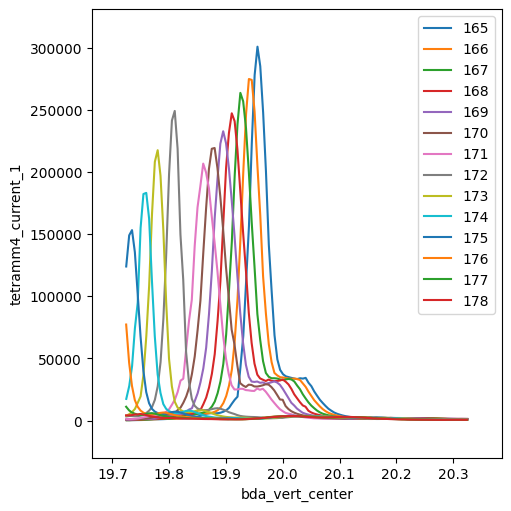

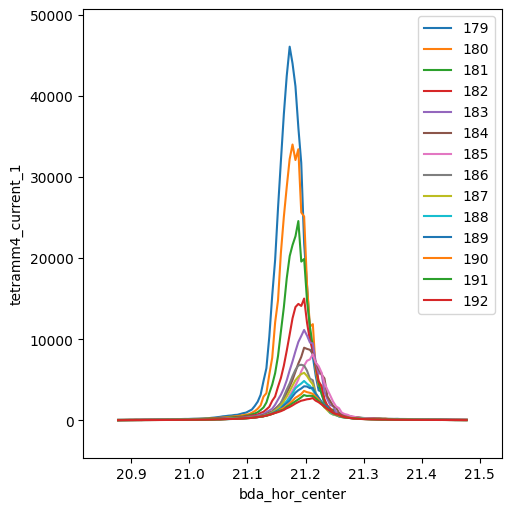

In [11]:
RE(bender_scans())

In [12]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.193508267377293}
,
'cen':
    {'tetramm4_current_1': 21.20139148980393}
,
'max':
    {'tetramm4_current_1': (21.21224,
                            2766.4572641092677)}
,
'min':
    {'tetramm4_current_1': (20.877080000000003,
                            38.400669705911405)}
,
'fwhm':
    {'tetramm4_current_1': 0.0729846210316154}
,
}

('50e302ef-16a8-4ef9-8c52-7328970fae1a',)

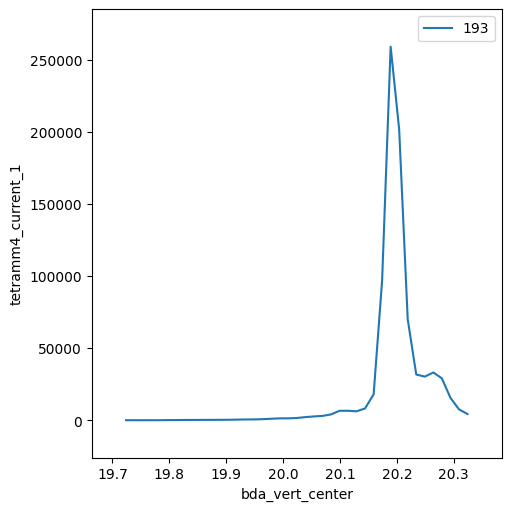

In [13]:
RE(bps.mv(bda_vert.size, 1.0485+0.015,
          bda_hor.size, 0.747+4))


RE(bp.rel_scan(detectors, bda_vert.center, -0.3, 0.3, num=41))

In [14]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 20.19890168746774}
,
'cen':
    {'tetramm4_current_1': 20.19467841721125}
,
'max':
    {'tetramm4_current_1': (20.18906,
                            259195.10221582855)}
,
'min':
    {'tetramm4_current_1': (19.75409,
                            127.25913053731247)}
,
'fwhm':
    {'tetramm4_current_1': 0.03517718967755812}
,
}

('47197c77-8581-4be4-bcf3-9a0addc57546',)

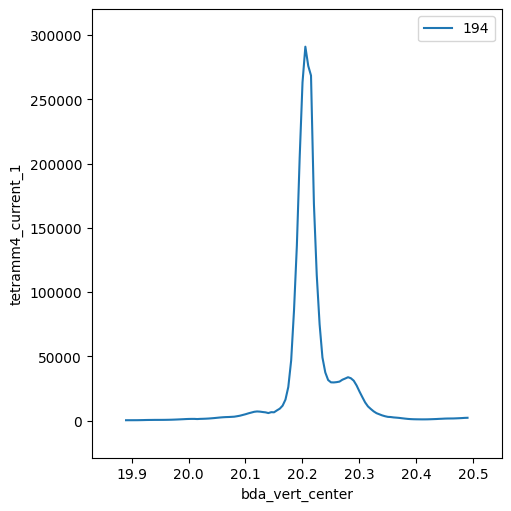

In [15]:
RE(bp.rel_scan(detectors, bda_vert.center, -0.3, 0.3, num=121))

In [16]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 20.216291999614285}
,
'cen':
    {'tetramm4_current_1': 20.206653769779038}
,
'max':
    {'tetramm4_current_1': (20.20523,
                            290964.1105744431)}
,
'min':
    {'tetramm4_current_1': (19.890040000000003,
                            405.365203040516)}
,
'fwhm':
    {'tetramm4_current_1': 0.03136488658239145}
,
}

('cb7b7f90-3bf1-4612-8c40-7d9a9eadc43d',)

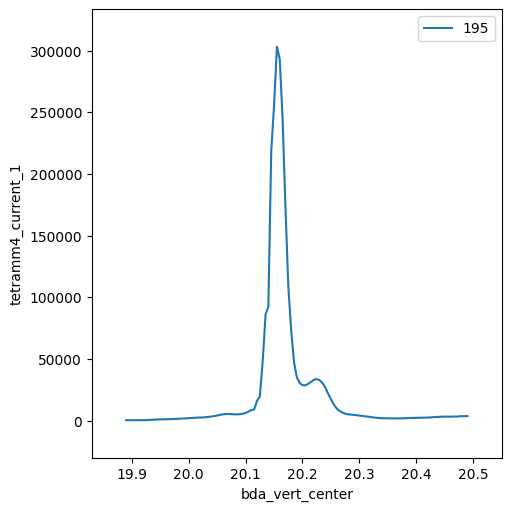

In [17]:
RE(bps.mv(bda_vert.size, 1.0485+0.015,
          bda_hor.size, 0.747+4))


RE(bp.rel_scan(detectors, bda_vert.center, -0.3, 0.3, num=121))

In [18]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 20.172850652249178}
,
'cen':
    {'tetramm4_current_1': 20.1571523279834}
,
'max':
    {'tetramm4_current_1': (20.155170000000002,
                            303156.63819088106)}
,
'min':
    {'tetramm4_current_1': (19.889940000000003,
                            298.19160496501866)}
,
'fwhm':
    {'tetramm4_current_1': 0.029348976125177728}
,
}

/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<Axes: xlabel='bda_vert_center'>

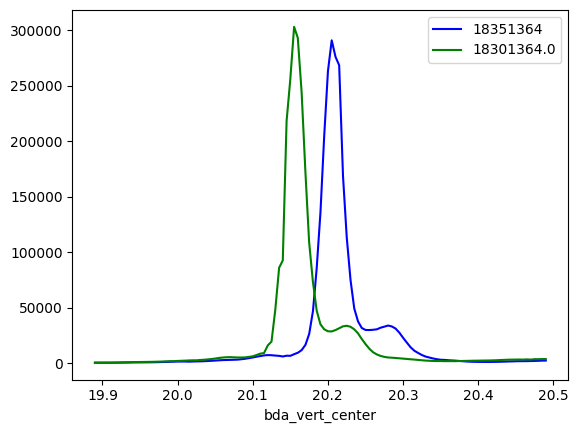

In [19]:
data1 = cat[194].primary.read().to_pandas()
data2 = cat[195].primary.read().to_pandas()
# data3 = cat[117].primary.read().to_pandas()
# data4 = cat[118].primary.read().to_pandas()

data2[]


fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-5e4), c='green')
# data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-1e5), c='red')
# data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-2e5), c='black')

('f1f93706-d52b-4bf5-8dd6-61d6a2cc6fc6',)

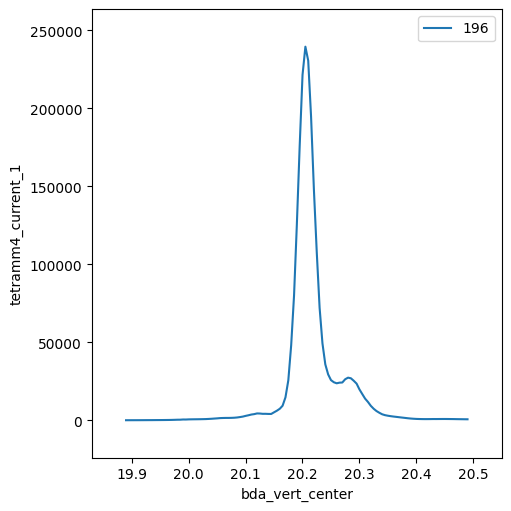

In [20]:
RE(bps.mv(bda_vert.size, 1.0485+0.015,
          bda_hor.size, 0.747+4))RE(bps.mv(bda_vert.size, 1.0485+0.015,
          bda_hor.size, 0.747+4))


RE(bp.rel_scan(detectors, bda_vert.center, -0.3, 0.3, num=121))


RE(bp.rel_scan(detectors, bda_vert.center, -0.3, 0.3, num=121))

In [21]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 20.218161818818686}
,
'cen':
    {'tetramm4_current_1': 20.206628905317643}
,
'max':
    {'tetramm4_current_1': (20.20521,
                            239610.22106678234)}
,
'min':
    {'tetramm4_current_1': (19.889950000000002,
                            75.80719849122062)}
,
'fwhm':
    {'tetramm4_current_1': 0.03411433444415124}
,
}

('59437e26-2054-4f72-818d-b8d3b771639b',)

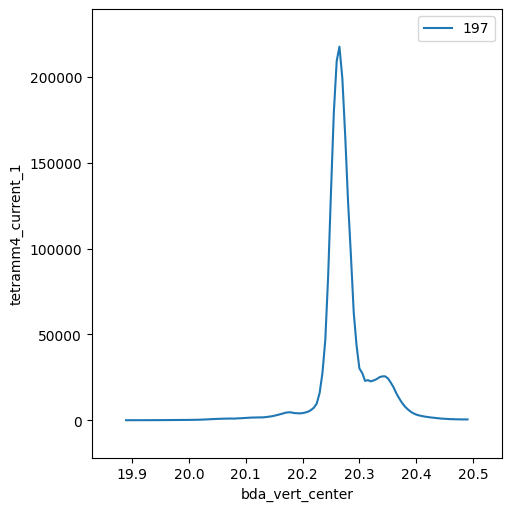

In [22]:
RE(bps.mv(hhl_mirrors.bender_1, vert_b1_cen+2*2.5e4))

RE(bp.rel_scan(detectors, bda_vert.center, -0.3, 0.3, num=121))

In [23]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 20.274190023672308}
,
'cen':
    {'tetramm4_current_1': 20.265139439406255}
,
'max':
    {'tetramm4_current_1': (20.264770000000002,
                            217456.92388529138)}
,
'min':
    {'tetramm4_current_1': (19.88964,
                            66.92435981928959)}
,
'fwhm':
    {'tetramm4_current_1': 0.03542937824057901}
,
}

('806f8726-a237-4e5f-a4c1-c728ef605bbf',)

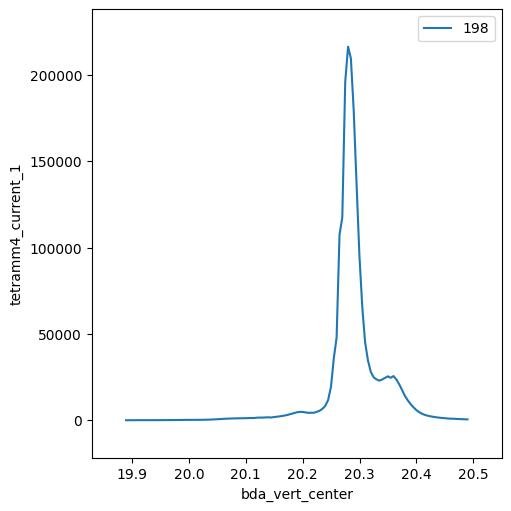

In [24]:
RE(bps.mv(hhl_mirrors.bender_1, vert_b1_cen-2*2.5e4))

RE(bp.rel_scan(detectors, bda_vert.center, -0.3, 0.3, num=121))

In [27]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 20.2903338248624}
,
'cen':
    {'tetramm4_current_1': 20.281681372303076}
,
'max':
    {'tetramm4_current_1': (20.27983,
                            216373.29573496766)}
,
'min':
    {'tetramm4_current_1': (19.88954,
                            53.86705911335006)}
,
'fwhm':
    {'tetramm4_current_1': 0.033079958793766906}
,
}

/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order

<Axes: xlabel='bda_vert_center'>

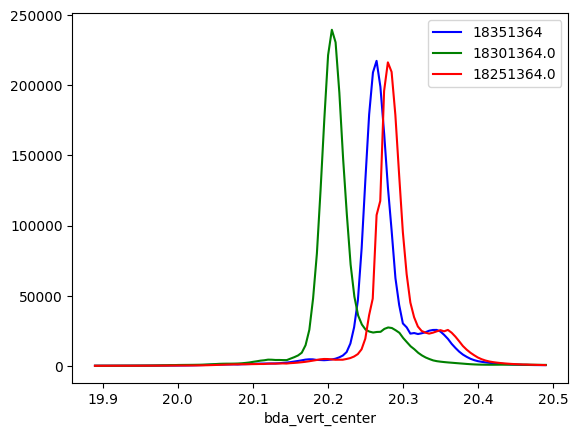

In [26]:
data1 = cat[197].primary.read().to_pandas()
data2 = cat[196].primary.read().to_pandas()
data3 = cat[198].primary.read().to_pandas()
# data4 = cat[118].primary.read().to_pandas()



fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-5e4), c='green')
data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-1e5), c='red')
# data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-2e5), c='black')

('4e11b766-8546-4ab7-96b6-cba0e5d8829e',)

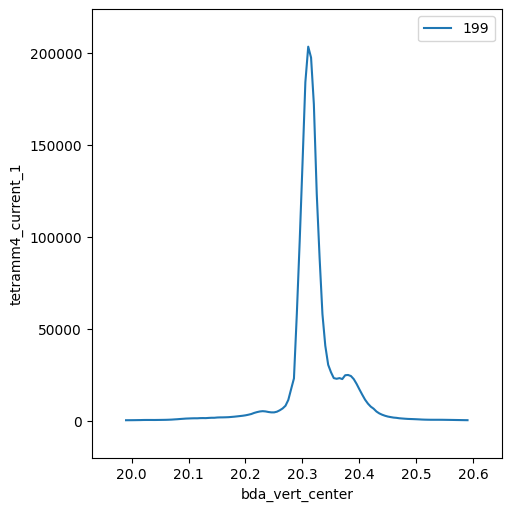

CA.Client.Exception...............................................
    Context: "isnpc05.xray.aps.anl.gov:45585"
    Source File: ../cac.cpp line 1238
    Current Time: Thu Jun 19 2025 13:49:39.897670544
..................................................................


In [28]:
RE(bps.mv(hhl_mirrors.bender_1, vert_b1_cen-4*2.5e4))

RE(bp.rel_scan(detectors, bda_vert.center, -0.3, 0.3, num=121))

('72c3265b-ec1f-4d48-bc87-e1b8c939c11c',)

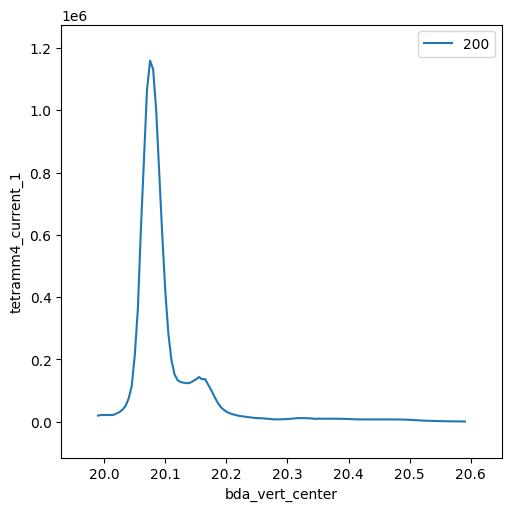

In [30]:
RE(bps.mv(bda_vert.size, 1.0485+0.015,
          bda_hor.size, 0.747+4))

RE(bp.rel_scan(detectors, bda_vert.center, -0.3, 0.3, num=121))

In [31]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 20.103384088338046}
,
'cen':
    {'tetramm4_current_1': 20.077711625323033}
,
'max':
    {'tetramm4_current_1': (20.075380000000003,
                            1159667.1631159878)}
,
'min':
    {'tetramm4_current_1': (20.590380000000003,
                            805.4546553457565)}
,
'fwhm':
    {'tetramm4_current_1': 0.03621830832041084}
,
}

('d97e4da5-9ab9-4311-ace9-22d3660bb794',)

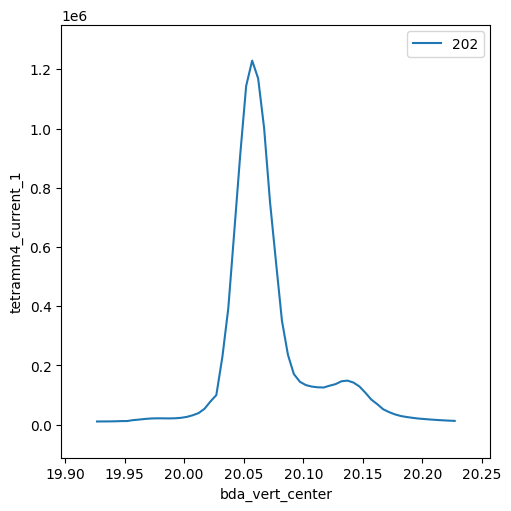

In [34]:
RE(bps.mv(hhl_mirrors.bender_1, vert_b1_cen-6*2.5e4))

RE(bp.rel_scan(detectors, bda_vert.center, -0.15, 0.15, num=61))

In [33]:
RE.abort()

W Thu-17:11:05.120: No open traces left to close!
E Thu-17:11:10.268: Run aborted
Traceback (most recent call last):
  File "/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/bluesky/run_engine.py", line 1621, in _run
    msg = self._plan_stack[-1].send(resp)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/bluesky/preprocessors.py", line 1399, in __call__
    return (yield from plan)
            ^^^^^^^^^^^^^^^
  File "/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/bluesky/preprocessors.py", line 1252, in baseline_wrapper
    return (yield from plan_mutator(plan, insert_baseline))
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/bluesky/preprocessors.py", line 188, in plan_mutator
    raise ex
  File "/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/bluesky/preprocessors.py", line

Aborting: running cleanup and marking exit_status as 'abort'...


('04efe226-aa43-4d9f-8fc8-8c0b85a419b4',)

<Axes: xlabel='bda_vert_center'>

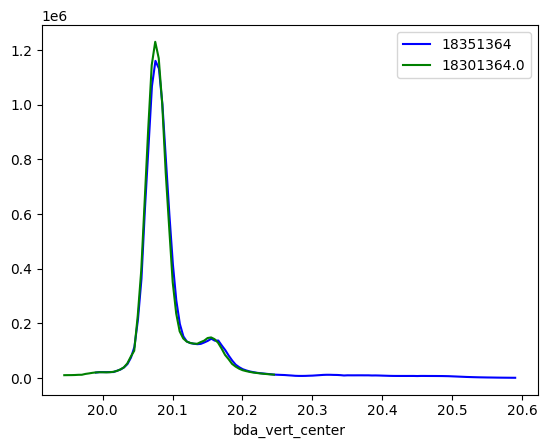

In [45]:
data1 = cat[200].primary.read().to_pandas()
data2 = cat[202].primary.read().to_pandas()
# data3 = cat[198].primary.read().to_pandas()
# data4 = cat[118].primary.read().to_pandas()

data2['bda_vert_center'] = data2['bda_vert_center'] +0.018



fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-5e4), c='green')
# data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-1e5), c='red')
# data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-2e5), c='black')

('18ca70b7-32ea-4436-a282-b5d4ac201c57',)

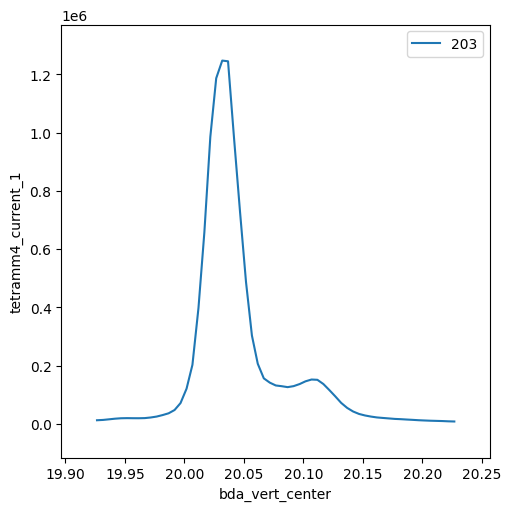

In [46]:
RE(bps.mv(hhl_mirrors.bender_1, vert_b1_cen-10*2.5e4))

RE(bp.rel_scan(detectors, bda_vert.center, -0.15, 0.15, num=61))

In [51]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 20.045520883575097}
,
'cen':
    {'tetramm4_current_1': 20.032545797886343}
,
'max':
    {'tetramm4_current_1': (20.031820000000003,
                            1247422.4239977496)}
,
'min':
    {'tetramm4_current_1': (20.226770000000002,
                            8509.346436754273)}
,
'fwhm':
    {'tetramm4_current_1': 0.03262040792512977}
,
}

<Axes: xlabel='bda_vert_center'>

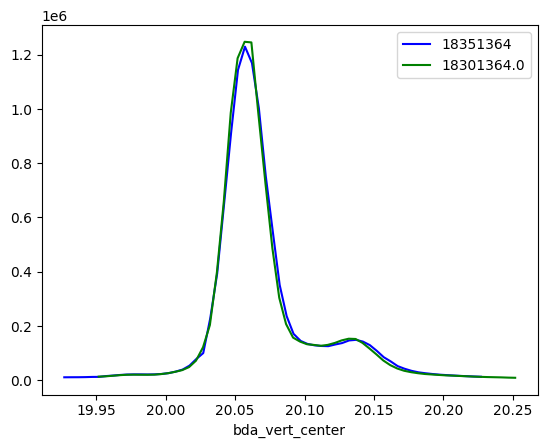

In [50]:
data1 = cat[202].primary.read().to_pandas()
data2 = cat[203].primary.read().to_pandas()
# data3 = cat[198].primary.read().to_pandas()
# data4 = cat[118].primary.read().to_pandas()

data2['bda_vert_center'] = data2['bda_vert_center'] +0.025



fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-5e4), c='green')
# data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-1e5), c='red')
# data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-2e5), c='black')

('03159eb5-ead3-4d47-ace3-d6715fc4c01a',)

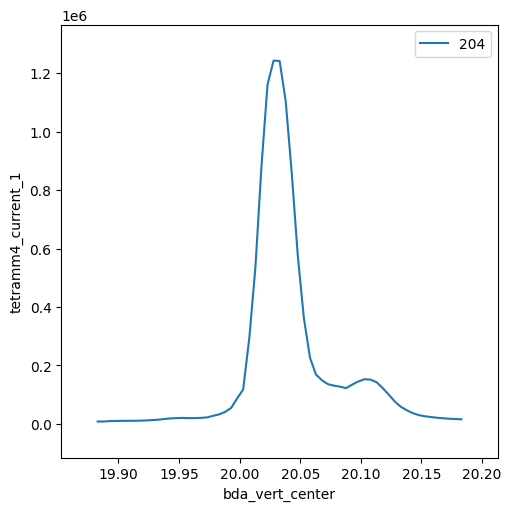

In [52]:
RE(bps.mv(hhl_mirrors.bender_1, vert_b1_cen-10*2.5e4))

RE(bp.rel_scan(detectors, bda_vert.center, -0.15, 0.15, num=61))

/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<Axes: xlabel='bda_vert_center'>

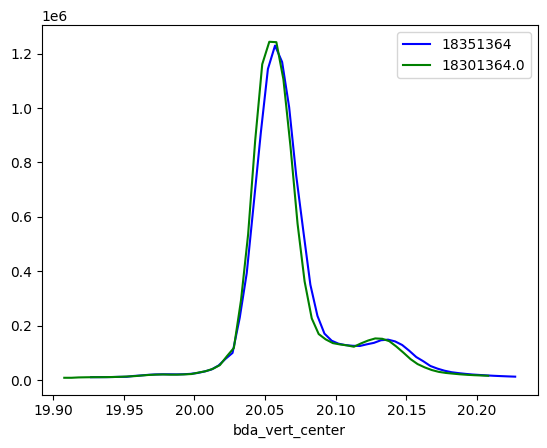

In [53]:
data1 = cat[202].primary.read().to_pandas()
data2 = cat[204].primary.read().to_pandas()
# data3 = cat[198].primary.read().to_pandas()
# data4 = cat[118].primary.read().to_pandas()

data2['bda_vert_center'] = data2['bda_vert_center'] +0.025



fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-5e4), c='green')
# data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-1e5), c='red')
# data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-2e5), c='black')

('523c97d8-de4c-4e97-96b5-951471a2da1b',)

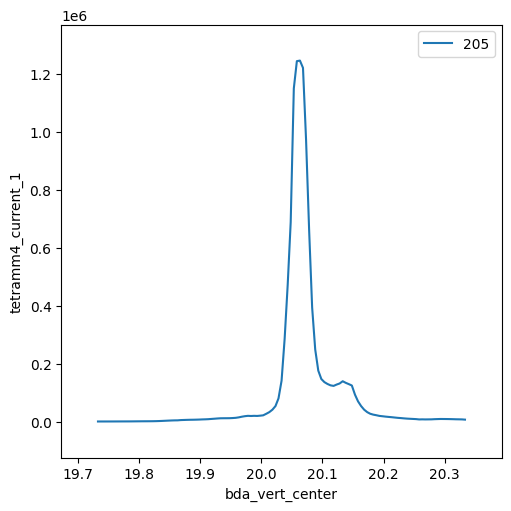

In [54]:
RE(bp.rel_scan(detectors, bda_vert.center, -0.3, 0.3, num=121))

<Axes: xlabel='bda_vert_center'>

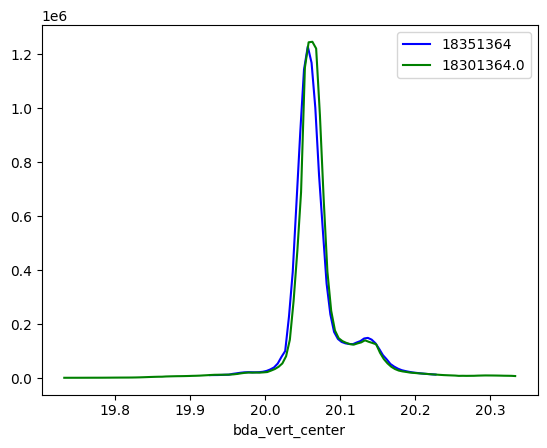

In [57]:
data1 = cat[202].primary.read().to_pandas()
data2 = cat[205].primary.read().to_pandas()
# data3 = cat[198].primary.read().to_pandas()
# data4 = cat[118].primary.read().to_pandas()

data2['bda_vert_center'] = data2['bda_vert_center'] +0.0



fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-5e4), c='green')
# data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-1e5), c='red')
# data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(bender_1_cen-2e5), c='black')

In [58]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 20.07355088901523}
,
'cen':
    {'tetramm4_current_1': 20.062792028806093}
,
'max':
    {'tetramm4_current_1': (20.06321,
                            1247014.7644243345)}
,
'min':
    {'tetramm4_current_1': (19.732940000000003,
                            401.5588351418527)}
,
'fwhm':
    {'tetramm4_current_1': 0.032312578184111374}
,
}

In [59]:
RE(bps.mv(bda_vert.size, 1.0485+0.04,
          bda_hor.size, 0.747+4))

()

('24165241-4568-4b98-a9ae-b6ac075b14b3',)

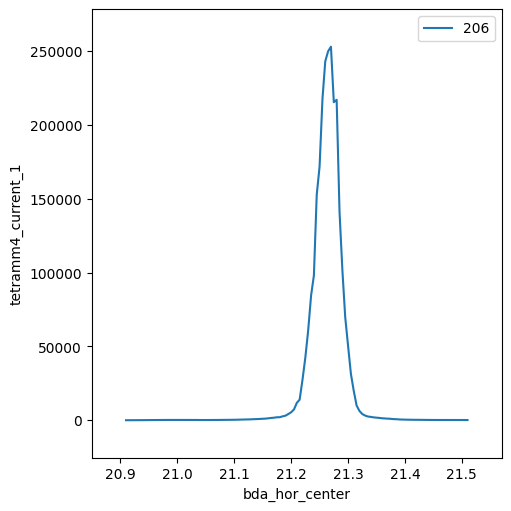

In [60]:
RE(bps.mv(bda_vert.size, 1.0485+0.04,
          bda_hor.size, 0.747+0.015))

RE(bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=121))

In [61]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.263642372848327}
,
'cen':
    {'tetramm4_current_1': 21.264796742784107}
,
'max':
    {'tetramm4_current_1': (21.270010000000003,
                            253135.24435885047)}
,
'min':
    {'tetramm4_current_1': (20.909920000000003,
                            45.513314960166866)}
,
'fwhm':
    {'tetramm4_current_1': 0.044312572597217326}
,
}

In [ ]:
RE(bps.mv(bda_vert.size, 1.0485+0.08,
          bda_hor.size, 0.747+0.1))

()

In [66]:
RE(bps.mv(bda_vert.size, 1.0485+1,
          bda_hor.size, 0.747+1))

()

In [73]:
RE(bps.mv(bda_vert.size, 1.0485+0.08,
          bda_hor.size, 0.747+0.1))

()

## 06/21/2025

Retuning bdas.

Starting with vsize=2.07850, vcen=20.144
hsize = 1.847, hcen =  21.265


('6e04668a-8db8-4860-9837-c26d6e7c69e2',)

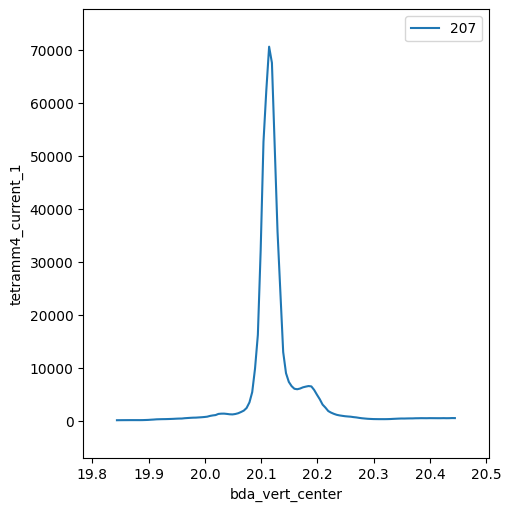

In [4]:
RE(bps.mv(bda_vert.size, 1.0485+0.015,
          bda_hor.size, 0.747+2))


RE(bp.rel_scan(detectors, bda_vert.center, -0.3, 0.3, num=121))

In [5]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 20.126551370382554}
,
'cen':
    {'tetramm4_current_1': 20.114560506205613}
,
'max':
    {'tetramm4_current_1': (20.114130000000003,
                            70552.72924037061)}
,
'min':
    {'tetramm4_current_1': (19.84383,
                            80.27484064055334)}
,
'fwhm':
    {'tetramm4_current_1': 0.029334700446380424}
,
}

('64d4884e-4b22-45df-a954-8df3152dd7e6',)

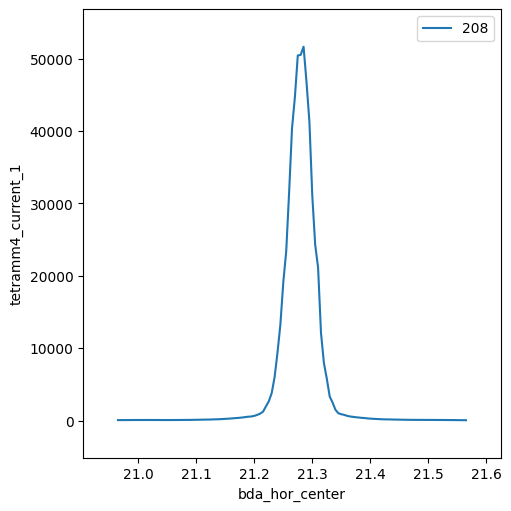

In [6]:
RE(bps.mv(bda_vert.size, 1.0485+2,
          bda_hor.size, 0.747+0.015))


RE(bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=121))

In [7]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.27953505193281}
,
'cen':
    {'tetramm4_current_1': 21.28021956396573}
,
'max':
    {'tetramm4_current_1': (21.28498,
                            51636.0133229504)}
,
'min':
    {'tetramm4_current_1': (21.565080000000002,
                            63.6576566446959)}
,
'fwhm':
    {'tetramm4_current_1': 0.047305712391832344}
,
}

In [8]:
RE(bps.mv(bda_vert.size, 1.0485+0.015,
          bda_hor.size, 0.747+0.030))

()

CA.Client.Exception...............................................
    Context: "isnpc05.xray.aps.anl.gov:36465"
    Source File: ../cac.cpp line 1238
    Current Time: Mon Jun 23 2025 11:38:30.502760053
..................................................................


## 06/24/2025

Start of week alignment.

The main difference that we have with previous steps is that we are using the new pin diode that is next to the diamond window of the kb chamber.

In [ ]:
RE(bps.mv(bda_vert.size, 1.0485+0.015,
          bda_hor.size, 0.747+0.030))

('db1dfb87-886c-46d8-bdb6-a2f14d32570a',)

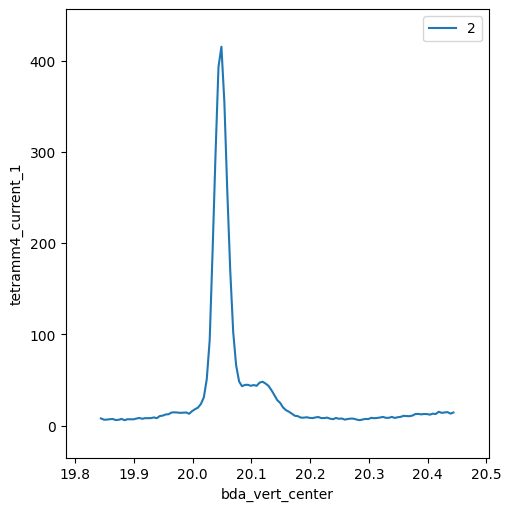

In [3]:
RE(bps.mv(bda_vert.size, 1.0485+0.01,
          bda_hor.size, 0.747+1))


RE(bp.rel_scan(detectors, bda_vert.center, -0.3, 0.3, num=121))

In [4]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 20.087737374734385}
,
'cen':
    {'tetramm4_current_1': 20.048190280708052}
,
'max':
    {'tetramm4_current_1': (20.048920000000003,
                            415.2438006610742)}
,
'min':
    {'tetramm4_current_1': (19.884030000000003,
                            6.083028555197219)}
,
'fwhm':
    {'tetramm4_current_1': 0.026777512494511768}
,
}

('9753d76a-d311-4ac9-84ae-131bb77cd060',)

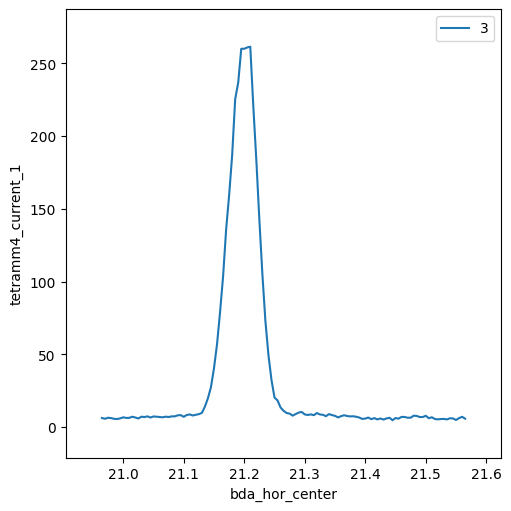

In [5]:
RE(bps.mv(bda_vert.size, 1.0485+1,
          bda_hor.size, 0.747+0.01))


RE(bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=121))

In [6]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.21167553361452}
,
'cen':
    {'tetramm4_current_1': 21.197989666329228}
,
'max':
    {'tetramm4_current_1': (21.210030000000003,
                            261.44044083307426)}
,
'min':
    {'tetramm4_current_1': (21.4451,
                            4.77408926772582)}
,
'fwhm':
    {'tetramm4_current_1': 0.05659542108577753}
,
}

In [8]:
RE(bps.mv(bda_vert.size, 1.0465+0.015,
          bda_hor.size, 0.746+0.03))

()

('1e3eb1fd-dd82-41d7-be04-9a32bc01130d',)

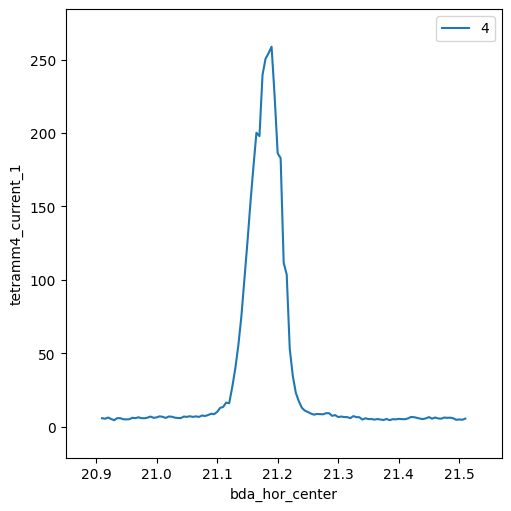

In [9]:
RE(bps.mv(bda_vert.size, 1.0485+1,
          bda_hor.size, 0.747+0.01))


RE(bp.rel_scan(detectors, bda_hor.center, -0.3, 0.3, num=121))

In [10]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.184523408496595}
,
'cen':
    {'tetramm4_current_1': 21.17992285608053}
,
'max':
    {'tetramm4_current_1': (21.19002,
                            258.7394061011351)}
,
'min':
    {'tetramm4_current_1': (21.385050000000003,
                            4.564074252041855)}
,
'fwhm':
    {'tetramm4_current_1': 0.05737203178335548}
,
}

In [12]:
RE(bps.mv(bda_vert.size, 1.0465+0.015,
          bda_hor.size, 0.746+0.03))

()

('2bb653d1-8602-427e-b1f6-2b0a267f4369',)

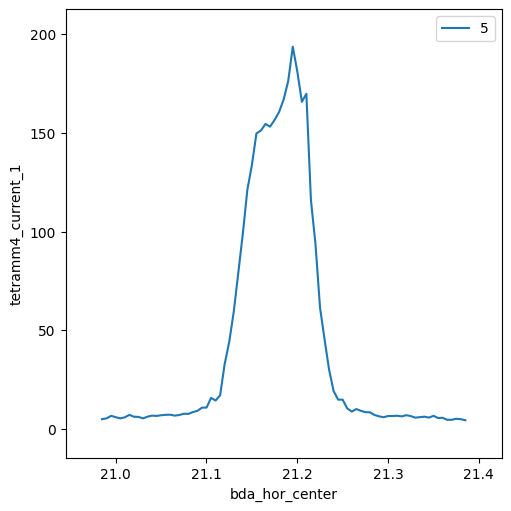

In [13]:
RE(bps.mv(bda_vert.size, 1.0485+1,
          bda_hor.size, 0.747+0.01))


RE(bp.rel_scan(detectors, bda_hor.center, -0.2, 0.2, num=81))

In [14]:
bec.peaks

{
'com':
    {'tetramm4_current_1': 21.17999195065232}
,
'cen':
    {'tetramm4_current_1': 21.1794750071687}
,
'max':
    {'tetramm4_current_1': (21.19508,
                            193.73540516971414)}
,
'min':
    {'tetramm4_current_1': (21.38509,
                            4.4419952366229865)}
,
'fwhm':
    {'tetramm4_current_1': 0.07877513699399685}
,
}

In [15]:
RE(bps.mv(bda_vert.size, 1.0465+0.015,
          bda_hor.size, 0.746+0.03))

()

E Wed-16:10:28.872: Motion failed: samx is in an alarm state status=7 severity=2
E Wed-16:13:16.089: Motion failed: samx is in an alarm state status=7 severity=2


## 06/29/25

In [14]:
detectors = [tetramm4.current_1, tetramm4.current_2, tetramm4.current_3, ring.current]
sd.baseline = [hhl_mirrors.bender_1, hhl_mirrors.bender_2, bda_vert.size, bda_vert.center,
               lateral_mirror.bender_1, lateral_mirror.bender_2, bda_hor.size, bda_hor.center]

('beb9b5d8-310f-4bf0-834c-0de8d0ae70b5',)

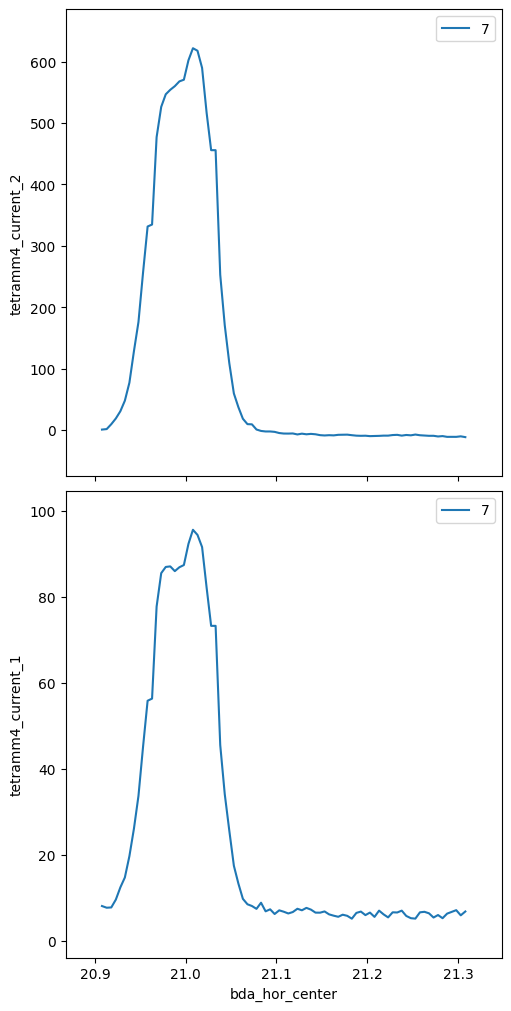

In [15]:
RE(bps.mv(bda_vert.size, 1.0485+1,
          bda_hor.size, 0.747+0.01))


RE(bp.rel_scan(detectors, bda_hor.center, -0.2, 0.2, num=81))

In [16]:
bec.peaks

{
'com':
    {'tetramm4_current_1': np.float64(21.025891980646936),
     'tetramm4_current_2': np.float64(20.98838190283694)}
,
'cen':
    {'tetramm4_current_1': np.float64(20.996358956553173),
     'tetramm4_current_2': np.float64(20.996548085722434)}
,
'max':
    {'tetramm4_current_1': (np.float64(21.00803),
                            np.float64(95.53844217917771)),
     'tetramm4_current_2': (np.float64(21.00803),
                            np.float64(621.746010478911))}
,
'min':
    {'tetramm4_current_1': (np.float64(21.18306),
                            np.float64(5.235745816914157)),
     'tetramm4_current_2': (np.float64(21.30808),
                            np.float64(-11.251703824570646))}
,
'fwhm':
    {'tetramm4_current_1': np.float64(0.08166888908548486),
     'tetramm4_current_2': np.float64(0.08044326875721453)}
,
}

('4f328191-f0bd-49fe-8d67-e1ffe143d361',)

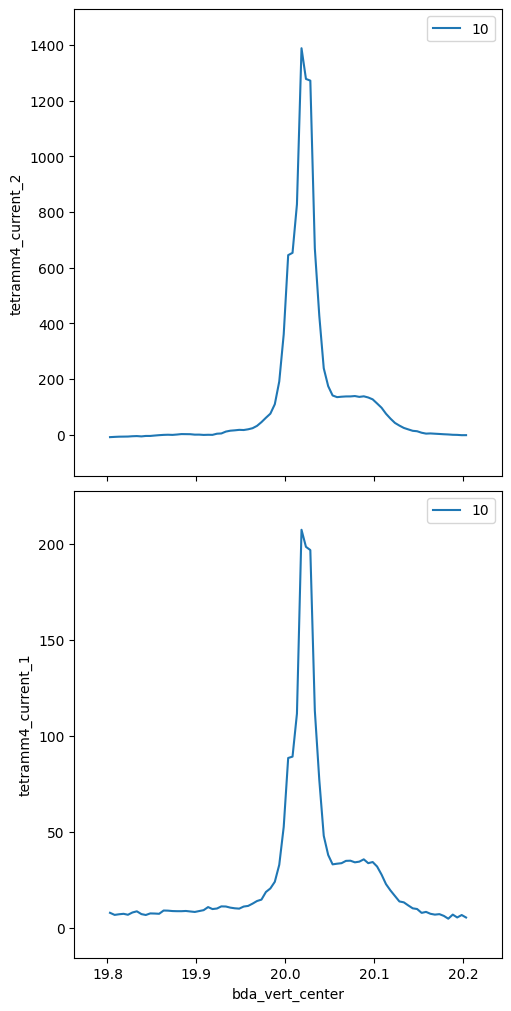

In [20]:
RE(bps.mv(bda_vert.size, 1.0485+0.01,
          bda_hor.size, 0.747+1))

RE(bp.rel_scan(detectors, bda_vert.center, -0.2, 0.2, num=81))

In [21]:
bec.peaks

{
'com':
    {'tetramm4_current_1': np.float64(20.02355477644258),
     'tetramm4_current_2': np.float64(20.03109100411729)}
,
'cen':
    {'tetramm4_current_1': np.float64(20.022933488981366),
     'tetramm4_current_2': np.float64(20.021006290392958)}
,
'max':
    {'tetramm4_current_1': (np.float64(20.018130000000003),
                            np.float64(207.34260396544678)),
     'tetramm4_current_2': (np.float64(20.018130000000003),
                            np.float64(1388.2934867619986))}
,
'min':
    {'tetramm4_current_1': (np.float64(20.183100000000003),
                            np.float64(4.684211223251485)),
     'tetramm4_current_2': (np.float64(19.802880000000002),
                            np.float64(-8.05714559851254))}
,
'fwhm':
    {'tetramm4_current_1': np.float64(0.02231403838120727),
     'tetramm4_current_2': np.float64(0.02385879105494837)}
,
}

CA.Client.Exception...............................................
    Context: "isn-xsp3.xray.aps.anl.gov:5064"
    Source File: ../cac.cpp line 1238
    Current Time: Sun Jun 29 2025 22:53:25.438395610
..................................................................
CA.Client.Exception...............................................
    Context: "isn-av1.xray.aps.anl.gov:5064"
    Source File: ../cac.cpp line 1238
    Current Time: Mon Jun 30 2025 11:17:07.485218405
..................................................................
CA.Client.Exception...............................................
    Context: "isnpc05.xray.aps.anl.gov:33303"
    Source File: ../cac.cpp line 1238
    Current Time: Mon Jun 30 2025 11:19:50.325428874
..................................................................
CA.Client.Exception...............................................
    Context: "isn-xsp3.xray.aps.anl.gov:43079"
    Source File: ../cac.cpp line 1238
    Current Time: Mon Jun 30 2025 13

## 07/09/25

We noticed a very long beam on the E station after the Monday shutdown, so we want to verify if the bender has lost its position.

('1a7ce72c-790c-4a8c-88a9-a9d39704be79',)

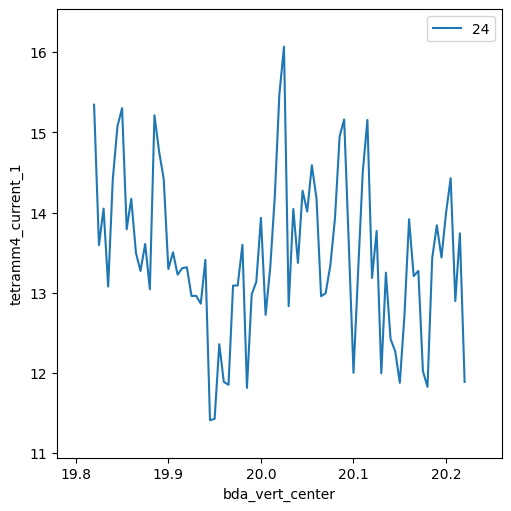

In [3]:
RE(bp.rel_scan(detectors, bda_vert.center, -0.2, 0.2, num=81))

<Axes: xlabel='bda_vert_center'>

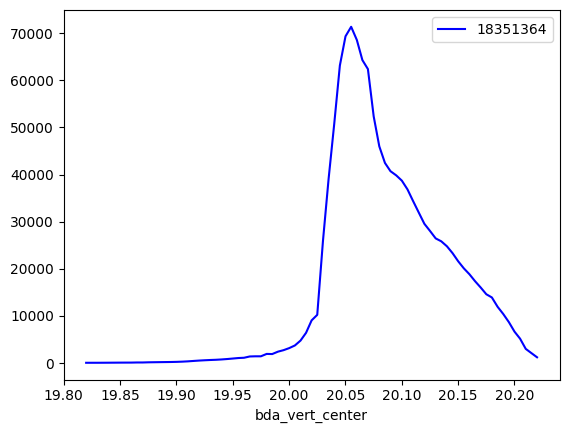

In [5]:
fig, ax = plt.subplots()

data1 = cat[24].primary.read().to_pandas()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_3', ax=ax, label=str(bender_1_cen), c='blue')


In [8]:
cat['6e04668a'].baseline.read().to_pandas()['hhl_mirrors_bender_1'].iloc[0]

17401363.658178

CA.Client.Exception...............................................
    Context: "acq2206-isn.xray.aps.anl.gov:5064"
    Source File: ../tcpiiu.cpp line 925
    Current Time: Thu Jul 10 2025 14:27:57.072917652
..................................................................
Unexpected problem with CA circuit to server "acq2206-isn.xray.aps.anl.gov:5064" was "Connection reset by peer" - disconnecting
CA.Client.Exception...............................................
    Context: "acq2206-isn.xray.aps.anl.gov:5064"
    Source File: ../cac.cpp line 1238
    Current Time: Thu Jul 10 2025 14:36:47.472866814
..................................................................
CA.Client.Exception...............................................
    Context: "isnpc05.xray.aps.anl.gov:41629"
    Source File: ../cac.cpp line 1238
    Current Time: Thu Jul 10 2025 17:42:45.137435143
..................................................................
CA.Client.Exception................................

## Bender realignment 07/15/2025

First, we will do a few tests to determine a more efficient way of scanning the BDAs.

In [2]:
detectors = [tetramm4.current_3, ring.current, bda_vert.size, bda_vert.center, 
             bda_hor.size, bda_hor.center]
sd.baseline = [hhl_mirrors.bender_1, hhl_mirrors.bender_2, bda_vert.size, bda_vert.center,
               lateral_mirror.bender_1, lateral_mirror.bender_2, bda_hor.size, bda_hor.center]



In [3]:
tetramm4.current_3.kind = 'hinted'

First, we leave all the paramters same as what we had in the past

('99555970-ab26-41a7-9250-6b769714af04',)

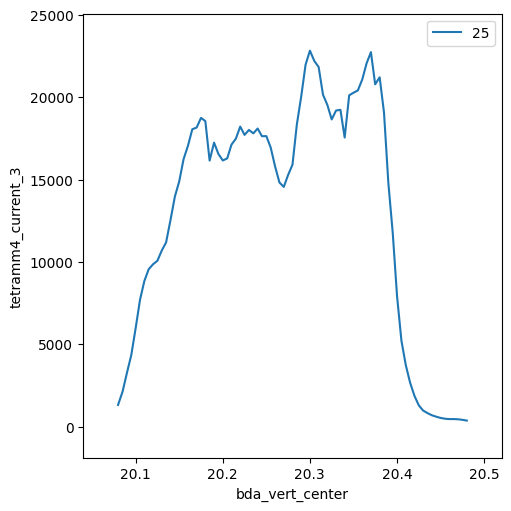

In [5]:
RE(bps.mv(bda_vert.size, 1.0425+0.01))

RE(bp.rel_scan(detectors, bda_vert.center, -0.2, 0.2, num=81))

('d687b5c2-b3ff-43f3-9c36-3f9445f36394',)

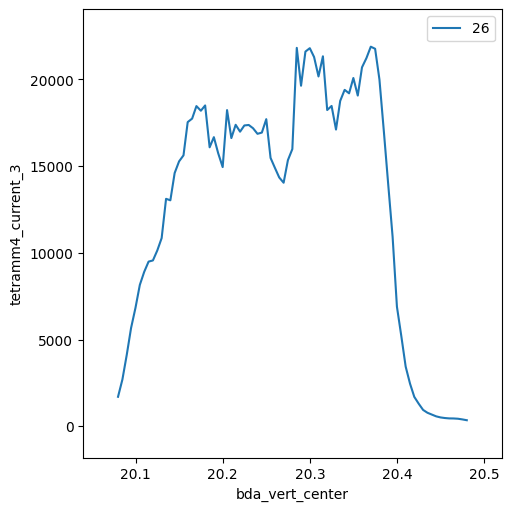

In [6]:
RE(bps.mv(bda_vert.size, 1.0425+0.01))

RE(bp.rel_scan(detectors, bda_vert.center, 0.2, -0.2, num=81))

It seems that just changing the direction of the scan saves us a bit of time. Now we will redo the scan by reducing the maximum retries of the motors to 3 and increase the retry deadband to 0.00004 instead of 0.00002.

('88599d06-a36f-4b1e-9da8-5bbc1886fb8e',)

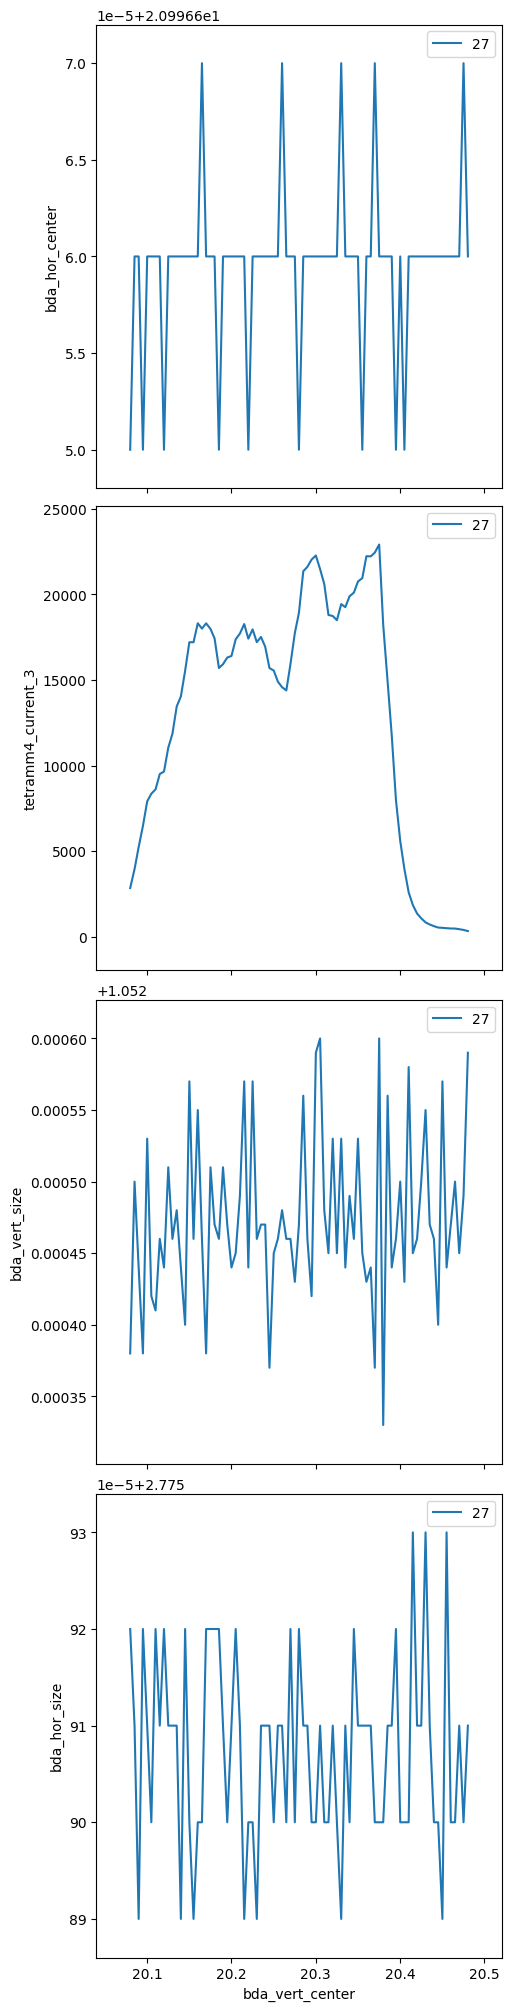

In [8]:
RE(bps.mv(bda_vert.size, 1.0425+0.01))

RE(bp.rel_scan(detectors, bda_vert.center, 0.2, -0.2, num=81))

It seems a bit worse than before, but is considerably faster. We will keep it like this and only change to the full resolution scan once we are very close.

In [3]:
detectors = [tetramm4.current_3, ring.current]
sd.baseline = [hhl_mirrors.bender_1, hhl_mirrors.bender_2, bda_vert.size, bda_vert.center,
               lateral_mirror.bender_1, lateral_mirror.bender_2, bda_hor.size, bda_hor.center]

Current vertical bender positions:

In [3]:
vb1_pos = 17401363
vb2_pos = 16628840

('6be97205-f6d8-4c55-8b23-7dcf93a259a4',)

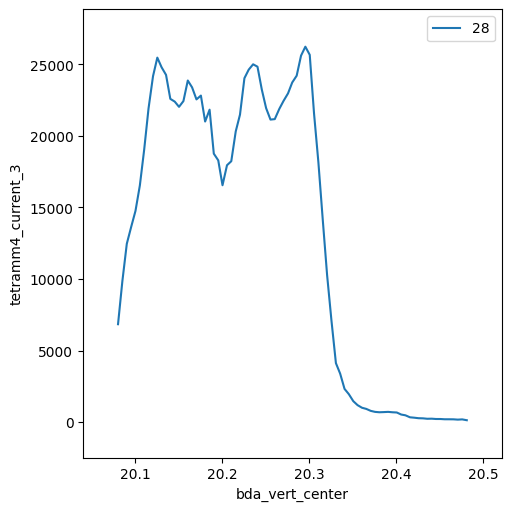

In [11]:
RE(bps.mv(hhl_mirrors.bender_2, vb2_pos+2e5))

RE(bp.rel_scan(detectors, bda_vert.center, 0.2, -0.2, num=81))

('a6826b46-153c-4036-a43f-c5213ada1165',)

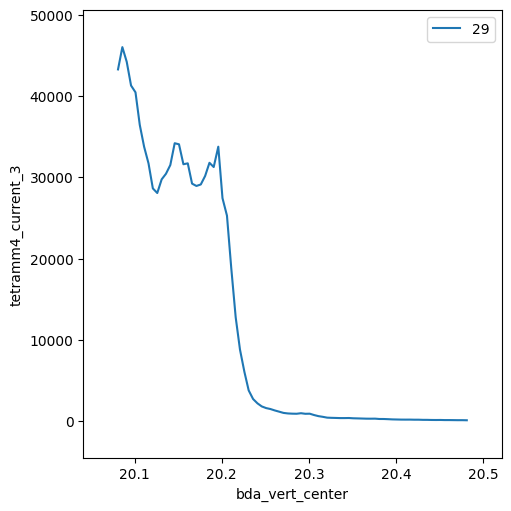

In [12]:
RE(bps.mv(hhl_mirrors.bender_2, vb2_pos+5e5))

RE(bp.rel_scan(detectors, bda_vert.center, 0.2, -0.2, num=81))

('2fb42da0-3184-43ab-b1bc-fb564a3a1dc2',)

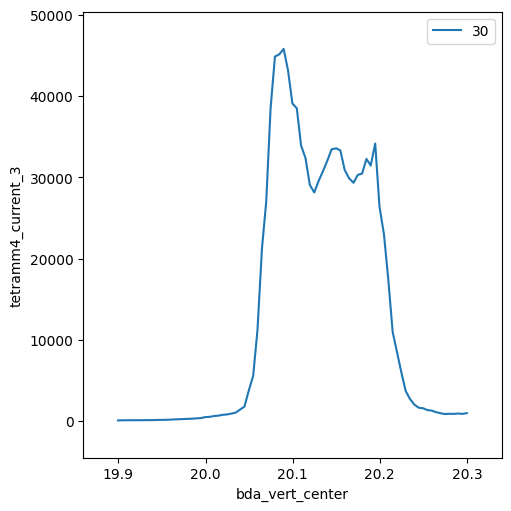

In [13]:
RE(bp.rel_scan(detectors, bda_vert.center, 0.2, -0.2, num=81))

In [14]:
bec.peaks

{
'com':
    {'tetramm4_current_3': 20.134252621647402}
,
'cen':
    {'tetramm4_current_3': 20.135507254176375}
,
'max':
    {'tetramm4_current_3': (20.08968,
                            45807.53020321887)}
,
'min':
    {'tetramm4_current_3': (19.89959,
                            101.20920468756181)}
,
'fwhm':
    {'tetramm4_current_3': 0.13858989471620475}
,
}

('48a01b40-4c8c-47bb-a8a8-439c0e70cb7a',)

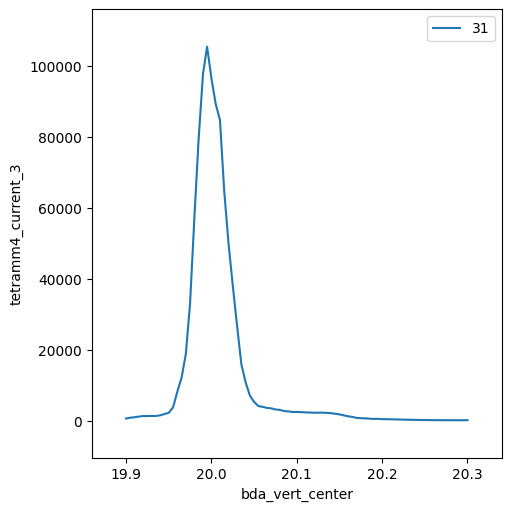

In [15]:
RE(bps.mv(hhl_mirrors.bender_2, vb2_pos+1e6))

RE(bp.rel_scan(detectors, bda_vert.center, 0.2, -0.2, num=81))

In [16]:
bec.peaks

{
'com':
    {'tetramm4_current_3': 20.007680601013966}
,
'cen':
    {'tetramm4_current_3': 19.999057439396992}
,
'max':
    {'tetramm4_current_3': (19.99489,
                            105350.77800568768)}
,
'min':
    {'tetramm4_current_3': (20.294970000000003,
                            205.40988514656107)}
,
'fwhm':
    {'tetramm4_current_3': 0.040008049197172824}
,
}

Now we will check the horizontal focus again.

('f3ad3db0-8f77-4261-94d3-8f1f33d8dc75',)

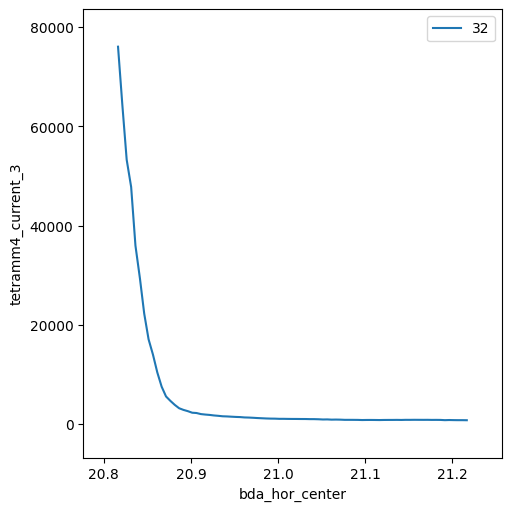

In [17]:
RE(bp.rel_scan(detectors, bda_hor.center, 0.2, -0.2, num=81))

('2adb299e-5ee9-47bb-a092-260f50aea0dc',)

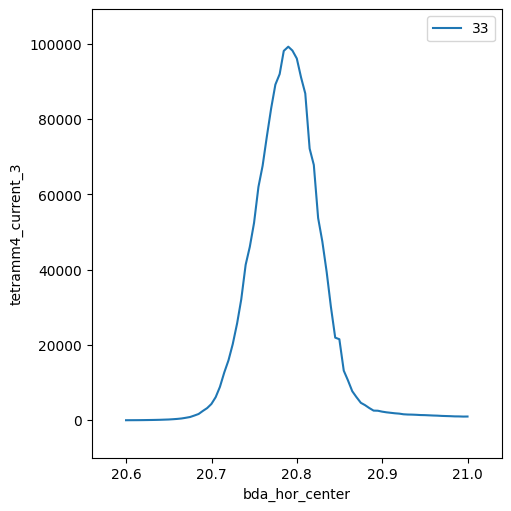

In [18]:
RE(bp.rel_scan(detectors, bda_hor.center, 0.2, -0.2, num=81))

In [19]:
bec.peaks

{
'com':
    {'tetramm4_current_3': 20.79021250480945}
,
'cen':
    {'tetramm4_current_3': 20.787914671797445}
,
'max':
    {'tetramm4_current_3': (20.78997,
                            99263.73810113705)}
,
'min':
    {'tetramm4_current_3': (20.59985,
                            24.74176643227684)}
,
'fwhm':
    {'tetramm4_current_3': 0.08052717039293}
,
}

E Wed-09:50:31.611: Motion failed: sample_x is in an alarm state status=7 severity=2
E Wed-09:50:31.615: Motion failed: samx is in an alarm state status=7 severity=2
CA.Client.Exception...............................................
    Context: "isnpc05.xray.aps.anl.gov:43679"
    Source File: ../cac.cpp line 1238
    Current Time: Wed Jul 16 2025 11:54:07.665433041
..................................................................
CA.Client.Exception...............................................
    Context: "isnpc05.xray.aps.anl.gov:37083"
    Source File: ../cac.cpp line 1238
    Current Time: Wed Jul 16 2025 11:55:35.951749869
..................................................................
CA.Client.Exception...............................................
    Context: "isnpc05.xray.aps.anl.gov:36533"
    Source File: ../cac.cpp line 1238
    Current Time: Wed Jul 16 2025 11:56:22.812435689
..................................................................


### 2D Map for bender configuration

First, we update the bender positions to the roughly optimized value:

In [4]:
vb1_pos = 17401363
vb2_pos = 17628840

We verify alignment of both:

In [2]:
tetramm4.current_3.kind = 'hinted'

A 'deferred pause' has been requested. The RunEngine will pause at the next checkpoint. To pause immediately, hit Ctrl+C again in the next 10 seconds.
Pausing...


RunEngineInterrupted: 
Your RunEngine is entering a paused state. These are your options for changing
the state of the RunEngine:

RE.resume()    Resume the plan.
RE.abort()     Perform cleanup, then kill plan. Mark exit_stats='aborted'.
RE.stop()      Perform cleanup, then kill plan. Mark exit_status='success'.
RE.halt()      Emergency Stop: Do not perform cleanup --- just stop.


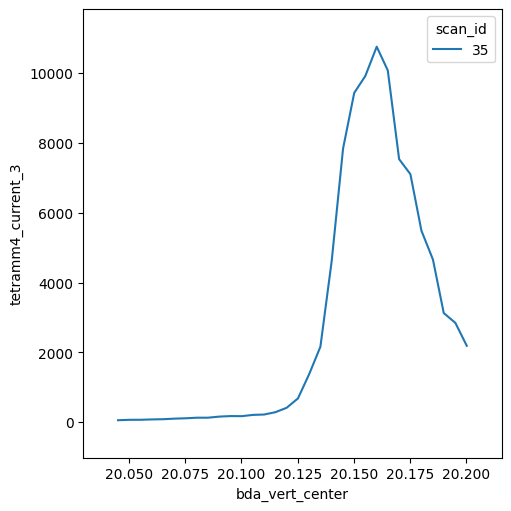

In [8]:
RE(bps.mv(bda_vert.size, 1.0425+0.01))

RE(bp.rel_scan(detectors, bda_vert.center, 0.2, -0.2, num=81))

In [9]:
RE.stop()

Stopping: running cleanup and marking exit_status as 'success'...


('0e915ff6-0f99-43f8-93c5-53ac7bc8c436',)

In [10]:
bec.peaks

{
'com':
    {'tetramm4_current_3': 20.161298459317177}
,
'cen':
    {'tetramm4_current_3': 20.16098720254101}
,
'max':
    {'tetramm4_current_3': (20.16019,
                            10753.262606338994)}
,
'min':
    {'tetramm4_current_3': (20.045080000000002,
                            57.41337370151793)}
,
'fwhm':
    {'tetramm4_current_3': 0.039184684306700746}
,
}

('92904fa1-b62c-46b2-9b9b-a2c5cae2281e',)

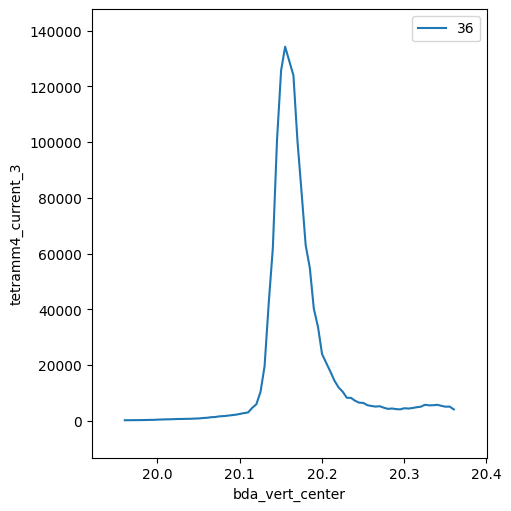

In [11]:
RE(bp.rel_scan(detectors, bda_vert.center, 0.2, -0.2, num=81))

In [14]:
from cycler import cycler
import numpy as np

bda_vert_center_positions = np.arange(20.5, 19.49, -0.01)
bender_1_positions = np.arange(vb1_pos-9*5e4, vb1_pos+10*5e4, 5e4)
bender_2_positions = np.arange(vb2_pos-9*5e4, vb2_pos+10*5e4, 5e4)

cy_vert = cycler(hhl_mirrors.bender_2, bender_2_positions) * \
          cycler(hhl_mirrors.bender_1, bender_1_positions) * \
          cycler(bda_vert.center, bda_vert_center_positions) 

RE(bps.mv(bda_vert.size, 1.0425+0.015,
          bda_hor.size, 0.747+4))

RE(bps.sleep(5))

RE(bp.scan_nd(detectors, cy_vert))

/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/bluesky/callbacks/best_effort.py:174: UserWarning: Plots are only made for 1 or 2 dimensions. Adjust the metadata hints field for BestEffortCallback to produce plots.
  warn(  # noqa: B028
CA.Client.Exception...............................................
    Context: "isn-eigerptycho.xray.aps.anl.gov:5064"
    Source File: ../cac.cpp line 1238
    Current Time: Fri Jul 18 2025 09:45:10.794064193
..................................................................


('36ebd82b-b0fd-43ce-8896-2cafc09105ea',)

CA.Client.Exception...............................................
    Context: "isn-eigerptycho.xray.aps.anl.gov:5064"
    Source File: ../cac.cpp line 1238
    Current Time: Fri Jul 18 2025 11:28:31.247172920
..................................................................


In [21]:
RE(bps.mv(hhl_mirrors.bender_1, vb1_pos+9*5e4,
      hhl_mirrors.bender_2, vb2_pos-8*5e4))

()

In [22]:
hb1_pos = -30270953
hb2_pos = -29521006

('46611076-2abe-4576-9e2d-520499cae098',)

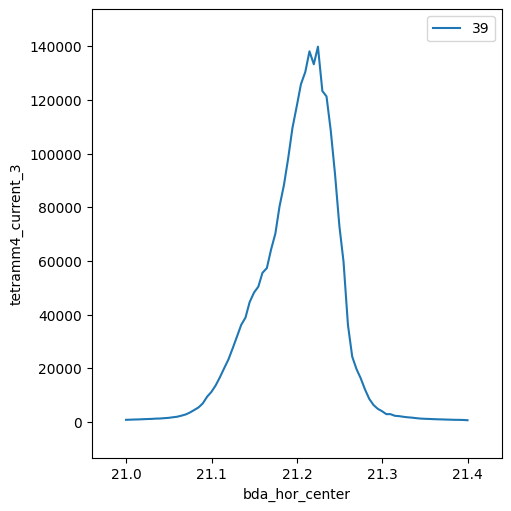

In [24]:
RE(bps.mv(bda_hor.size, 0.747+0.01))

RE(bp.rel_scan(detectors, bda_hor.center, 0.2, -0.2, num=81))

In [25]:
bda_hor_center_positions = np.arange(21.6, 20.8, -0.01)
bender_1_positions = np.arange(hb1_pos-9*5e4, hb1_pos+10*5e4, 5e4)
bender_2_positions = np.arange(hb2_pos-9*5e4, hb2_pos+10*5e4, 5e4)

cy_vert = cycler(lateral_mirror.bender_2, bender_2_positions) * \
          cycler(lateral_mirror.bender_1, bender_1_positions) * \
          cycler(bda_hor.center, bda_hor_center_positions) 

RE(bps.mv(bda_vert.size, 1.0425+4,
          bda_hor.size, 0.747+0.015))

RE(bps.sleep(5))

RE(bp.scan_nd(detectors, cy_vert))

/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/bluesky/callbacks/best_effort.py:174: UserWarning: Plots are only made for 1 or 2 dimensions. Adjust the metadata hints field for BestEffortCallback to produce plots.
  warn(  # noqa: B028


('d4b7c0cb-2597-45a0-84be-bb502e3096fa',)

Now we start scanning more carefully.

('1ec02abb-b859-411b-bc4c-dcf298a82f04',)

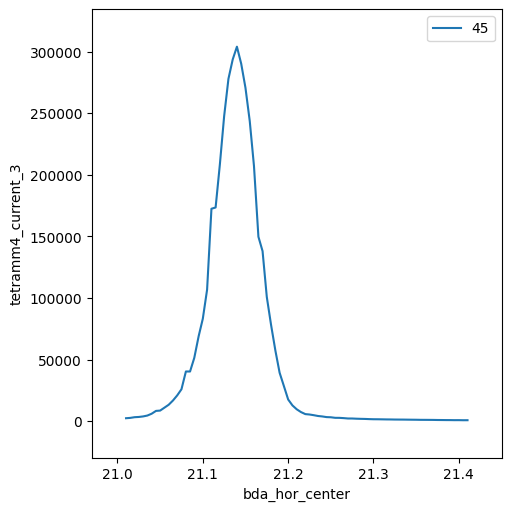

In [4]:
RE(bp.rel_scan(detectors, bda_hor.center, 0.2, -0.2, num=81))

In [5]:
bec.peaks

{
'com':
    {'tetramm4_current_3': 21.139248882296563}
,
'cen':
    {'tetramm4_current_3': 21.13684357826697}
,
'max':
    {'tetramm4_current_3': (21.14008,
                            304044.2002441275)}
,
'min':
    {'tetramm4_current_3': (21.405230000000003,
                            776.7733122856249)}
,
'fwhm':
    {'tetramm4_current_3': 0.05636676823134579}
,
}

('7a73c19c-eb04-407d-a47e-7f580c93ccd3',)

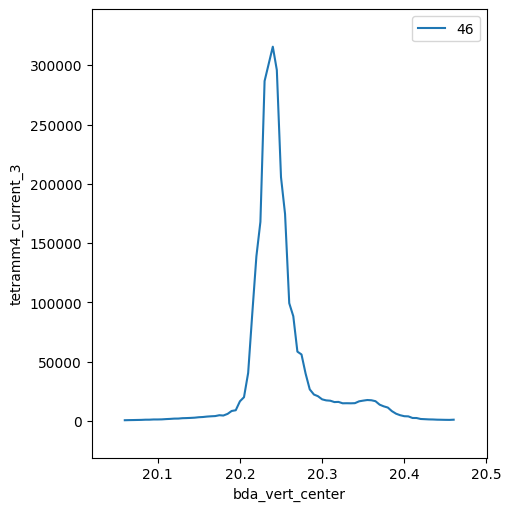

In [6]:
RE(bp.rel_scan(detectors, bda_vert.center, 0.2, -0.2, num=81))

In [7]:
bec.peaks

{
'com':
    {'tetramm4_current_3': 20.25116176505741}
,
'cen':
    {'tetramm4_current_3': 20.23978596492512}
,
'max':
    {'tetramm4_current_3': (20.240150000000003,
                            315640.8512325343)}
,
'min':
    {'tetramm4_current_3': (20.06003,
                            756.7178122464455)}
,
'fwhm':
    {'tetramm4_current_3': 0.03274762326814695}
,
}

('02fd6964-2716-4e11-b817-8dc7eeef790b',)

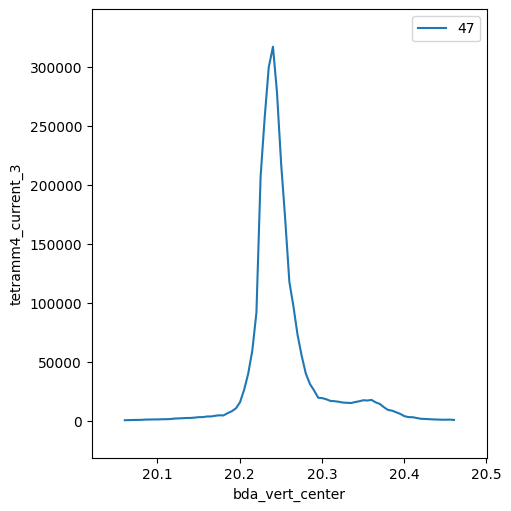

In [8]:
RE(bp.rel_scan(detectors, bda_vert.center, 0.2, -0.2, num=81))

In [9]:
bec.peaks

{
'com':
    {'tetramm4_current_3': 20.252589268971615}
,
'cen':
    {'tetramm4_current_3': 20.239953878059953}
,
'max':
    {'tetramm4_current_3': (20.24052,
                            317368.568268479)}
,
'min':
    {'tetramm4_current_3': (20.060370000000002,
                            718.1668742008928)}
,
'fwhm':
    {'tetramm4_current_3': 0.033184875520014145}
,
}

('9b558708-5189-4eb5-9978-1bdceae5f0c8',)

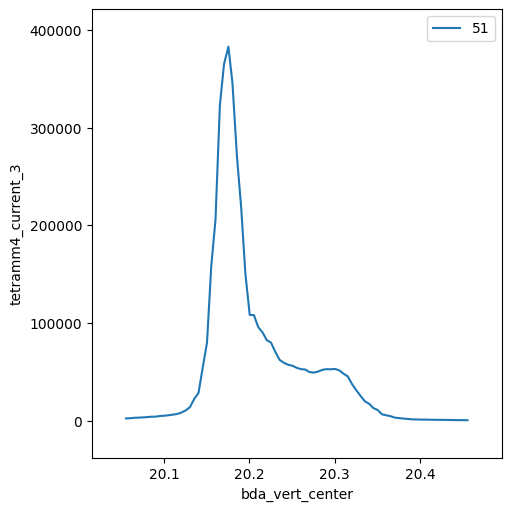

In [15]:
RE(bp.rel_scan(detectors, bda_vert.center, 0.2, -0.2, num=81))

In [16]:
bec.peaks

{
'com':
    {'tetramm4_current_3': 20.205362686143268}
,
'cen':
    {'tetramm4_current_3': 20.175503725615886}
,
'max':
    {'tetramm4_current_3': (20.175340000000002,
                            382731.7466102221)}
,
'min':
    {'tetramm4_current_3': (20.45558,
                            511.6982371515938)}
,
'fwhm':
    {'tetramm4_current_3': 0.03349509370044501}
,
}

('079f3ae7-98b4-4da9-b814-54fe39382c51',)

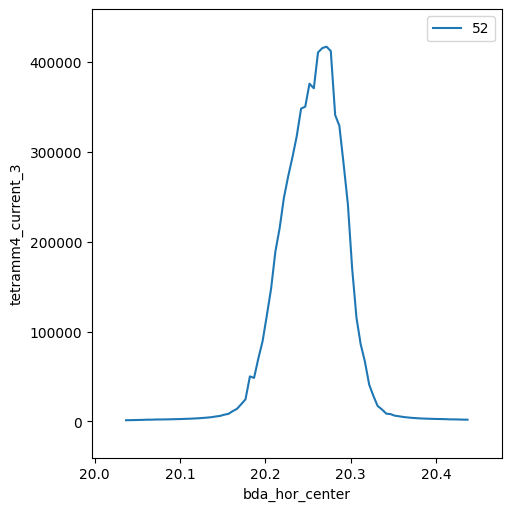

In [17]:
RE(bp.rel_scan(detectors, bda_hor.center, 0.2, -0.2, num=81))

In [18]:
bec.peaks

{
'com':
    {'tetramm4_current_3': 20.25555952638654}
,
'cen':
    {'tetramm4_current_3': 20.257417286334523}
,
'max':
    {'tetramm4_current_3': (20.27183,
                            416948.62942698994)}
,
'min':
    {'tetramm4_current_3': (20.03677,
                            1302.311247415496)}
,
'fwhm':
    {'tetramm4_current_3': 0.08340572370256183}
,
}

('4d334876-b848-424c-9db6-3818baa896de',)

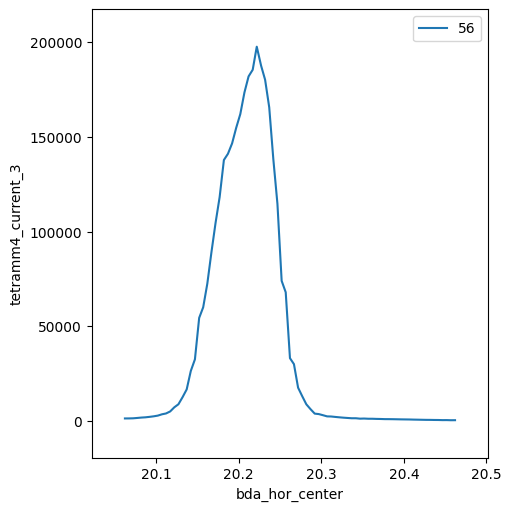

In [25]:
RE(bp.rel_scan(detectors, bda_hor.center, 0.2, -0.2, num=81))

In [26]:
bec.peaks

{
'com':
    {'tetramm4_current_3': 20.20900604954522}
,
'cen':
    {'tetramm4_current_3': 20.20941138868735}
,
'max':
    {'tetramm4_current_3': (20.221770000000003,
                            197698.08910808284)}
,
'min':
    {'tetramm4_current_3': (20.45698,
                            373.1554057490474)}
,
'fwhm':
    {'tetramm4_current_3': 0.0787482053793731}
,
}

CA.Client.Exception...............................................
    Context: "isn-eigerptycho.xray.aps.anl.gov:5064"
    Source File: ../cac.cpp line 1238
    Current Time: Tue Jul 22 2025 11:53:51.881537853
..................................................................
CA.Client.Exception...............................................
    Context: "isn-eigerptycho.xray.aps.anl.gov:5064"
    Source File: ../cac.cpp line 1238
    Current Time: Tue Jul 22 2025 13:45:32.589486762
..................................................................
CA.Client.Exception...............................................
    Context: "isn-eigerptycho.xray.aps.anl.gov:5064"
    Source File: ../cac.cpp line 1238
    Current Time: Wed Jul 23 2025 10:49:35.195015554
..................................................................


('0b051962-6fc1-425b-9abe-46ef09b44d71',)

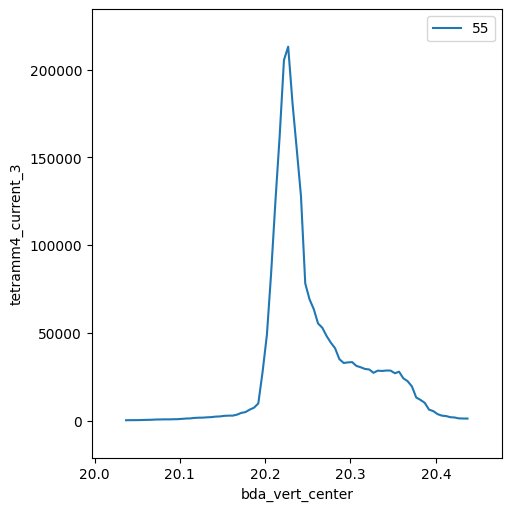

In [23]:
RE(bp.rel_scan(detectors, bda_vert.center, 0.2, -0.2, num=81))

In [24]:
bec.peaks

{
'com':
    {'tetramm4_current_3': 20.255264614402474}
,
'cen':
    {'tetramm4_current_3': 20.22693636512735}
,
'max':
    {'tetramm4_current_3': (20.226960000000002,
                            213031.8109258128)}
,
'min':
    {'tetramm4_current_3': (20.03696,
                            335.6352569447428)}
,
'fwhm':
    {'tetramm4_current_3': 0.03433652179833402}
,
}

## 07/23/2025

In [2]:
detectors = [tetramm4.current_3, ring.current]
sd.baseline = [hhl_mirrors.bender_1, hhl_mirrors.bender_2, bda_vert.size, bda_vert.center,
               lateral_mirror.bender_1, lateral_mirror.bender_2, bda_hor.size, bda_hor.center]

tetramm4.current_3.kind = 'hinted'

('e28f4c7f-e2ae-4f88-a972-ac4e19cf7119',)

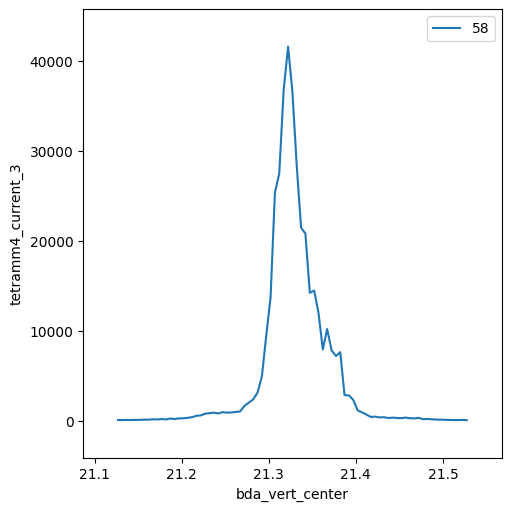

In [3]:
RE(bps.mv(bda_vert.size, 1.0425+0.01))

RE(bp.rel_scan(detectors, bda_vert.center, 0.2, -0.2, num=81))

In [5]:
bec.peaks

{
'com':
    {'tetramm4_current_3': 21.329670716640145}
,
'cen':
    {'tetramm4_current_3': 21.32356181471786}
,
'max':
    {'tetramm4_current_3': (21.322180000000003,
                            41608.050116264654)}
,
'min':
    {'tetramm4_current_3': (21.527310000000003,
                            61.289460592032455)}
,
'fwhm':
    {'tetramm4_current_3': 0.03684877469076042}
,
}

('2b245c8a-ac97-4726-b1d2-bf01f6f8308a',)

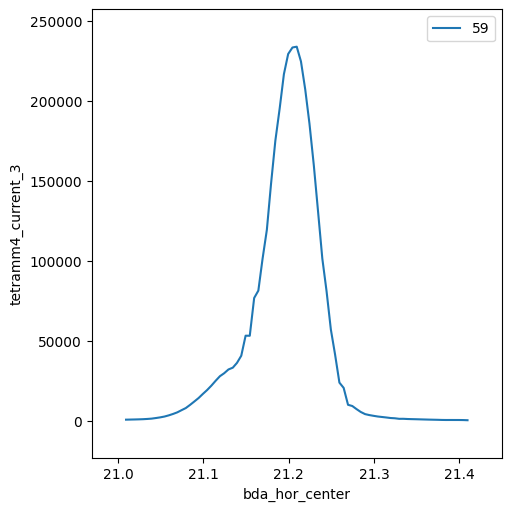

In [6]:
RE(bps.mv(bda_hor.size, 0.747+0.01))

RE(bp.rel_scan(detectors, bda_hor.center, 0.2, -0.2, num=81))

In [ ]:
bec.peaks

{
'com':
    {'tetramm4_current_3': 21.19691565002545}
,
'cen':
    {'tetramm4_current_3': 21.20519189662999}
,
'max':
    {'tetramm4_current_3': (21.20935,
                            233834.45017901112)}
,
'min':
    {'tetramm4_current_3': (21.409540000000003,
                            528.0729633726303)}
,
'fwhm':
    {'tetramm4_current_3': 0.0629752721268062}
,
}

E Wed-17:09:47.948: Motion failed: sample_y is in an alarm state status=7 severity=2
E Wed-17:09:54.301: Motion failed: sample_y is in an alarm state status=7 severity=2
CA.Client.Exception...............................................
    Context: "isnpc05.xray.aps.anl.gov:35201"
    Source File: ../cac.cpp line 1238
    Current Time: Mon Jul 28 2025 10:57:36.836600776
..................................................................
